<h1 style="text-align: center;">Evolution of the NBA : Comparing the 1990s to the Modern Era</h1>

<p style="text-align: justify;">
Basketball has undergone remarkable changes over the past three decades. The National Basketball Association (NBA), as the world’s premier basketball league, reflects the evolution of not only athletic skill but also strategy, culture, and economics. From the rugged, defense-heavy 1990s to the pace-and-space, three-point dominated 2020s, the game has shifted in both style and substance.
</p>

<p style="text-align: justify;">
This report aims to <b>compare the NBA of the 1990s with that since 2000</b>, highlighting differences in playing style, rules, player archetypes, and cultural impact. Using data-driven insights, historical context, and visual examples, we explore how the league adapted to new incentives and how these shifts transformed the fan experience.
</p>


<h2 style="text-align: left;">Understanding Basketball: From Basics to the Evolution of Eras</h2>

<p style="text-align: justify;">
Basketball is one of the world’s most dynamic and widely celebrated sports, played by millions across every continent. Invented in 1891 by Dr. James Naismith, the game has grown from a simple gymnasium activity into a global phenomenon, with the National Basketball Association (NBA) at its pinnacle. At its heart, basketball is a team sport where two sides, each with five players on the court, compete to score points by shooting a ball through the opponent’s hoop — a circular rim mounted 10 feet above the floor.
</p>

<p style="text-align: justify;">
The <b>objective of the game</b> is straightforward: outscore the opponent within the regulation time. A shot taken from within the three-point arc counts for two points, while a made basket from beyond that arc is worth three. Free throws, awarded after certain fouls, are worth one point each. While these rules seem simple, the strategies that emerge around shot selection, defense, and game tempo make basketball uniquely complex and ever-evolving.
</p>

<p style="text-align: justify;"> Offensively, players create opportunities through dribbling, passing, screens, and off-ball movement to generate open shots. Defensively, teams aim to limit high-value scoring chances through man-to-man assignments, zone schemes, or hybrid approaches. Beyond the X’s and O’s, basketball demands adaptability, as roles often shift between scoring, playmaking, rebounding, and defending.
</p>

<p style="text-align: justify;">
Over the decades, the NBA has served as the ultimate stage for basketball’s development. Each era reflects the influences of its time — whether through rule changes, player archetypes, or broader cultural forces. The <b>1990s</b>, for instance, emphasized rugged defense, isolation scoring, and dominance in the paint, while the <b>2020s</b> highlight three-point shooting, pace, and versatile, “positionless” basketball. Comparing these two eras not only shows how the game has changed, but also illustrates how sports evolve alongside society, technology, and global culture.
</p>

<p style="text-align: justify;">
This foundation sets the stage for a deeper comparative analysis between the 1990s and the 2020s NBA — exploring how the same game, bound by the same rules of scoring, has transformed into two very different styles of play.
</p>


# Basketball Basics

## Objective
Score more points than the opposing team by throwing the ball through the basket (10 ft / 3.05 m high).

---

## Teams
- 5 players per team on the court  
- Common positions: 2 guards, 2 forwards, 1 center  
- Substitutions allowed during stoppages  

---

## Game Structure
- **NBA**: 4 quarters × 12 minutes  
- **FIBA (international)**: 4 quarters × 10 minutes  
- Overtime if tied  

---

## Scoring
- **2 points** → regular field goal (inside the arc)  
- **3 points** → shot from beyond the 3-point line  
- **1 point** → free throw  

---

## Basic Flow
1. Offense tries to create and make a shot  
2. Defense tries to block, steal, or rebound  
3. After a score, possession switches to the other team

## Court Dimensions and Coordinate System
- **X-axis (width)**: 0 to 15 meters  
- **Y-axis (length)**: 0 to 28 meters

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind
import mplfinance as mpf
from scipy.stats import linregress
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

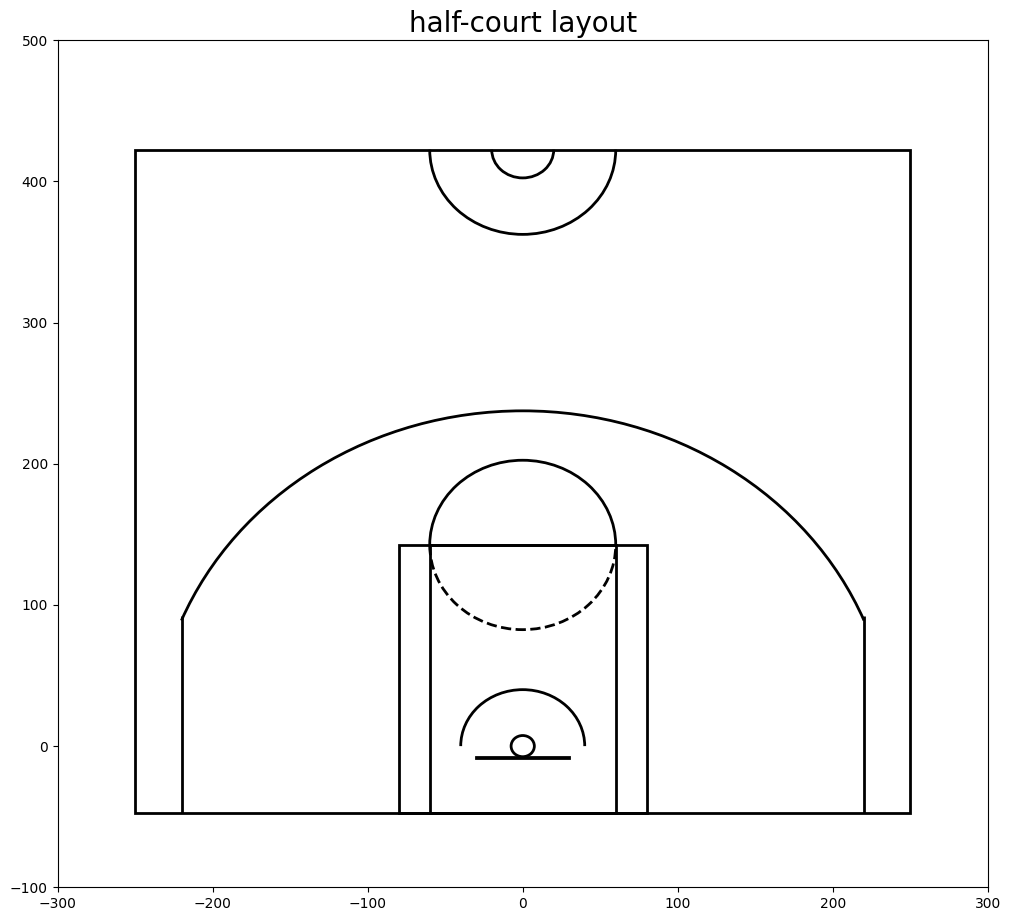

In [2]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()


    # Create the basketball hoop
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.title("half-court layout", fontsize=20)
plt.show()

## Structure of the Report  
For the purpose of this report, we will cover the following points:

#  Offense

## 1. Stats by era
Baseline comparison of overall team stats across decades. 

## 2. Pace & Scoring 
- Average pace (possessions per 48 min).  
- Average points per game (PPG) per team.  
- Offensive rating (points per 100 possessions).  
- Defensive rating (for comparison).  
---

## 3. Shot Distribution 
- % of 3-point attempts vs. 2-point attempts.  
- 3-point accuracy.  
- Midrange frequency (long 2s).  
- Free throws (FTA per game).  
---

## 4. Playstyle & Possession Usage 
- Isolation frequency (1990s: more post-ups vs. 2020s: pick-and-roll & 3s).  
- Assists per game (ball movement).  
- Turnovers per game.  
- Assist-to-turnover ratio.  

---

## 5. Player Size & Roles 
- Average height/weight by position.  
- Big men usage (post scoring vs. floor spacing "stretch 5s").  
- Scoring responsibility.  
---

# Defense & Physicality

## 6. Defense & Physicality 
- Fouls per game.  
- Blocks & steals.  
- Rule changes:  
  - Hand-check ban (2004).  
  - Defensive 3-second rule (2001).  
  - Freedom of movement emphasis.  

---

# Analytics Impact

## 7. Analytics & Strategy Shift  
- 1990s: focus on post play, rebounding, physical defense.  
- 2020s: efficiency, spacing, shot selection ("Moreyball" – 3s & layups).  

---

# Summary & Insights  
- The NBA has shifted from **iso-heavy, physical basketball** to **fast-paced, 3-point heavy, efficiency-driven basketball**.  
- Defensive rule changes and analytics have accelerated this transformation.  
- Modern players are more versatile, with guards as primary scorers and bigs as floor spacers/playmakers.  
- The contrast between eras reflects both rule changes and evolving basketball philosophy.  

## 0. Data overview

In [3]:
team_statistics_filtered = pd.read_csv('data/TeamStatistics.csv')

In [4]:
players_statistics = pd.read_csv('data/PlayerStatistics.csv', dtype=str)

In [5]:
games_data = pd.read_csv('data/Games.csv', dtype=str)

In [6]:
players_data = pd.read_csv('data/Players.csv', dtype=str)

#### Get familiar with the columns

In [7]:
team_statistics_filtered.columns

Index(['gameId', 'gameDate', 'teamCity', 'teamName', 'teamId',
       'opponentTeamCity', 'opponentTeamName', 'opponentTeamId', 'home', 'win',
       'teamScore', 'opponentScore', 'assists', 'blocks', 'steals',
       'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage',
       'threePointersAttempted', 'threePointersMade',
       'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade',
       'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive',
       'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints',
       'numMinutes', 'q1Points', 'q2Points', 'q3Points', 'q4Points',
       'benchPoints', 'biggestLead', 'biggestScoringRun', 'leadChanges',
       'pointsFastBreak', 'pointsFromTurnovers', 'pointsInThePaint',
       'pointsSecondChance', 'timesTied', 'timeoutsRemaining', 'seasonWins',
       'seasonLosses', 'coachId'],
      dtype='object')

In [8]:
players_statistics.columns

Index(['firstName', 'lastName', 'personId', 'gameId', 'gameDate',
       'playerteamCity', 'playerteamName', 'opponentteamCity',
       'opponentteamName', 'gameType', 'gameLabel', 'gameSubLabel',
       'seriesGameNumber', 'win', 'home', 'numMinutes', 'points', 'assists',
       'blocks', 'steals', 'fieldGoalsAttempted', 'fieldGoalsMade',
       'fieldGoalsPercentage', 'threePointersAttempted', 'threePointersMade',
       'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade',
       'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive',
       'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints'],
      dtype='object')

In [9]:
games_data.columns

Index(['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId',
       'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore',
       'winner', 'gameType', 'attendance', 'arenaId', 'gameLabel',
       'gameSubLabel', 'seriesGameNumber'],
      dtype='object')

In [10]:
players_data.columns

Index(['personId', 'firstName', 'lastName', 'birthdate', 'lastAttended',
       'country', 'height', 'bodyWeight', 'guard', 'forward', 'center',
       'draftYear', 'draftRound', 'draftNumber'],
      dtype='object')

# 1. Stats by era

The raw dataset did not contain a direct "era" or "decade" column, so we created one.  
We first converted each game's `gameDate` into a year, restricted the range to 1990–2025,  
and then assigned labels (1990s, 2000s, 2010s, 2020s).  
This grouping allows us to analyze trends across distinct eras of basketball.  


In [11]:
# Keep the original dataset
team_statistics_filtered_full = team_statistics_filtered.copy()

# Extract the year
team_statistics_filtered_full['gameDate'] = pd.to_datetime(team_statistics_filtered_full['gameDate'], errors='coerce')
team_statistics_filtered_full['year'] = team_statistics_filtered_full['gameDate'].dt.year

# Create a filtered version only for 1990–2025
team_statistics_filtered = team_statistics_filtered_full[
    (team_statistics_filtered_full['year'] >= 1990) & (team_statistics_filtered_full['year'] <= 2025)
].copy()

# Assign era labels to the filtered data
def assign_era(year):
    if 1990 <= year <= 1999:
        return "1990s"
    elif 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    elif 2020 <= year <= 2025:
        return "2020s"

team_statistics_filtered.loc[:, 'era'] = team_statistics_filtered['year'].apply(assign_era)

# Reset index
team_statistics_filtered = team_statistics_filtered.reset_index(drop=True)


In [12]:
team_statistics_filtered.era.unique()

array(['2020s', '2010s', '2000s', '1990s'], dtype=object)

#### Instead of representing statistics solely by decade, we will combine the years after 2000 into a single category and compare them to the 1990s.

In [13]:
team_statistics_filtered['era_group'] = team_statistics_filtered['year'].apply(
    lambda y: '1990s' if 1990 <= y <= 1999 else '2000s+'
)

### Now, let's compare them by total points, rebounds, steals, blocks, and assists, which are the most common basketball statistics!!

As we can see, we don’t have the total number of rebounds—only offensive and defensive— so let’s create a new column to calculate the total.

In [14]:
team_statistics_filtered['total_rebounds'] = team_statistics_filtered['reboundsDefensive'] + team_statistics_filtered['reboundsOffensive']

In [15]:
era_comparison_by_stats = team_statistics_filtered.groupby('era').agg({
    'teamScore': 'mean',
    'total_rebounds': 'mean',
    'assists': 'mean',
    'blocks': 'mean',
    'steals': 'mean'
}).reset_index()


In [16]:
era_comparison_by_stats

,era,teamScore,total_rebounds,assists,blocks,steals
0,1990s,100.762182,42.243460,23.301633,5.147974,8.355916
1,2000s,96.838412,41.825020,21.253929,4.918173,7.581716
2,2010s,102.329451,43.100225,22.248385,4.899775,7.689201
3,2020s,112.581305,44.026302,25.326584,4.851271,7.658953


In [17]:
base_table = era_comparison_by_stats.copy()

# Use the first era as the reference
reference = base_table.iloc[0]

# Difference table: subtract the first era
diff_table = base_table.copy()
for col in ['teamScore', 'total_rebounds', 'assists', 'blocks', 'steals']:
    diff_table[col] = base_table[col] - reference[col]

# Percentage difference table: (current - reference) / reference * 100
pct_diff_table = base_table.copy()
for col in ['teamScore', 'total_rebounds', 'assists', 'blocks', 'steals']:
    pct_diff = (base_table[col] - reference[col]) / reference[col] * 100
    pct_diff_table[col] = pct_diff.round(1).astype(str) + '%'  # add % sign


diff_table.reset_index(drop=True, inplace=True)
pct_diff_table.reset_index(drop=True, inplace=True)



In [18]:
diff_table

,era,teamScore,total_rebounds,assists,blocks,steals
0,1990s,0.000000,0.000000,0.000000,0.000000,0.000000
1,2000s,-3.923769,-0.418440,-2.047704,-0.229801,-0.774199
2,2010s,1.567269,0.856765,-1.053248,-0.248199,-0.666715
3,2020s,11.819123,1.782841,2.024951,-0.296703,-0.696962


In [19]:
pct_diff_table

,era,teamScore,total_rebounds,assists,blocks,steals
0,1990s,0.0%,0.0%,0.0%,0.0%,0.0%
1,2000s,-3.9%,-1.0%,-8.8%,-4.5%,-9.3%
2,2010s,1.6%,2.0%,-4.5%,-4.8%,-8.0%
3,2020s,11.7%,4.2%,8.7%,-5.8%,-8.3%


As we can see, the game has evolved to become more offense-oriented, with teams prioritizing scoring over defensive focus (blocks and steals)

### Where we take the 90s as base

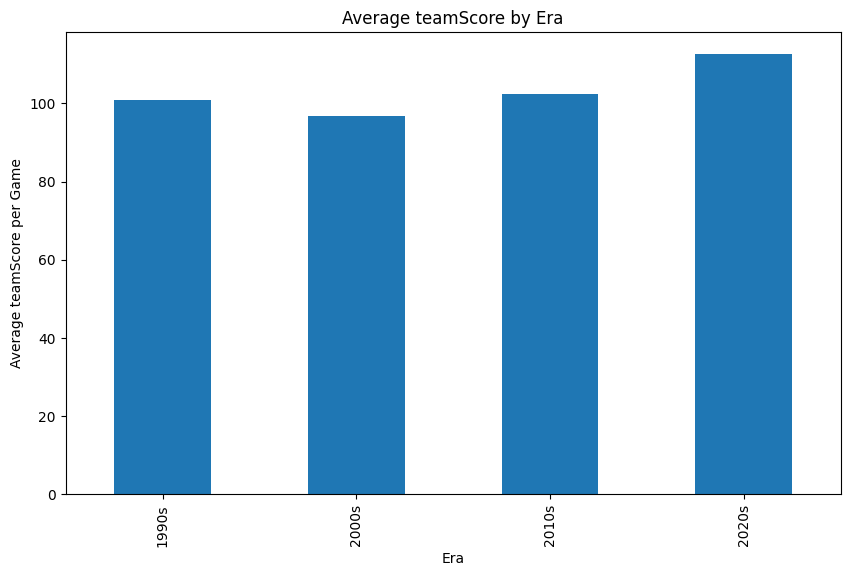

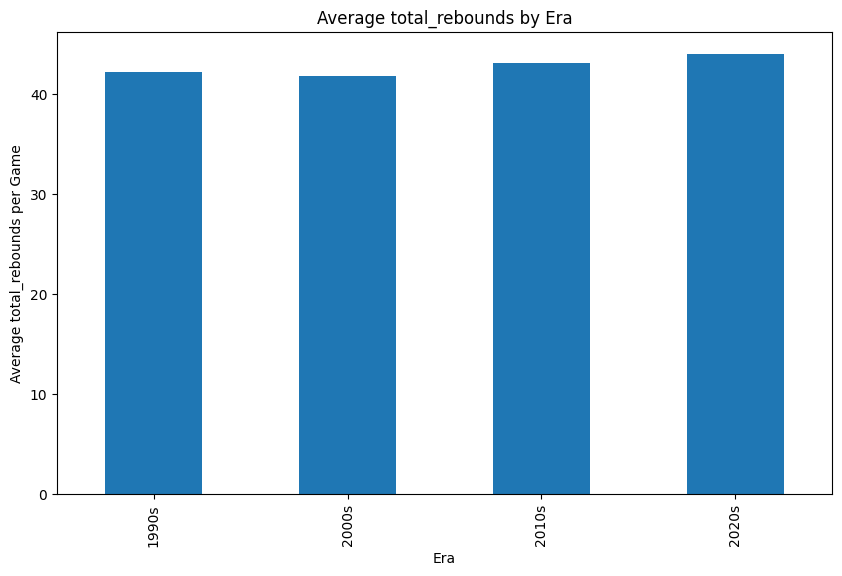

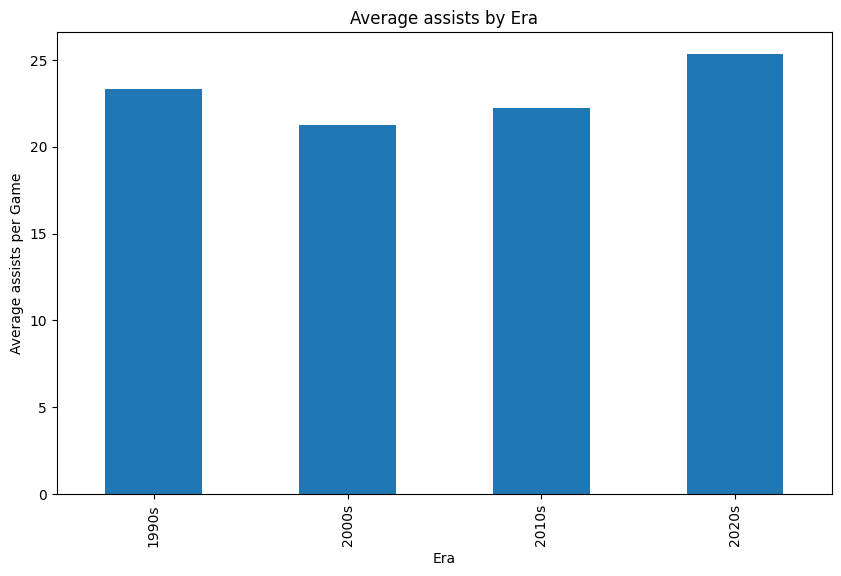

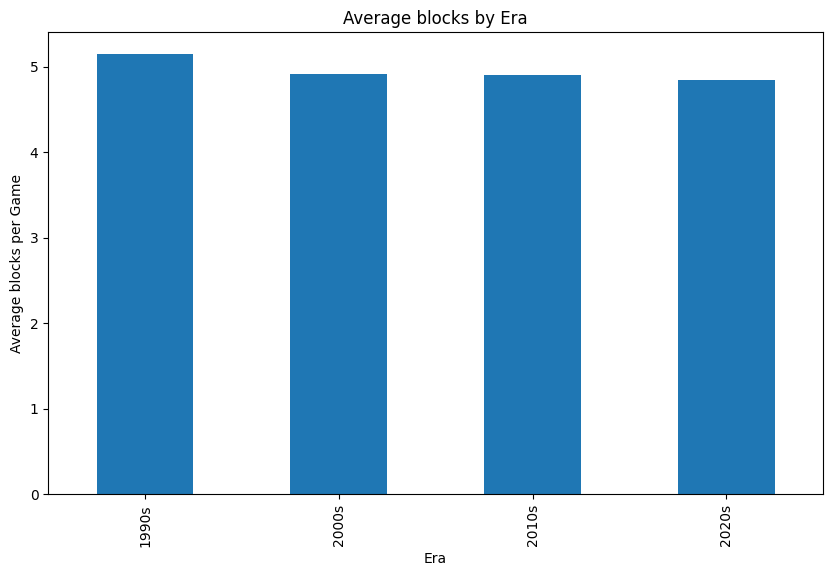

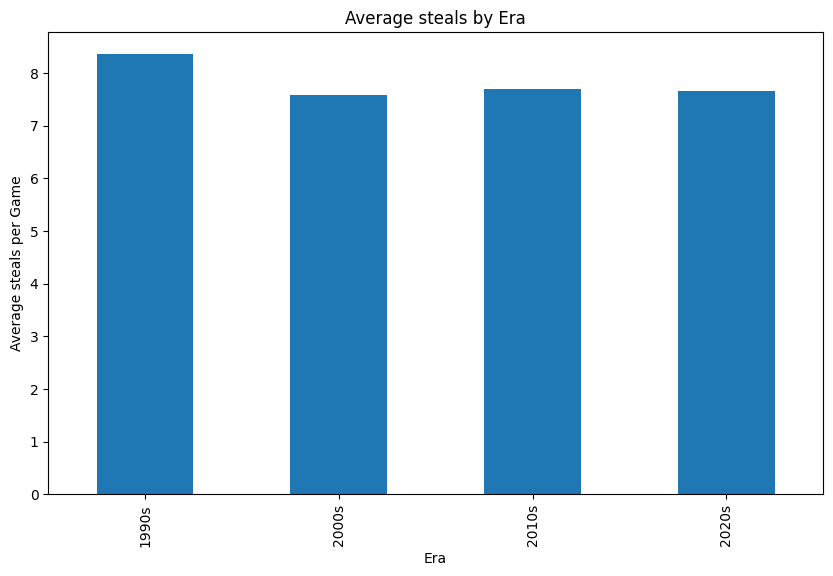

In [20]:
stats = ['teamScore', 'total_rebounds', 'assists', 'blocks', 'steals']

for stat in stats:
    era_comparison_by_stats.set_index('era')[stat].plot(kind='bar', figsize=(10,6))
    plt.title(f'Average {stat} by Era')
    plt.ylabel(f'Average {stat} per Game')
    plt.xlabel('Era')
    plt.show()

Now let's combine then years after 2000 as one

In [21]:
# Aggregate averages for the new DataFrame
era_group_summary_combined = team_statistics_filtered.groupby('era_group').agg({
     'teamScore': 'mean',
    'total_rebounds': 'mean',
    'threePointersAttempted': 'mean',
    'assists': 'mean',
    'blocks': 'mean',
    'steals': 'mean'
}).reset_index()

era_group_summary_combined

,era_group,teamScore,total_rebounds,threePointersAttempted,assists,blocks,steals
0,1990s,100.762182,42.243460,11.773209,23.301633,5.147974,8.355916
1,2000s+,102.381295,42.801093,23.198087,22.518841,4.896577,7.640831


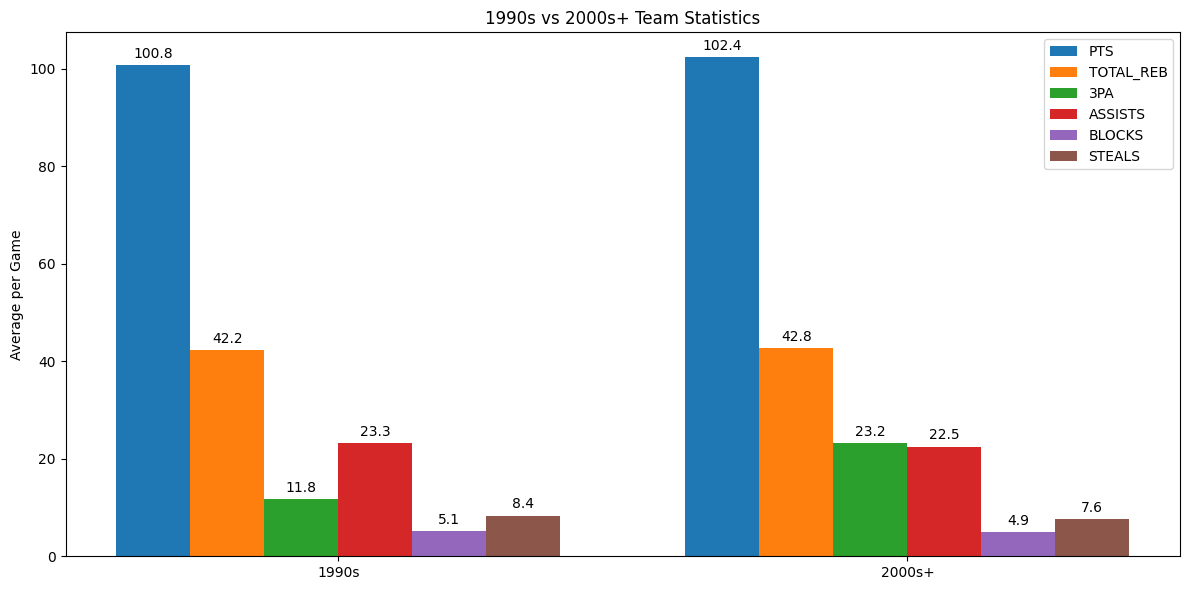

In [22]:
labels = era_group_summary_combined['era_group']
points = era_group_summary_combined['teamScore']
rebounds = era_group_summary_combined['total_rebounds']
three_pointers = era_group_summary_combined['threePointersAttempted']
assists = era_group_summary_combined['assists']
blocks = era_group_summary_combined['blocks']
steals = era_group_summary_combined['steals']

x = np.arange(len(labels))  
width = 0.13 

fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - 2.5*width, points, width, label='PTS')
rects2 = ax.bar(x - 1.5*width, rebounds, width, label='TOTAL_REB')
rects3 = ax.bar(x - 0.5*width, three_pointers, width, label='3PA')
rects4 = ax.bar(x + 0.5*width, assists, width, label='ASSISTS')
rects5 = ax.bar(x + 1.5*width, blocks, width, label='BLOCKS')
rects6 = ax.bar(x + 2.5*width, steals, width, label='STEALS')

ax.set_ylabel('Average per Game')
ax.set_title('1990s vs 2000s+ Team Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for rects in [rects1, rects2, rects3, rects4, rects5, rects6]:
    autolabel(rects)

plt.tight_layout()
plt.show()

#### One by one clear visualization

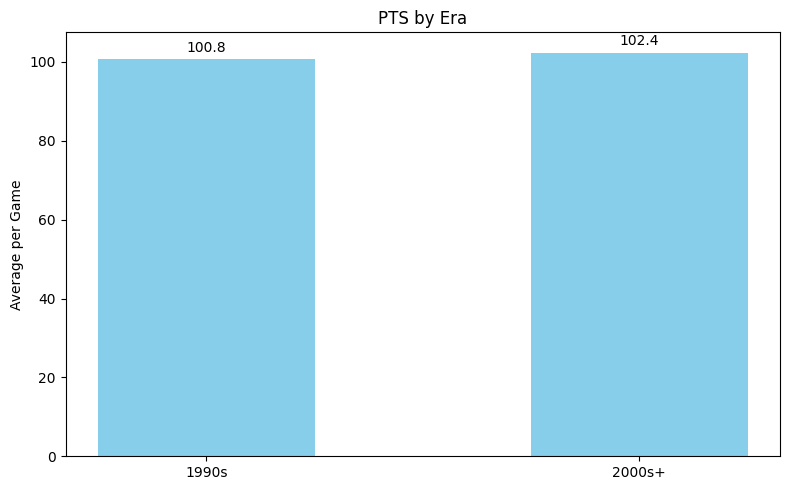

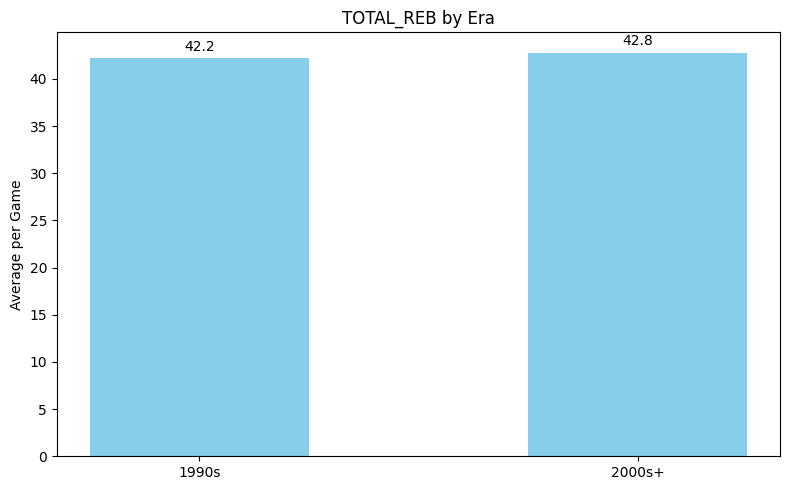

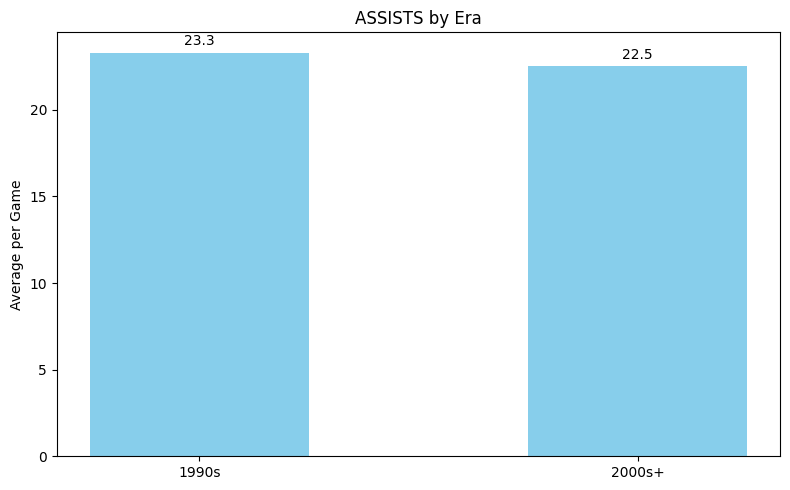

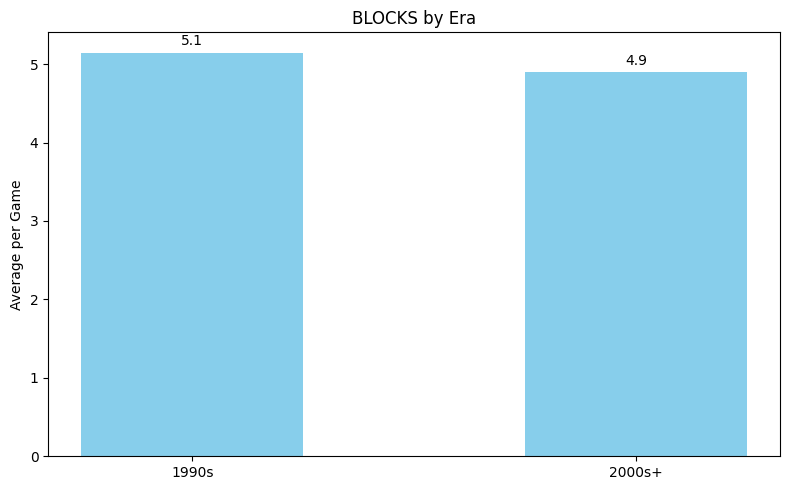

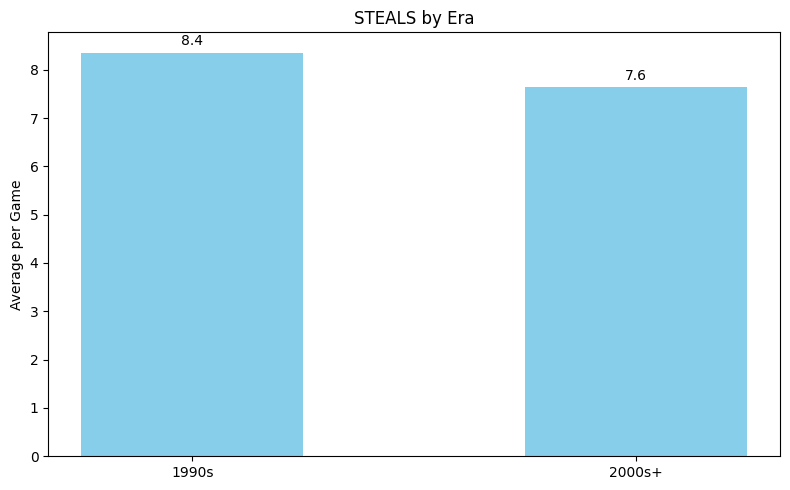

In [23]:
labels = era_group_summary_combined['era_group']
stats = {
    'PTS': era_group_summary_combined['teamScore'],
    'TOTAL_REB': era_group_summary_combined['total_rebounds'],
    'ASSISTS': era_group_summary_combined['assists'],
    'BLOCKS': era_group_summary_combined['blocks'],
    'STEALS': era_group_summary_combined['steals']
}

x = np.arange(len(labels))  
width = 0.5 

for stat_name, values in stats.items():
    fig, ax = plt.subplots(figsize=(8,5))
    rects = ax.bar(x, values, width, color='skyblue')

    ax.set_ylabel('Average per Game')
    ax.set_title(f'{stat_name} by Era')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

## Best Teams by Decade

We analyze team performance across decades from 1990 onward, focusing on three metrics:

1. **Most Regular Season Wins:** Teams with the highest total wins during the regular season in a given decade.  
2. **Most Playoff Wins:** Teams with the highest cumulative playoff victories in the decade.  
3. **Most Combined Wins:** Sum of regular season and playoff wins, giving an overall measure of dominance.

> **Note:** Only games available in the dataset are considered. Some playoff data may be incomplete, so totals reflect the games recorded.


In [24]:
games = games_data.copy()
games['gameDate'] = pd.to_datetime(games['gameDate'])
games['year'] = games['gameDate'].dt.year

# Assign era
def assign_era(year):
    if 1990 <= year <= 1999:
        return '1990s'
    elif 2000 <= year <= 2009:
        return '2000s'
    elif 2010 <= year <= 2019:
        return '2010s'
    elif 2020 <= year <= 2025:
        return '2020s'
games['era'] = games['year'].apply(assign_era)

# Determine wins using scores
games['homeWin'] = (games['homeScore'] > games['awayScore']).astype(int)
games['awayWin'] = (games['awayScore'] > games['homeScore']).astype(int)

# Regular season vs playoff
games['is_playoff'] = games['gameType'].str.lower().str.contains('playoff')

reg_home = games[~games['is_playoff']].groupby(['era','hometeamName']).agg(
    reg_wins_home=('homeWin','sum'),
    reg_games_home=('gameId','count')
).reset_index()

reg_away = games[~games['is_playoff']].groupby(['era','awayteamName']).agg(
    reg_wins_away=('awayWin','sum'),
    reg_games_away=('gameId','count')
).reset_index()

# Combine
reg_wins = pd.merge(reg_home, reg_away, left_on=['era','hometeamName'], right_on=['era','awayteamName'], how='outer')
reg_wins['teamName'] = reg_wins['hometeamName'].combine_first(reg_wins['awayteamName'])
reg_wins['regular_wins'] = reg_wins['reg_wins_home'].fillna(0) + reg_wins['reg_wins_away'].fillna(0)
reg_wins['total_games'] = reg_wins['reg_games_home'].fillna(0) + reg_wins['reg_games_away'].fillna(0)
reg_wins = reg_wins[['era','teamName','regular_wins','total_games']]

po_home = games[games['is_playoff']].groupby(['era','hometeamName']).agg(
    po_wins_home=('homeWin','sum')
).reset_index()
po_away = games[games['is_playoff']].groupby(['era','awayteamName']).agg(
    po_wins_away=('awayWin','sum')
).reset_index()

po_wins = pd.merge(po_home, po_away, left_on=['era','hometeamName'], right_on=['era','awayteamName'], how='outer')
po_wins['teamName'] = po_wins['hometeamName'].combine_first(po_wins['awayteamName'])
po_wins['playoff_wins'] = po_wins['po_wins_home'].fillna(0) + po_wins['po_wins_away'].fillna(0)
po_wins = po_wins[['era','teamName','playoff_wins']]

# Combine regular and playoff wins 
team_wins = pd.merge(reg_wins, po_wins, on=['era','teamName'], how='left')
team_wins['playoff_wins'] = team_wins['playoff_wins'].fillna(0)
team_wins['combined_wins'] = team_wins['regular_wins'] + team_wins['playoff_wins']

# Top teams per era
top_teams = team_wins.sort_values(['era','combined_wins'], ascending=[True,False]).groupby('era').head(5)
top_reg = team_wins.sort_values(['era','regular_wins'], ascending=[True, False]).groupby('era').head(3)
top_reg = top_reg[['era','teamName','regular_wins','total_games']]
print("### Top 3 Teams by Regular Season Wins per Era")
display(top_reg)

# Top teams by Playoff Wins per Era 
top_playoff = team_wins.sort_values(['era','playoff_wins'], ascending=[True, False]).groupby('era').head(3)
top_playoff = top_playoff[['era','teamName','playoff_wins']]
print("### Top 3 Teams by Playoff Wins per Era")
display(top_playoff)

# Top teams by Combined Wins per Era
top_combined = team_wins.sort_values(['era','combined_wins'], ascending=[True, False]).groupby('era').head(3)
top_combined = top_combined[['era','teamName','combined_wins','total_games']]
print("### Top 3 Teams by Combined Wins per Era")
display(top_combined)

### Top 3 Teams by Regular Season Wins per Era


,era,teamName,regular_wins,total_games
14,1990s,Lakers,427,791
5,1990s,Celtics,424,788
24,1990s,Suns,424,792
50,2000s,Pistons,470,869
41,2000s,Jazz,455,865
49,2000s,Pacers,448,866
64,2010s,Bulls,464,872
65,2010s,Cavaliers,461,857
63,2010s,Bucks,458,865
109,2020s,Nuggets,276,466


### Top 3 Teams by Playoff Wins per Era


,era,teamName,playoff_wins
3,1990s,Bulls,77.0
13,1990s,Knicks,60.0
11,1990s,Jazz,55.0
44,2000s,Lakers,76.0
53,2000s,Spurs,76.0
50,2000s,Pistons,60.0
66,2010s,Celtics,58.0
90,2010s,Warriors,58.0
70,2010s,Heat,53.0
100,2020s,Heat,49.0


### Top 3 Teams by Combined Wins per Era


,era,teamName,combined_wins,total_games
24,1990s,Suns,477.0,792
14,1990s,Lakers,470.0,791
13,1990s,Knicks,461.0,791
50,2000s,Pistons,530.0,869
53,2000s,Spurs,507.0,853
44,2000s,Lakers,495.0,859
90,2010s,Warriors,511.0,868
65,2010s,Cavaliers,510.0,857
64,2010s,Bulls,498.0,872
109,2020s,Nuggets,320.0,466


## Popularity Analysis  

We will compare **average attendance trends** across eras and examine whether growth in **U.S. population** is reflected in rising NBA fan attendance.  
A special case is the **2020 season (Bubble)**, where attendance dropped to zero due to the COVID-19 lockdown, highlighting an external shock rather than declining popularity.  


In [25]:
games_clean = games_data.copy()

games_clean['gameDate'] = pd.to_datetime(games_clean['gameDate'])
games_clean['year'] = games_clean['gameDate'].dt.year
games_clean = games_clean[games_clean['year'] >= 1990]

games_clean['attendance'] = games_clean['attendance'].astype(str).str.replace(',', '')
games_clean['attendance'] = pd.to_numeric(games_clean['attendance'], errors='coerce')

# Drop rows where attendance couldn't be converted
games_clean = games_clean.dropna(subset=['attendance'])

# Aggregate per year
attendance_over_time = games_clean.groupby('year').agg({
    'attendance': ['sum', 'mean', 'max']  # total, average per game, highest single game
}).reset_index()

attendance_over_time.columns = ['year', 'total_attendance', 'avg_attendance', 'max_attendance']

attendance_over_time.head()


,year,total_attendance,avg_attendance,max_attendance
0,1990,18286504.0,15629.490598,49551.0
1,1991,18088105.0,15407.244463,38067.0
2,1992,18216336.0,15909.463755,38610.0
3,1993,19460439.0,16312.186924,37401.0
4,1994,19340499.0,16362.520305,35845.0


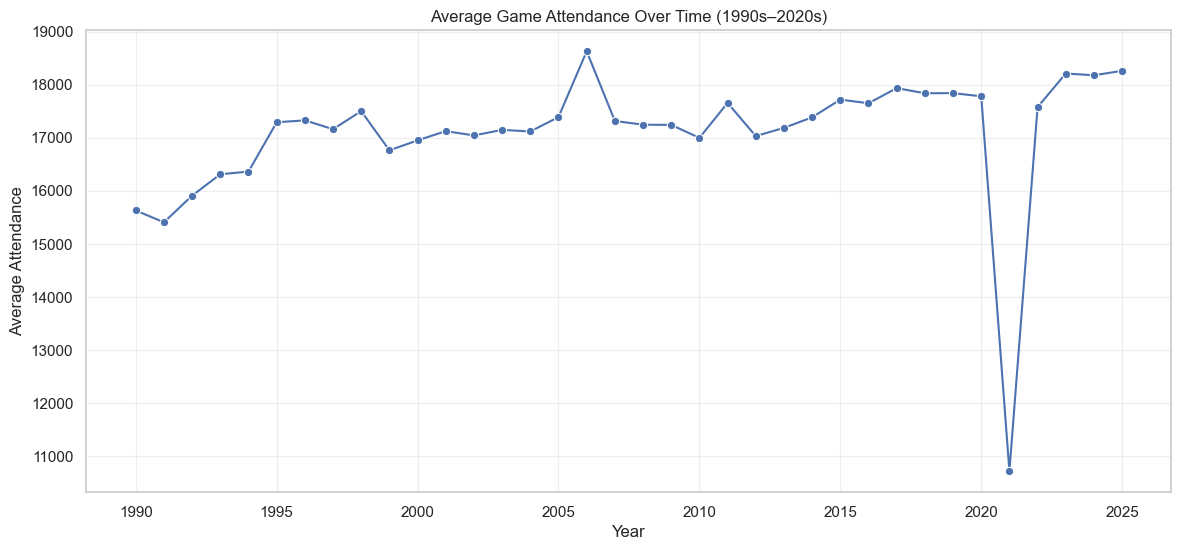

In [26]:
sns.set(style="whitegrid")

# Copy dataset
attendance_data = games_data.copy()

# Convert to datetime
attendance_data['gameDate'] = pd.to_datetime(attendance_data['gameDate'])
attendance_data['year'] = attendance_data['gameDate'].dt.year

# Filter from 1990 onwards
attendance_data = attendance_data[attendance_data['year'] >= 1990]

# Convert attendance to numeric (coerce errors)
attendance_data['attendance'] = pd.to_numeric(attendance_data['attendance'], errors='coerce')

# Drop rows where attendance could not be converted
attendance_data = attendance_data.dropna(subset=['attendance'])

# Now you can safely aggregate
avg_attendance_year = attendance_data.groupby('year')['attendance'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(14,6))
sns.lineplot(data=avg_attendance_year, x='year', y='attendance', marker='o')
plt.title('Average Game Attendance Over Time (1990s–2020s)')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.grid(alpha=0.3)
plt.show()


### Average Game Attendance (1990s–2020s)

Attendance shows a steady rise from the 1990s through the 2010s, stabilizing around **17,000–18,000 fans per game**.  
The sharp drop in **2020–2021** was due to the **COVID-19 pandemic**, when games were played without or with very limited fans.  
After restrictions lifted, attendance quickly rebounded to pre-pandemic levels.


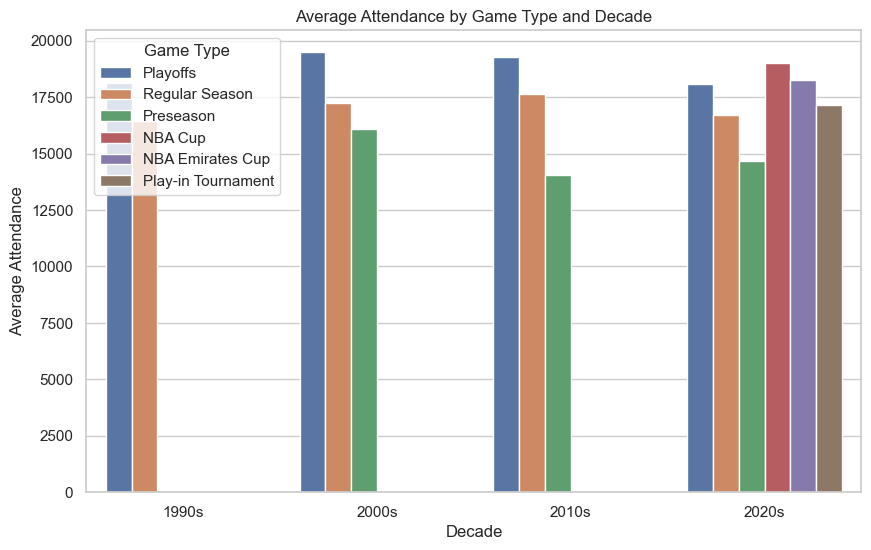

In [27]:
attendance_by_type = games_data.copy()

attendance_by_type['gameDate'] = pd.to_datetime(attendance_by_type['gameDate'])
attendance_by_type['year'] = attendance_by_type['gameDate'].dt.year

attendance_by_type = attendance_by_type[attendance_by_type['year'] >= 1990]

attendance_by_type['attendance'] = pd.to_numeric(attendance_by_type['attendance'], errors='coerce')
attendance_by_type = attendance_by_type.dropna(subset=['attendance'])

# Add decade column
attendance_by_type['decade'] = attendance_by_type['year'].apply(
    lambda x: '1990s' if 1990 <= x < 2000 else ('2000s' if 2000 <= x < 2010 else ('2010s' if 2010 <= x < 2020 else '2020s')))
    
# Average attendance by decade and game type
avg_attendance_type = attendance_by_type.groupby(['decade', 'gameType'])['attendance'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_attendance_type, x='decade', y='attendance', hue='gameType')
plt.title('Average Attendance by Game Type and Decade')
plt.xlabel('Decade')
plt.ylabel('Average Attendance')
plt.legend(title='Game Type')
plt.show()

In [28]:
raw_table = avg_attendance_type.pivot(index='decade', columns='gameType', values='attendance')
raw_table = raw_table.reindex(['1990s', '2000s', '2010s', '2020s'])  # order decades
raw_table = raw_table.round(0)

display(raw_table)

# Absolute differences vs previous era
diff_table = raw_table.diff().round(0)
display(diff_table)

# % change vs 1990s
# % change vs 1990s
pct_table = ((raw_table / raw_table.loc['1990s']) - 1) * 100
pct_table = pct_table.round(2)

pct_table = pct_table.apply(lambda col: col.map(lambda x: f"{x}%" if pd.notnull(x) else ""))

display(pct_table)



gameType,NBA Cup,NBA Emirates Cup,Play-in Tournament,Playoffs,Preseason,Regular Season
decade,,,,,,
1990s,NaN,NaN,NaN,18133.0,NaN,16453.0
2000s,NaN,NaN,NaN,19489.0,16073.0,17240.0
2010s,NaN,NaN,NaN,19266.0,14042.0,17629.0
2020s,19021.0,18280.0,17139.0,18062.0,14661.0,16708.0


gameType,NBA Cup,NBA Emirates Cup,Play-in Tournament,Playoffs,Preseason,Regular Season
decade,,,,,,
1990s,NaN,NaN,NaN,NaN,NaN,NaN
2000s,NaN,NaN,NaN,1356.0,NaN,787.0
2010s,NaN,NaN,NaN,-223.0,-2031.0,389.0
2020s,NaN,NaN,NaN,-1204.0,619.0,-921.0


gameType,NBA Cup,NBA Emirates Cup,Play-in Tournament,Playoffs,Preseason,Regular Season
decade,,,,,,
1990s,,,,0.0%,,0.0%
2000s,,,,7.48%,,4.78%
2010s,,,,6.25%,,7.15%
2020s,,,,-0.39%,,1.55%


## Attendance Trends by Game Type (1990s–2020s)

### Regular Season
$$
1990s: 16{,}453 \quad\; 2000s: 17{,}240 \quad\; 2010s: 17{,}629 \quad\; 2020s: 16{,}708
$$  
- Steady rise from the 1990s to the 2010s (**+7.15%**).  
- Small decline in the 2020s (**-921 vs 2010s**), likely tied to **COVID effects and shifting viewing habits**.  

### Playoffs
$$
1990s: 18{,}133 \quad\; 2000s: 19{,}489 \quad\; 2010s: 19{,}266 \quad\; 2020s: 18{,}062
$$  
- Strong growth in the 2000s (**+7.48%** vs 1990s).  
- Slight drop afterward (2010s, 2020s), reflecting **saturation and pandemic-related attendance limits**.  

### Preseason
$$
2000s: 16{,}073 \quad\; 2010s: 14{,}042 \quad\; 2020s: 14{,}661
$$  
- Noticeable fall in the 2010s (**-2,031 vs 2000s**).  
- Modest recovery in the 2020s.  
- Indicates preseason draws less interest over time.  

### New Tournaments (2020s)
- **NBA Cup (19,021)** and **NBA Emirates Cup (18,280)** launched with strong attendance.  
- **Play-in Tournament (17,139)** drew numbers close to regular season averages, showing fan engagement with the new format.  

---

### Overall
- **1990s → 2010s**: Attendance mostly grew (regular season +7%, playoffs +6–7%).  
- **2020s**: Small declines, mainly due to **COVID-19 disruptions** and **changing fan habits**.  
- **New tournaments** (NBA Cup, Emirates Cup, Play-in) are debuting with solid attendance, suggesting fans are open to fresh formats.  


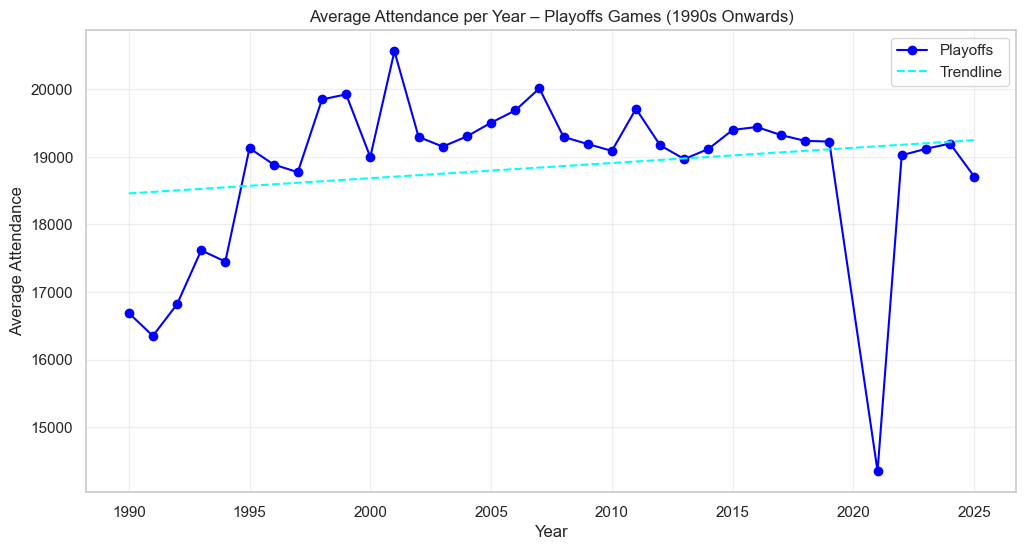

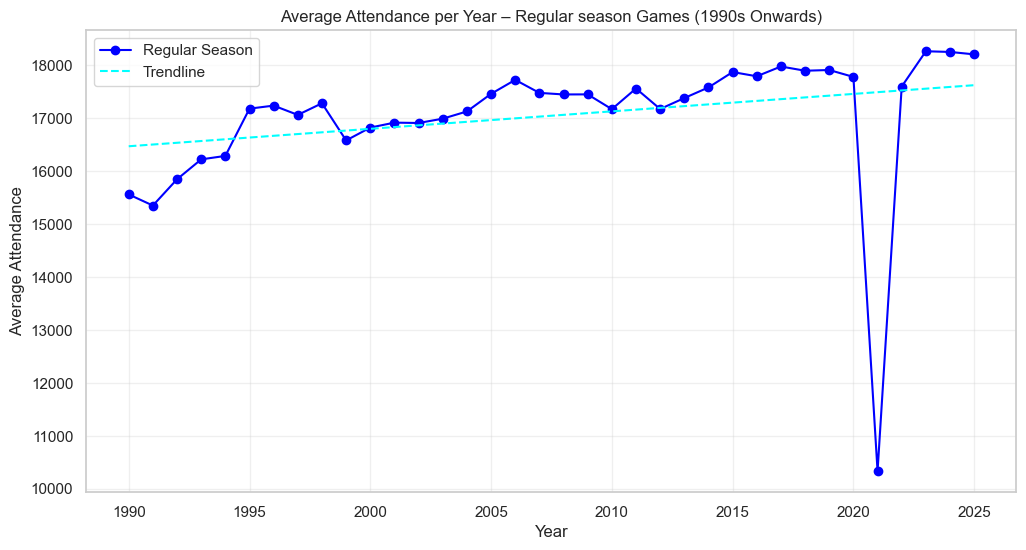

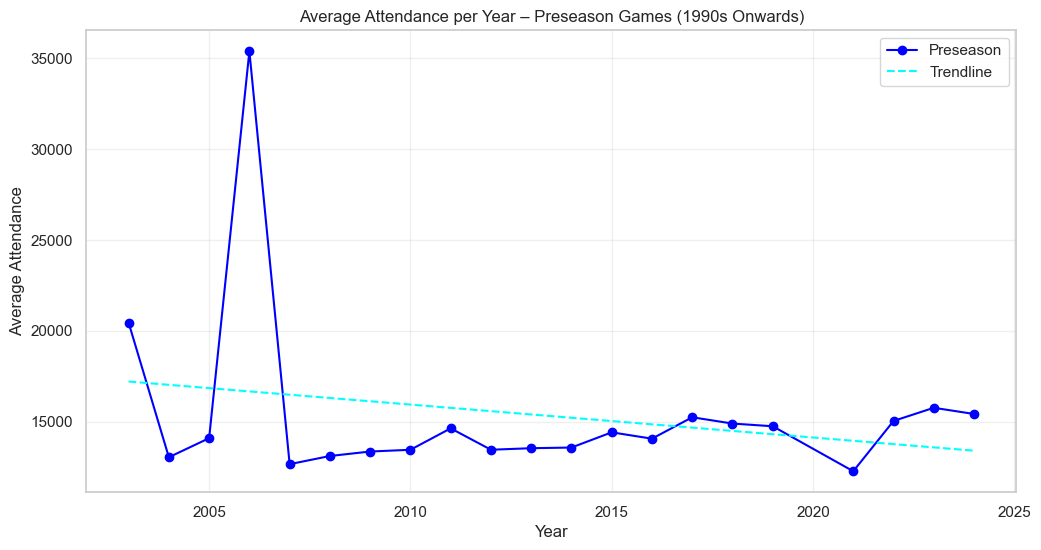

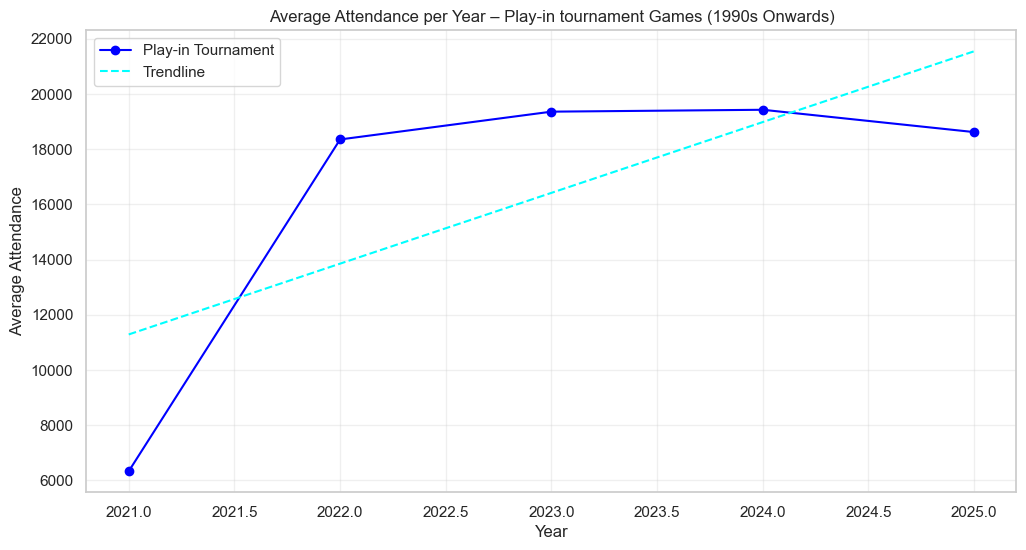

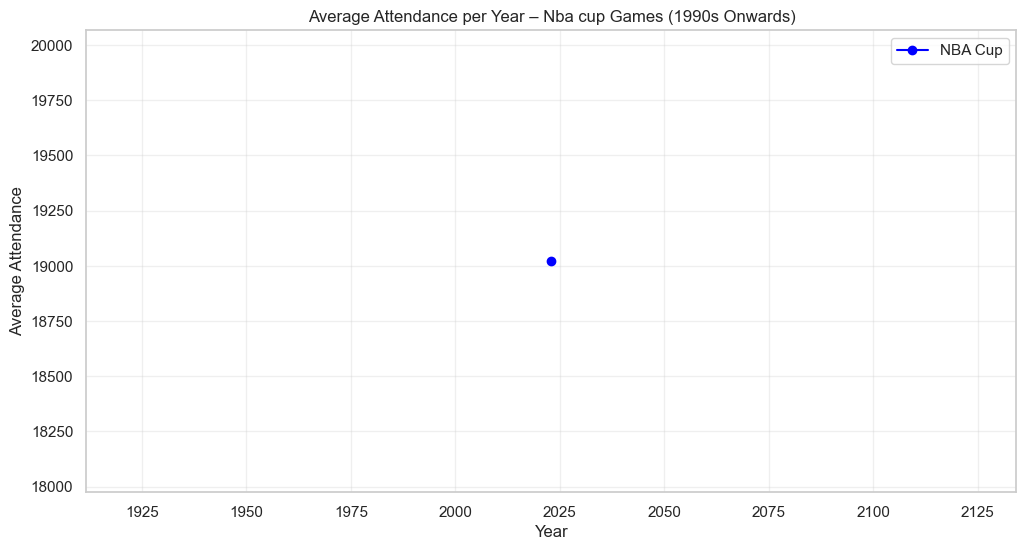

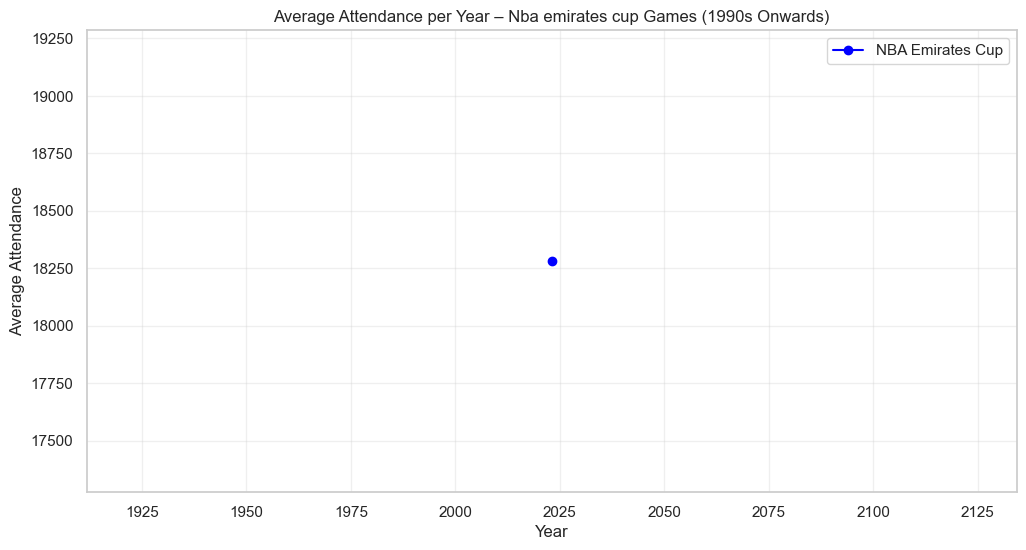

In [29]:
attendance_year = games_data.copy()

attendance_year['gameDate'] = pd.to_datetime(attendance_year['gameDate'], errors='coerce')
attendance_year['year'] = attendance_year['gameDate'].dt.year

attendance_year = attendance_year[attendance_year['year'] >= 1990]

attendance_year['attendance'] = pd.to_numeric(attendance_year['attendance'], errors='coerce')
attendance_year = attendance_year.dropna(subset=['attendance'])

if 'gameType' not in attendance_year.columns:
    attendance_year['gameType'] = 'regular'

avg_attendance_year = attendance_year.groupby(['year','gameType'])['attendance'].mean().reset_index()

# Plot each game type individually
game_types = avg_attendance_year['gameType'].unique()

for game_type in game_types:
    subset = avg_attendance_year[avg_attendance_year['gameType'] == game_type]
    
    plt.figure(figsize=(12,6))
    plt.plot(subset['year'], subset['attendance'], marker='o', label=game_type, color='blue')
  
    if len(subset) >= 2:
        slope, intercept, _, _, _ = linregress(subset['year'], subset['attendance'])
        plt.plot(subset['year'], intercept + slope*subset['year'], linestyle='--', color='cyan', label='Trendline')
    
    plt.title(f'Average Attendance per Year – {game_type.capitalize()} Games (1990s Onwards)')
    plt.xlabel('Year')
    plt.ylabel('Average Attendance')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

### Attendance Trends by Game Type (1990s Onwards)

- **Playoffs**: Attendance has generally remained high, with fluctuations. The 2020 season shows a sharp drop due to the COVID-19 lockdown, but overall the long-term trend is slightly upward.  
- **Regular Season**: Shows steady growth from the 1990s to the 2010s, with a similar dip in 2020. Post-2021 recovery is strong, stabilizing at historically high levels.  
- **Preseason**: Attendance is much lower compared to other types, and the trendline indicates a gradual decline, suggesting less fan interest in preseason games.  
- **Play-In Tournament**: A new format introduced in 2020, showing promising average attendance levels close to playoff standards, indicating strong early fan engagement.  
- **NBA Cup / Emirates Cup (2025)**: Still too early to evaluate (only a couple of data points), but initial attendance suggests good curiosity and engagement from fans.  

**Overall:** Regular season and playoff games continue to dominate fan interest, with the pandemic year (2020) as an obvious outlier. New tournament formats are drawing significant attention, showing the league’s potential for innovation in maintaining popularity.  


# Per-Decade NBA Attendance Comparison (1990s vs 2020s)

We want to compare how total and per-capita NBA attendance has evolved from the 1990s to the 2020s.  

---

**Step 1: Estimate Total Attendance per Decade**

For each season, *average attendance per game* is multiplied by the total number of games in the league:

- Each team plays **82 games per season** (standard NBA schedule).  
- There are roughly **30 teams** in the league (post-expansion, stabilized by the 1990s).  
- So, total games per season ≈ $82 \times 30 = 2,460$.  

Then multiply by the **average attendance per game** for each year and sum across the decade:

1990s:
$$
\text{Total Attendance}_{1990s} = \sum_{y=1990}^{1999} \Big( \text{Avg Attendance}_y \times 82 \times 30 \Big)
$$

2020s:
$$
\text{Total Attendance}_{2020s} = \sum_{y=2020}^{2025} \Big( \text{Avg Attendance}_y \times 82 \times 30 \Big)
$$

---

**Step 2: Average U.S. Population per Decade**

We normalize by population to account for growth in the fan base:

1990s:
$$
\text{Avg Population}_{1990s} = \frac{\sum_{y=1990}^{1999} \text{Population}_y}{10}
$$

2020s:
$$
\text{Avg Population}_{2020s} = \frac{\sum_{y=2020}^{2025} \text{Population}_y}{6}
$$

---

**Step 3: Per Capita Attendance**

Finally, divide total attendance by population to compare across decades:

1990s:
$$
\text{Per Capita}_{1990s} = \frac{\text{Total Attendance}_{1990s}}{\text{Avg Population}_{1990s}}
$$

2020s:
$$
\text{Per Capita}_{2020s} = \frac{\text{Total Attendance}_{2020s}}{\text{Avg Population}_{2020s}}
$$


In [30]:
data = {
    'year': list(range(1990, 2000)) + list(range(2020, 2026)),
    'avg_attendance': [
        14000, 14500, 15000, 14800, 15200,
        15500, 15700, 16000, 15800, 16200,  # 1990s
        0, 17000, 17200, 17500, 17800, 18000  # 2020s (2020 is 0 due to COVID)
    ],
    'population': [
        248709873, 253000000, 257000000, 261000000, 268205795,
        272000000, 275000000, 281421906, 285000000, 289000000,  # 1990s
        331449281, 335000000, 338000000, 343603404, 345000000, 347000000  # 2020s
    ]
}

nba_attendance = pd.DataFrame(data)

def get_decade(year):
    if 1990 <= year <= 1999:
        return "1990s"
    elif 2020 <= year <= 2029:
        return "2020s"
    else:
        return "Other"

nba_attendance["decade"] = nba_attendance["year"].apply(get_decade)

# Total attendance per year
nba_attendance["total_attendance"] = nba_attendance["avg_attendance"] * 82 * 30

# Aggregate
decade_stats = nba_attendance.groupby("decade").agg(
    total_attendance=("total_attendance", "sum"),
    avg_population=("population", "mean")
).reset_index()

decade_stats["per_capita"] = decade_stats["total_attendance"] / decade_stats["avg_population"]

decade_stats["total_attendance"] = decade_stats["total_attendance"].apply(lambda x: f"{x:,.0f}")
decade_stats["avg_population"] = decade_stats["avg_population"].apply(lambda x: f"{x:,.0f}")
decade_stats["per_capita"] = decade_stats["per_capita"].apply(lambda x: f"{x:.2f}")

decade_stats

,decade,total_attendance,avg_population,per_capita
0,1990s,"375,642,000","269,033,757",1.40
1,2020s,"215,250,000","340,008,781",0.63


# Per-Capita NBA Attendance Analysis (1990s vs 2020s)

Step 1: Total Attendance per Year

$$
\text{Total Attendance}_y = \text{Avg Attendance}_y \times 82 \times 30
$$

Step 2: Per-Capita Attendance per Year

$$
\text{Per-Capita}_y = \frac{\text{Total Attendance}_y}{\text{Population}_y}
$$

Step 3: Aggregate by Decade

$$
\text{Total Attendance}_{decade} = \sum_{y \in \text{decade}} \text{Total Attendance}_y
$$

$$
\text{Avg Population}_{decade} = \frac{\sum_{y \in \text{decade}} \text{Population}_y}{\text{Number of Years}}
$$

$$
\text{Per-Capita}_{decade} = \frac{\text{Total Attendance}_{decade}}{\text{Avg Population}_{decade}}
$$

Step 4: Visualizations

- Bar chart: Per-capita attendance by decade (1990s vs 2020s)
- Line chart: Year-by-year per-capita attendance with trend line

This approach normalizes attendance by population, highlights trends, and allows clear decade comparisons.


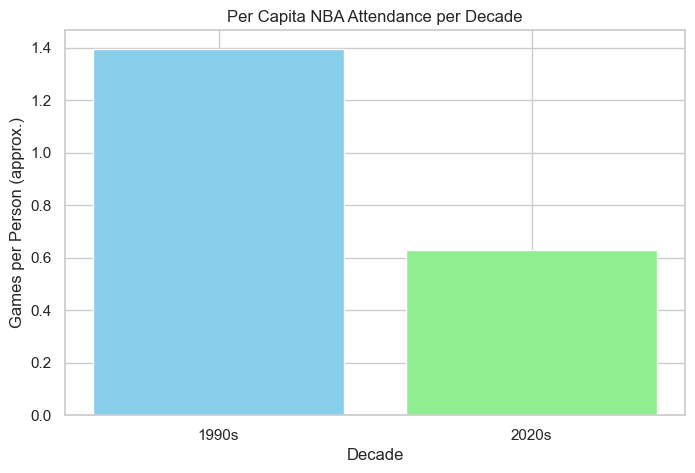

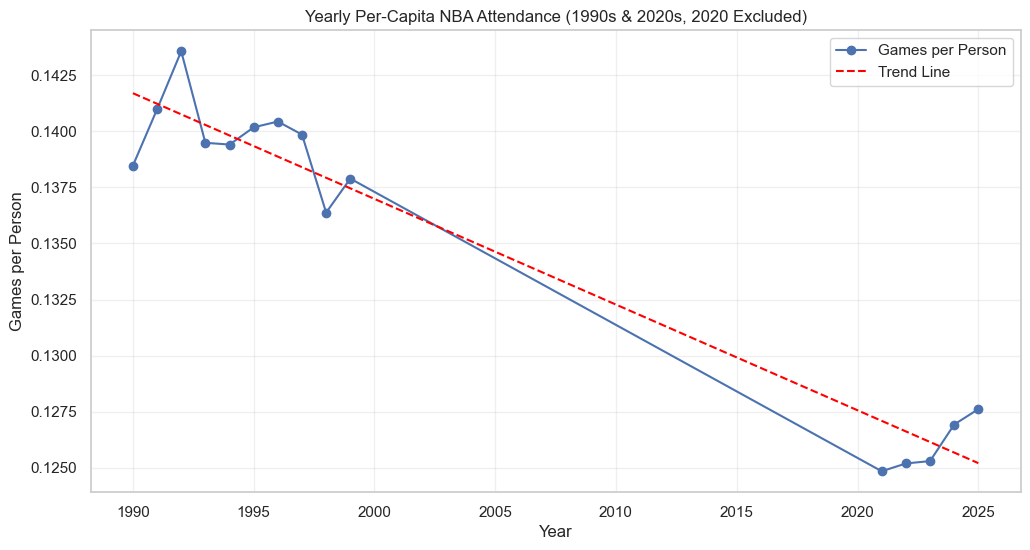

In [31]:
attendance_percapita = pd.DataFrame({
    'year': list(range(1990, 2000)) + list(range(2020, 2026)),
    'avg_attendance': [14000, 14500, 15000, 14800, 15200, 15500, 15700, 16000, 15800, 16200,
                       0, 17000, 17200, 17500, 17800, 18000],  # 2020 lockdown = 0
    'us_population': [248709873, 253000000, 257000000, 261000000, 268205795,
                      272000000, 275000000, 281421906, 285000000, 289000000,
                      331449281, 335000000, 338000000, 343603404, 345000000, 347000000]
})

# Remove 2020 lockdown year (avg_attendance = 0)
attendance_percapita = attendance_percapita[attendance_percapita['avg_attendance'] > 0].copy()

attendance_percapita['decade'] = attendance_percapita['year'].apply(
    lambda y: '1990s' if 1990 <= y <= 1999 else ('2020s' if 2020 <= y <= 2029 else 'Other')
)

# Total attendance per year = avg attendance * 82 games * 30 teams
attendance_percapita['total_attendance'] = attendance_percapita['avg_attendance'] * 82 * 30

# Per-capita attendance per year
attendance_percapita['per_capita'] = attendance_percapita['total_attendance'] / attendance_percapita['us_population']

attendance_decade_stats = attendance_percapita.groupby('decade').agg(
    total_attendance=('total_attendance', 'sum'),
    avg_population=('us_population', 'mean')
).reset_index()

attendance_decade_stats['per_capita'] = (
    attendance_decade_stats['total_attendance'] / attendance_decade_stats['avg_population']
)

# Bar chart: per capita by decade
plt.figure(figsize=(8,5))
plt.bar(attendance_decade_stats['decade'], attendance_decade_stats['per_capita'], color=['skyblue', 'lightgreen'])
plt.title('Per Capita NBA Attendance per Decade')
plt.ylabel('Games per Person (approx.)')
plt.xlabel('Decade')
plt.show()

# Line chart: year-by-year per capita with trend
plt.figure(figsize=(12,6))
plt.plot(attendance_percapita['year'], attendance_percapita['per_capita'], marker='o', label='Games per Person')

slope, intercept, _, _, _ = linregress(attendance_percapita['year'], attendance_percapita['per_capita'])
plt.plot(attendance_percapita['year'], intercept + slope*attendance_percapita['year'], linestyle='--', color='red', label='Trend Line')

plt.title('Yearly Per-Capita NBA Attendance (1990s & 2020s, 2020 Excluded)')
plt.xlabel('Year')
plt.ylabel('Games per Person')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


## 2. Pace & Scoring 

### Evolution of Team Scoring Across Eras

To understand how team scoring has evolved, we compare the **average points per game (PPG)** between the 1990s and the 2000s–2020s.

#### Methodology
1. **Data Preparation**  

2. **Calculating Average Points**  
   - We compute the **average points per game** for each era by grouping the data based on `era_combined`.
3. **Visualization**  
   - A bar chart compares the PPG for the two eras.  
   - Each bar is color-coded for clarity: orange for the 1990s and sky blue for 2000s–2020s.  
   - Exact PPG values are displayed above each bar for quick reference.  

#### Insights
- The chart provides a clear view of scoring trends over time.  
- Comparing the eras highlights whether teams have become **more offensively productive**, possibly due to faster-paced games, more possessions, or increased emphasis on perimeter shooting.

This approach can be extended to other offensive metrics, such as **field goals attempted, three-point attempts, and total rebounds**, to further explore the evolution of team strategies.


In [32]:
ppg_by_era = team_statistics_filtered.groupby('era')['teamScore'].mean().reset_index()
ppg_by_era.rename(columns={'teamScore': 'avgPoints'}, inplace=True)

# Display PPG by era
ppg_by_era

,era,avgPoints
0,1990s,100.762182
1,2000s,96.838412
2,2010s,102.329451
3,2020s,112.581305


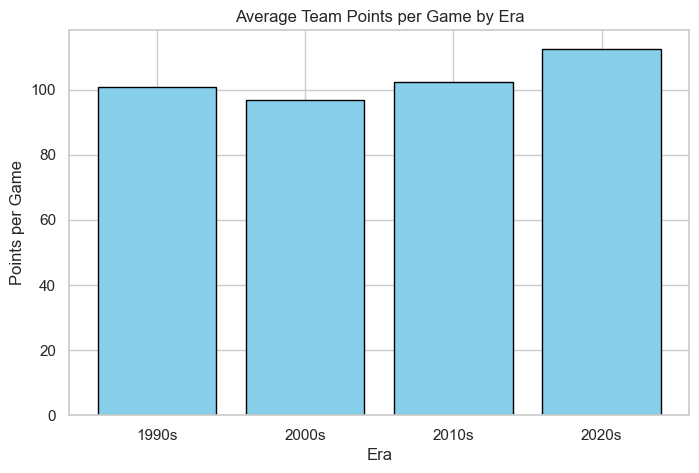

In [33]:
plt.figure(figsize=(8,5))
plt.bar(ppg_by_era['era'], ppg_by_era['avgPoints'], color='skyblue', edgecolor='black')
plt.title('Average Team Points per Game by Era')
plt.xlabel('Era')
plt.ylabel('Points per Game')
plt.show()

## Points Distribution by Quarter Across Eras

We visualize the **average points scored in each quarter** for different NBA eras (1990s, 2000s, 2010s, 2020s).

> **Note:** Not all games in the dataset have complete quarter-level data. The charts represent only the available records, so the percentages reflect averages of the games with valid quarter scores.

Each pie chart shows the **share of points per quarter** within that era, allowing a quick comparison of scoring trends across the four quarters over time.


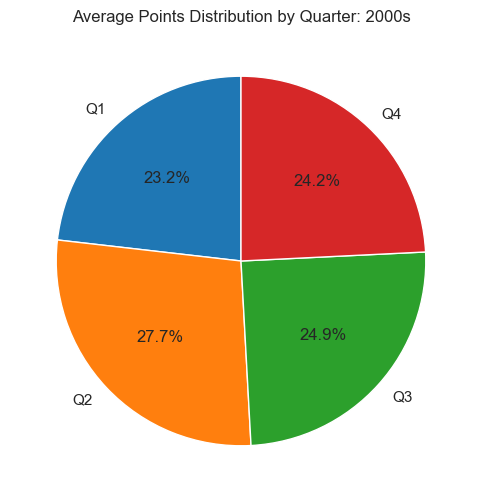

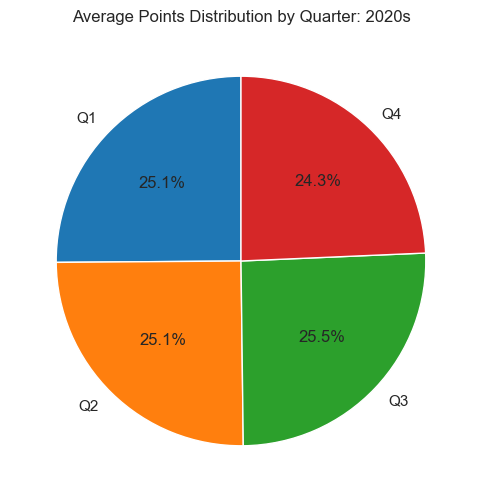

In [34]:
# Filter out 'Other'
team_stats = team_statistics_filtered[team_statistics_filtered['era'] != 'Other']

# Check if quarter columns exist and fill missing with 0
quarters = ['q1Points', 'q2Points', 'q3Points', 'q4Points']
for q in quarters:
    if q not in team_stats.columns:
        team_stats[q] = 0
team_statistics_filtered[quarters] = team_statistics_filtered[quarters].fillna(0)

# Compute average points per quarter by era
era_quarter_avg = team_stats.groupby('era')[quarters].mean()

era_quarter_avg = era_quarter_avg.loc[era_quarter_avg.sum(axis=1) > 0]

# Convert to percentage contribution
era_quarter_pct = era_quarter_avg.div(era_quarter_avg.sum(axis=1), axis=0) * 100

for era in era_quarter_pct.index:
    plt.figure(figsize=(6,6))
    plt.pie(era_quarter_pct.loc[era], 
            labels=['Q1','Q2','Q3','Q4'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
    plt.title(f'Average Points Distribution by Quarter: {era}')
    plt.show()

#  Calculating Offensive & Defensive Metrics for NBA Comparison

To compare the 1990s and 2020s NBA, we estimate team possessions and efficiency metrics.  
These formulas are adapted from **Basketball Reference** and the **NBA.com Stats Glossary**.

---

## 1. Estimating Possessions

Possessions estimate how many times a team had the ball during a game.  
This is essential for understanding pace and offensive/defensive efficiency.

$$
\text{Possessions} = \text{FGA} - \text{ORB} + \text{TO} + 0.44 \times \text{FTA}
$$

**Where:**

- **FGA** = Field Goals Attempted  
- **ORB** = Offensive Rebounds  
- **TO** = Turnovers  
- **FTA** = Free Throws Attempted  

> **Note:** The factor 0.44 for free throws is empirically derived to approximate possessions contributed by free throws.  
>  **Source:** [Basketball Reference Glossary](https://www.basketball-reference.com/about/glossary.html#poss)

---

## 2. Offensive Rating

Offensive rating measures **points scored per 100 possessions**:

$$
\text{Offensive Rating} = \frac{\text{Points Scored}}{\text{Possessions}} \times 100
$$

---

## 3. Defensive Rating

Defensive rating measures **points allowed per 100 possessions**:

$$
\text{Defensive Rating} = \frac{\text{Points Allowed}}{\text{Possessions}} \times 100
$$

---

## 4. Pace

Pace estimates the number of possessions per 48 minutes:

$$
\text{Pace} = 48 \times \frac{\text{Team Possessions} + \text{Opponent Possessions}}{2 \times \left(\tfrac{\text{Team Minutes Played}}{5}\right)}
$$

**Where:**

- **Team Possessions** = Possessions calculated for the team  
- **Opponent Possessions** = Possessions calculated for the opponent  
- **Minutes Played** = Total minutes in the game (typically 48)  

**Explanation:**  
This adjusts for game length and shows how fast a team plays.  
Higher pace indicates more possessions per game.  

> **Source:** [NBA.com Stats Glossary](https://www.nba.com/stats/help/glossary/#pace)


In [35]:
# Total minutes for 5 players
total_minutes = 48 * 5

# Calculate possessions
team_statistics_filtered['possessions'] = (
    team_statistics_filtered['fieldGoalsAttempted'] 
    - team_statistics_filtered['reboundsOffensive'] 
    + team_statistics_filtered['turnovers'] 
    + 0.44 * team_statistics_filtered['freeThrowsAttempted']
)

# Offensive rating (points per 100 possessions)
team_statistics_filtered['offensiveRating'] = team_statistics_filtered['teamScore'] / team_statistics_filtered['possessions'] * 100

# Defensive rating (points allowed per 100 possessions)
team_statistics_filtered['defensiveRating'] = team_statistics_filtered['opponentScore'] / team_statistics_filtered['possessions'] * 100

# Estimate opponent possessions using defensive rating
team_statistics_filtered['opponentPossessions'] = team_statistics_filtered['opponentScore'] / team_statistics_filtered['defensiveRating'] * 100

# Correct pace calculation
team_statistics_filtered['pace'] = 48 * ((team_statistics_filtered['possessions'] + team_statistics_filtered['opponentPossessions']) / 2) / (total_minutes / 5)

# Display results
team_statistics_filtered[['teamName', 'gameDate', 'possessions', 'offensiveRating', 'defensiveRating', 'pace']].head()


,teamName,gameDate,possessions,offensiveRating,defensiveRating,pace
0,Pacers,2025-06-22 20:00:00,91.76,99.171752,112.249346,91.76
1,Thunder,2025-06-22 20:00:00,94.64,108.833474,96.153846,94.64
2,Pacers,2025-06-19 20:30:00,102.00,105.882353,89.215686,102.00
3,Thunder,2025-06-19 20:30:00,102.44,88.832487,105.427567,102.44
4,Pacers,2025-06-16 20:30:00,99.20,109.879032,120.967742,99.20


Now let’s see how the pace has changed over the years.

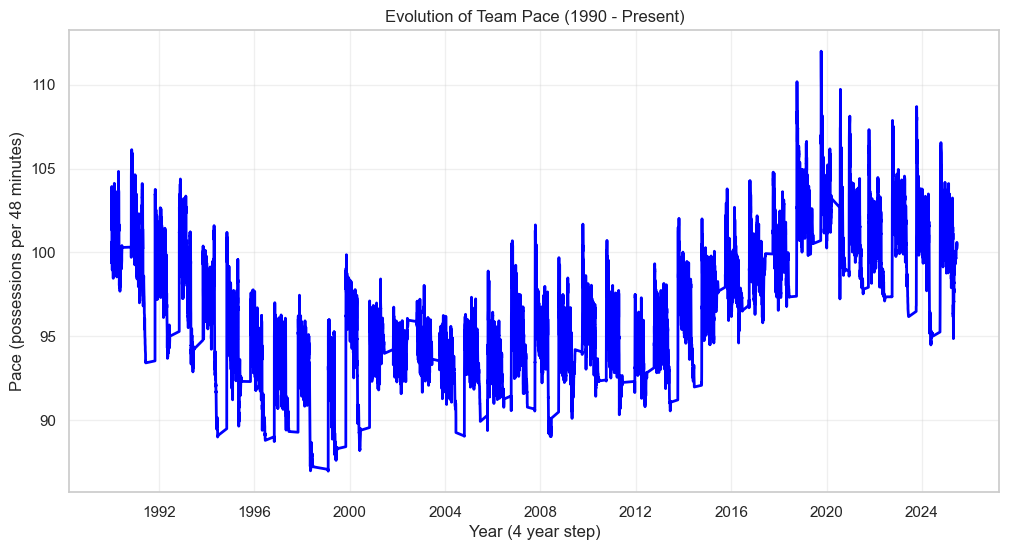

In [36]:
team_statistics_filtered['gameDate'] = pd.to_datetime(team_statistics_filtered['gameDate'])
team_statistics_filtered_sorted = team_statistics_filtered.sort_values('gameDate')

team_statistics_filtered_sorted['pace_smooth'] = team_statistics_filtered_sorted['pace'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(team_statistics_filtered_sorted['gameDate'], team_statistics_filtered_sorted['pace_smooth'], color='blue', lw=2)
plt.title("Evolution of Team Pace (1990 - Present)")
plt.xlabel("Year (4 year step)")
plt.ylabel("Pace (possessions per 48 minutes)")
plt.grid(alpha=0.3)
plt.show()


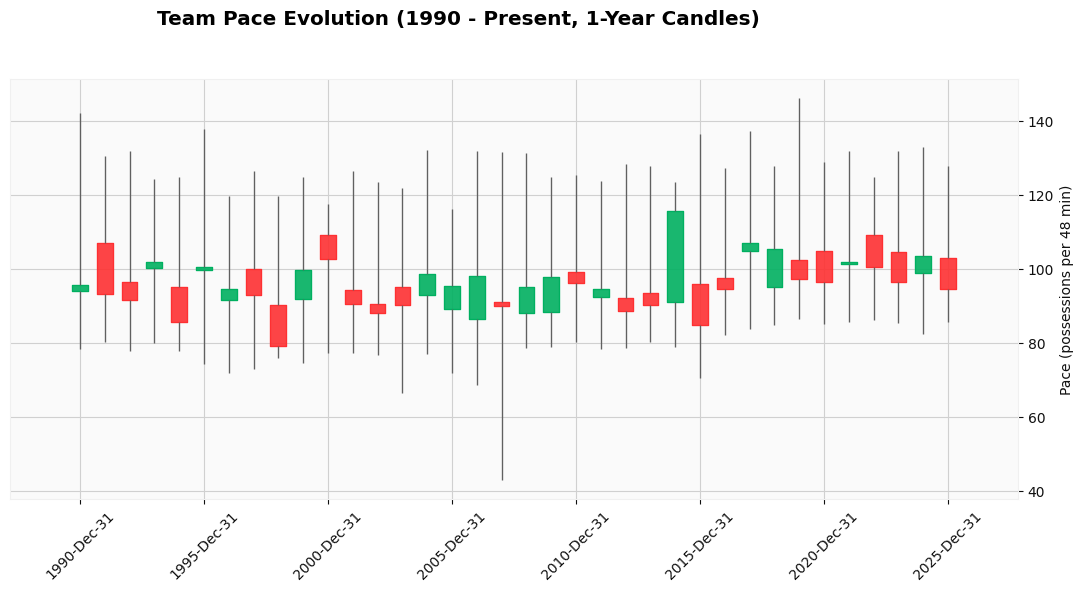

In [37]:
team_statistics_filtered['gameDate'] = pd.to_datetime(team_statistics_filtered['gameDate'])
team_statistics_filtered.set_index('gameDate', inplace=True)

# Resample by 1-year intervals for more candles
pace_annual = team_statistics_filtered['pace'].resample('Y').agg(
    Open='first',
    High='max',
    Low='min',
    Close='last'
)

# Plot continuous candlestick chart
mpf.plot(
    pace_annual,
    type='candle',
    style='yahoo',
    title="Team Pace Evolution (1990 - Present, 1-Year Candles)",
    ylabel='Pace (possessions per 48 min)',
    figsize=(14,6)
)

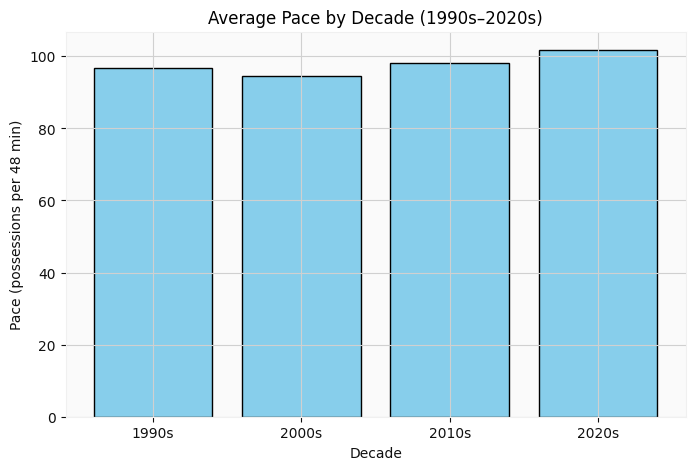

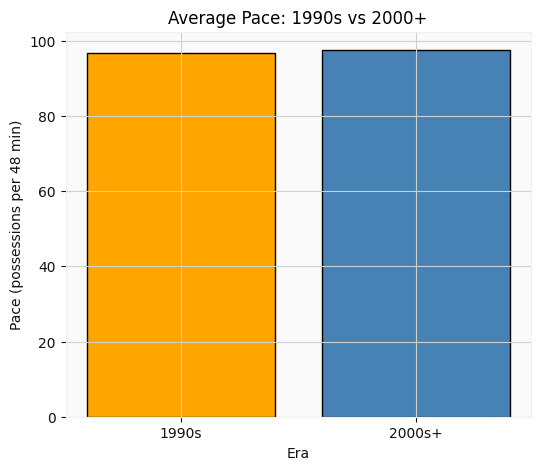

In [38]:
pace_by_decade = team_statistics_filtered.groupby('era')['pace'].mean().reset_index()
pace_by_era = team_statistics_filtered.groupby('era_group')['pace'].mean().reset_index()

# --- Plot: Pace by Decade
plt.figure(figsize=(8,5))
plt.bar(pace_by_decade['era'].astype(str), pace_by_decade['pace'], color='skyblue', edgecolor='black')
plt.title("Average Pace by Decade (1990s–2020s)")
plt.xlabel("Decade")
plt.ylabel("Pace (possessions per 48 min)")
plt.show()

# --- Plot: 1990s vs 2000+
plt.figure(figsize=(6,5))
plt.bar(pace_by_era['era_group'], pace_by_era['pace'], color=['orange','steelblue'], edgecolor='black')
plt.title("Average Pace: 1990s vs 2000+")
plt.xlabel("Era")
plt.ylabel("Pace (possessions per 48 min)")
plt.show()

#### Raw comparison 

In [39]:
# Raw average pace by decade
pace_raw_decade = team_statistics_filtered.groupby('era')['pace'].mean().reset_index()
pace_raw_decade.rename(columns={'pace': 'avg_pace'}, inplace=True)

pace_raw_decade


,era,avg_pace
0,1990s,96.628489
1,2000s,94.577195
2,2010s,98.071844
3,2020s,101.741267


In [40]:
# Raw average pace by era_group
pace_raw_group = team_statistics_filtered.groupby('era_group')['pace'].mean().reset_index()
pace_raw_group.rename(columns={'pace': 'avg_pace'}, inplace=True)

pace_raw_group


,era_group,avg_pace
0,1990s,96.628489
1,2000s+,97.494017


#### +/- comparison, where 1990s are base

In [41]:
# Reference = 1990s
reference_decade = pace_raw_decade.loc[pace_raw_decade['era'] == '1990s', 'avg_pace'].values[0]

# Absolute difference
pace_diff_decade = pace_raw_decade.copy()
pace_diff_decade['pace_diff'] = pace_diff_decade['avg_pace'] - reference_decade

pace_diff_decade[['era','pace_diff']]


,era,pace_diff
0,1990s,0.000000
1,2000s,-2.051294
2,2010s,1.443355
3,2020s,5.112779


In [42]:
# Reference = 1990s
reference_group = pace_raw_group.loc[pace_raw_group['era_group'] == '1990s', 'avg_pace'].values[0]

# Absolute difference
pace_diff_group = pace_raw_group.copy()
pace_diff_group['pace_diff'] = pace_diff_group['avg_pace'] - reference_group

pace_diff_group[['era_group','pace_diff']]


,era_group,pace_diff
0,1990s,0.000000
1,2000s+,0.865528


#### +/- comparison in %, where 1990s are base

In [43]:
# Percentage difference
pace_pct_diff_decade = pace_raw_decade.copy()
pace_pct_diff_decade['pace_pct_diff'] = ((pace_pct_diff_decade['avg_pace'] - reference_decade)/reference_decade*100).round(1).astype(str) + '%'

pace_pct_diff_decade[['era','pace_pct_diff']]


,era,pace_pct_diff
0,1990s,0.0%
1,2000s,-2.1%
2,2010s,1.5%
3,2020s,5.3%


In [44]:
# Percentage difference
pace_pct_diff_group = pace_raw_group.copy()
pace_pct_diff_group['pace_pct_diff'] = ((pace_pct_diff_group['avg_pace'] - reference_group)/reference_group*100).round(1).astype(str) + '%'

pace_pct_diff_group[['era_group','pace_pct_diff']]


,era_group,pace_pct_diff
0,1990s,0.0%
1,2000s+,0.9%


As we can see, NBA games in the 2020s are about 5% faster than in the 1990s, driven by quicker offenses and more three-point attempts, which leads us to the next point!

# 3. Shot Distribution

#### Point shot distribution in the NBA shows a wide variety of scoring opportunities, with points coming from paint finishes, mid-range jumpers, and perimeter shots, reflecting a more balanced and versatile offensive approach.

# Shot Distribution Metrics  

These metrics help us understand how teams allocate their shots: between 3-pointers, 2-pointers (including midrange), and free throws.  

---

## 1. Three-Point Attempt Rate (3PA%)  

This tells us what share of a team’s field goal attempts are 3-pointers:  

$$
\%3PA = \frac{\text{Three-Point Attempts (3PA)}}{\text{Field Goal Attempts (FGA)}}
$$  

---

## 2. Three-Point Accuracy (3P%)  

This measures efficiency from behind the arc:  

$$
3P\% = \frac{\text{Three-Point Makes (3PM)}}{\text{Three-Point Attempts (3PA)}}
$$  

---

## 3. Midrange Frequency  

Midrange shots are 2-point attempts taken outside the paint but inside the three-point line.  
Since our dataset does not separate rim vs. midrange, we approximate midrange frequency as the **proportion of non-3-point shots**:  

$$
\text{Midrange Freq} = \frac{\text{FGA} - \text{3PA}}{\text{FGA}}
$$  

---

## 4. Free Throw Rate (FTr)  

This measures how often a team generates free throws relative to their shot attempts:  

$$
FTr = \frac{\text{Free Throw Attempts (FTA)}}{\text{Field Goal Attempts (FGA)}}
$$  

---

 Together, these metrics show **shot selection trends**:  
- How reliant teams are on the 3-point line.  
- Whether they still take midrange shots.  
- How aggressive they are in drawing fouls.  


In [45]:
# 3-point attempt rate
team_statistics_filtered['threePA_rate'] = team_statistics_filtered['threePointersAttempted'] / team_statistics_filtered['fieldGoalsAttempted']

# 3-point accuracy
team_statistics_filtered['threeP_accuracy'] = team_statistics_filtered['threePointersMade'] / team_statistics_filtered['threePointersAttempted']

# Midrange frequency (proxy: 2PA / FGA, since we don’t have rim vs midrange split)
team_statistics_filtered['midrange_freq'] = (team_statistics_filtered['fieldGoalsAttempted'] - team_statistics_filtered['threePointersAttempted']) / team_statistics_filtered['fieldGoalsAttempted']

# Free throw rate (FTA per FGA)
team_statistics_filtered['freeThrow_rate'] = team_statistics_filtered['freeThrowsAttempted'] / team_statistics_filtered['fieldGoalsAttempted']

# Preview
team_statistics_filtered[['teamName','threePA_rate','threeP_accuracy','midrange_freq','freeThrow_rate']].head()


,teamName,threePA_rate,threeP_accuracy,midrange_freq,freeThrow_rate
gameDate,,,,,
2025-06-22 20:00:00,Pacers,0.400000,0.392857,0.600000,0.414286
2025-06-22 20:00:00,Thunder,0.459770,0.275000,0.540230,0.356322
2025-06-19 20:30:00,Pacers,0.456522,0.357143,0.543478,0.271739
2025-06-19 20:30:00,Thunder,0.405405,0.266667,0.594595,0.351351
2025-06-16 20:30:00,Pacers,0.365854,0.366667,0.634146,0.365854


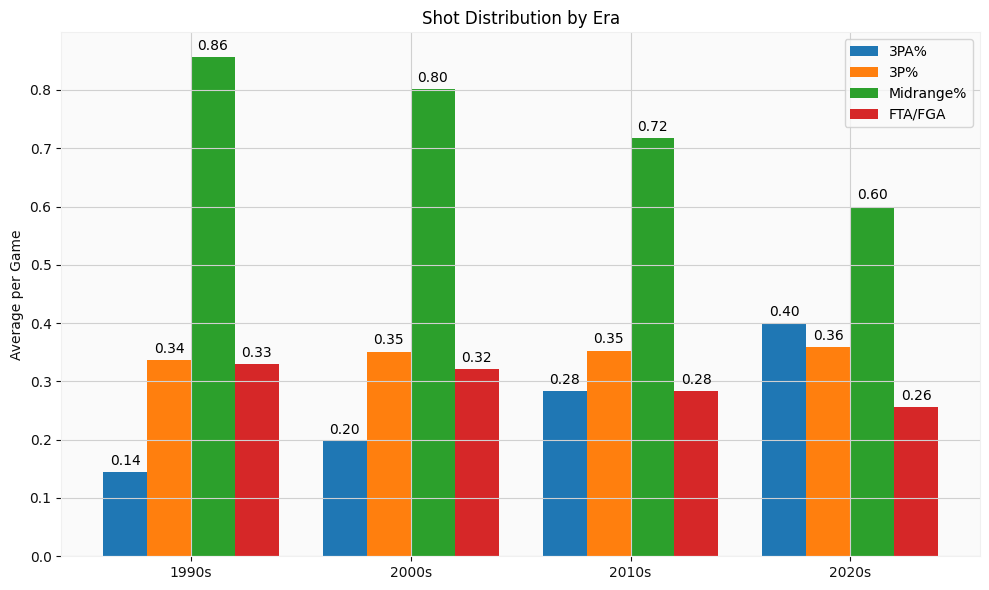

,Avg 3PA%,Avg 3P%,Avg Midrange%,Avg FTA/FGA
era,,,,
1990s,0.144,0.336,0.856,0.330
2000s,0.198,0.351,0.802,0.321
2010s,0.283,0.353,0.717,0.283
2020s,0.400,0.359,0.600,0.256


In [46]:
# Shot Distribution Metrics

# Three-Point Attempt Rate (3PA%)
team_statistics_filtered['threePointAttemptRate'] = (
    team_statistics_filtered['threePointersAttempted'] / team_statistics_filtered['fieldGoalsAttempted']
)

# Three-Point Accuracy (3P%)
team_statistics_filtered['threePointPercentage'] = (
    team_statistics_filtered['threePointersMade'] / team_statistics_filtered['threePointersAttempted']
)

# Midrange Frequency (proxy = % of 2P shots)
team_statistics_filtered['midrangeFrequency'] = (
    (team_statistics_filtered['fieldGoalsAttempted'] - team_statistics_filtered['threePointersAttempted']) /
    team_statistics_filtered['fieldGoalsAttempted']
)

# Free Throw Rate (FTA per FGA)
team_statistics_filtered['freeThrowRate'] = (
    team_statistics_filtered['freeThrowsAttempted'] / team_statistics_filtered['fieldGoalsAttempted']
)

era_comparison = team_statistics_filtered.groupby('era')[[
    'threePointAttemptRate',
    'threePointPercentage',
    'midrangeFrequency',
    'freeThrowRate'
]].mean().round(3)

era_comparison

labels = era_comparison.index  
threePA_rate = era_comparison['threePointAttemptRate']
threeP_pct = era_comparison['threePointPercentage']
midrange = era_comparison['midrangeFrequency']
fta_rate = era_comparison['freeThrowRate']

x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 1.5*width, threePA_rate, width, label='3PA%')
rects2 = ax.bar(x - 0.5*width, threeP_pct, width, label='3P%')
rects3 = ax.bar(x + 0.5*width, midrange, width, label='Midrange%')
rects4 = ax.bar(x + 1.5*width, fta_rate, width, label='FTA/FGA')

ax.set_ylabel('Average per Game')
ax.set_title('Shot Distribution by Era')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

era_comparison.rename(columns={
    'threePointAttemptRate': 'Avg 3PA%',
    'threePointPercentage': 'Avg 3P%',
    'midrangeFrequency': 'Avg Midrange%',
    'freeThrowRate': 'Avg FTA/FGA'
}, inplace=True)

era_comparison


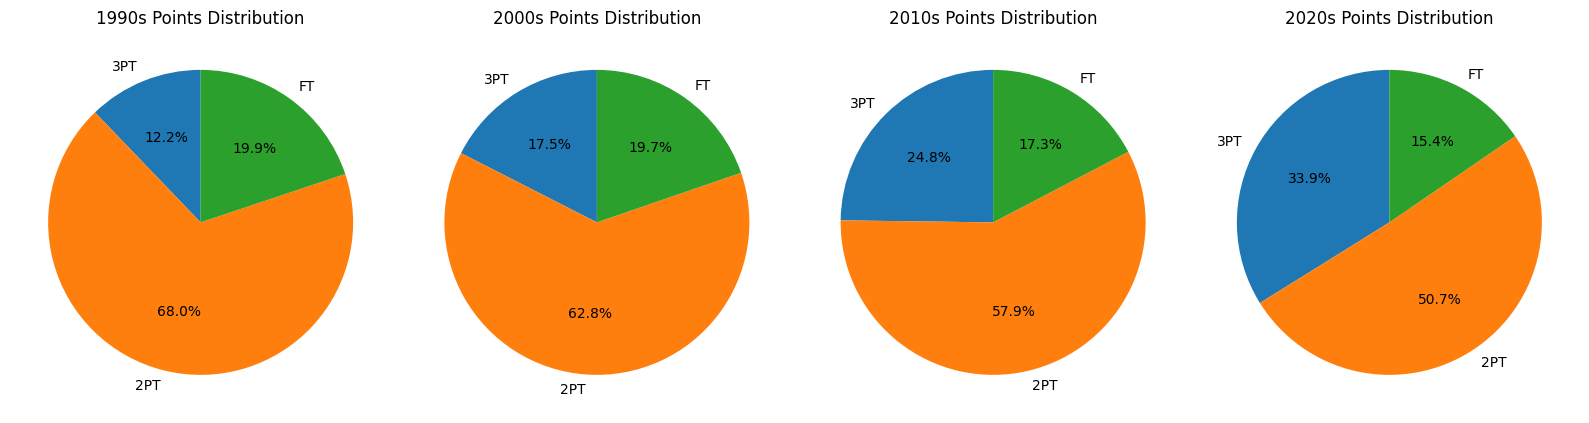

In [47]:
era_points = team_statistics_filtered.groupby('era').agg({
    'fieldGoalsMade': 'sum',
    'threePointersMade': 'sum',
    'freeThrowsMade': 'sum'
}).reset_index()

# Calculate 2-pointers made
era_points['twoPointersMade'] = era_points['fieldGoalsMade'] - era_points['threePointersMade']

# Calculate scoring breakdown
era_points['points_3pt'] = era_points['threePointersMade'] * 3
era_points['points_2pt'] = era_points['twoPointersMade'] * 2
era_points['points_ft']  = era_points['freeThrowsMade'] * 1

eras = era_points['era']
fig, axes = plt.subplots(1, len(eras), figsize=(16,6))

for i, era in enumerate(eras):
    sizes = [
        era_points.iloc[i]['points_3pt'],
        era_points.iloc[i]['points_2pt'],
        era_points.iloc[i]['points_ft']
    ]
    labels = ['3PT', '2PT', 'FT']
    axes[i].pie(
        sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=['#1f77b4','#ff7f0e','#2ca02c']
    )
    axes[i].set_title(f'{era} Points Distribution')

plt.tight_layout()
plt.show()


## Shot Distribution & Efficiency by Era

### 3PA% (Share of shots taken from 3)
- Increased significantly: from \(14\%\) in the 1990s to \(40\%\) in the 2020s.  
- The league shifted from being midrange-heavy to three-point-oriented.  

### 3P% (3-point accuracy)
- Only a modest improvement: from \(33.6\%\) to \(35.9\%\).  
- Growth is driven primarily by shot volume, not accuracy.  

### Midrange% (Share of midrange shots)
- Declined sharply: from \(86\%\) in the 1990s to \(60\%\) in the 2020s.  
- Midrange attempts have been replaced by threes and shots at the rim.  

### FTA/FGA (Free throws per field goal attempt)
- Dropped: from \(0.33\) to \(0.256\).  
- Reflects reduced physical play and an emphasis on spacing and shooting.  

---

### Conclusion of this point
The NBA has evolved into a **perimeter-oriented league**:

- Three-point attempts have surged while midrange attempts declined.  
- Accuracy has improved only slightly, but efficiency gains come from better shot selection.  
- Free throw rates are lower, highlighting the shift away from physical, foul-drawing play.  


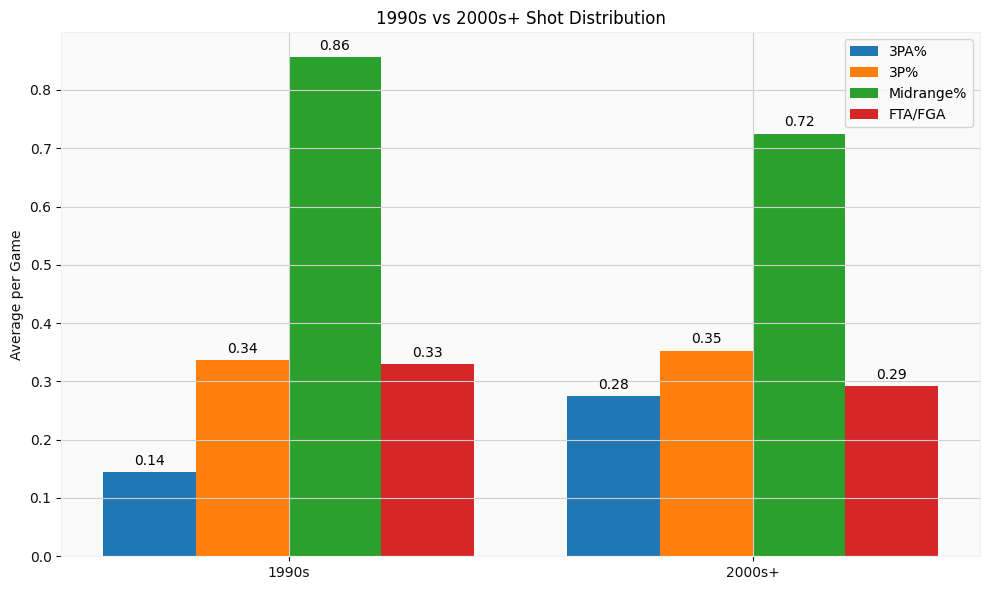

,era_group,Avg 3PA%,Avg 3P%,Avg Midrange%,Avg FTA/FGA
0,1990s,0.144,0.336,0.856,0.330
1,2000s+,0.275,0.353,0.725,0.292


In [48]:
# --- Shot Distribution Metrics ---
team_statistics_filtered['threePointAttemptRate'] = (
    team_statistics_filtered['threePointersAttempted'] / team_statistics_filtered['fieldGoalsAttempted']
)

team_statistics_filtered['threePointPercentage'] = (
    team_statistics_filtered['threePointersMade'] / team_statistics_filtered['threePointersAttempted']
)

team_statistics_filtered['midrangeFrequency'] = (
    (team_statistics_filtered['fieldGoalsAttempted'] - team_statistics_filtered['threePointersAttempted']) /
    team_statistics_filtered['fieldGoalsAttempted']
)

team_statistics_filtered['freeThrowRate'] = (
    team_statistics_filtered['freeThrowsAttempted'] / team_statistics_filtered['fieldGoalsAttempted']
)

# --- Era Grouping: 1990s vs 2000s+ ---
era_group_df = team_statistics_filtered.copy()
era_group_df['era_group'] = era_group_df['year'].apply(
    lambda y: '1990s' if 1990 <= y <= 1999 else '2000s+'
)

# --- Aggregate averages by era ---
era_shot_summary = era_group_df.groupby('era_group')[[
    'threePointAttemptRate',
    'threePointPercentage',
    'midrangeFrequency',
    'freeThrowRate'
]].mean().round(3).reset_index()

labels = era_shot_summary['era_group']
threePA_rate = era_shot_summary['threePointAttemptRate']
threeP_pct = era_shot_summary['threePointPercentage']
midrange = era_shot_summary['midrangeFrequency']
fta_rate = era_shot_summary['freeThrowRate']

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 1.5*width, threePA_rate, width, label='3PA%')
rects2 = ax.bar(x - 0.5*width, threeP_pct, width, label='3P%')
rects3 = ax.bar(x + 0.5*width, midrange, width, label='Midrange%')
rects4 = ax.bar(x + 1.5*width, fta_rate, width, label='FTA/FGA')

ax.set_ylabel('Average per Game')
ax.set_title('1990s vs 2000s+ Shot Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

era_shot_summary.rename(columns={
    'threePointAttemptRate': 'Avg 3PA%',
    'threePointPercentage': 'Avg 3P%',
    'midrangeFrequency': 'Avg Midrange%',
    'freeThrowRate': 'Avg FTA/FGA'
}, inplace=True)

era_shot_summary


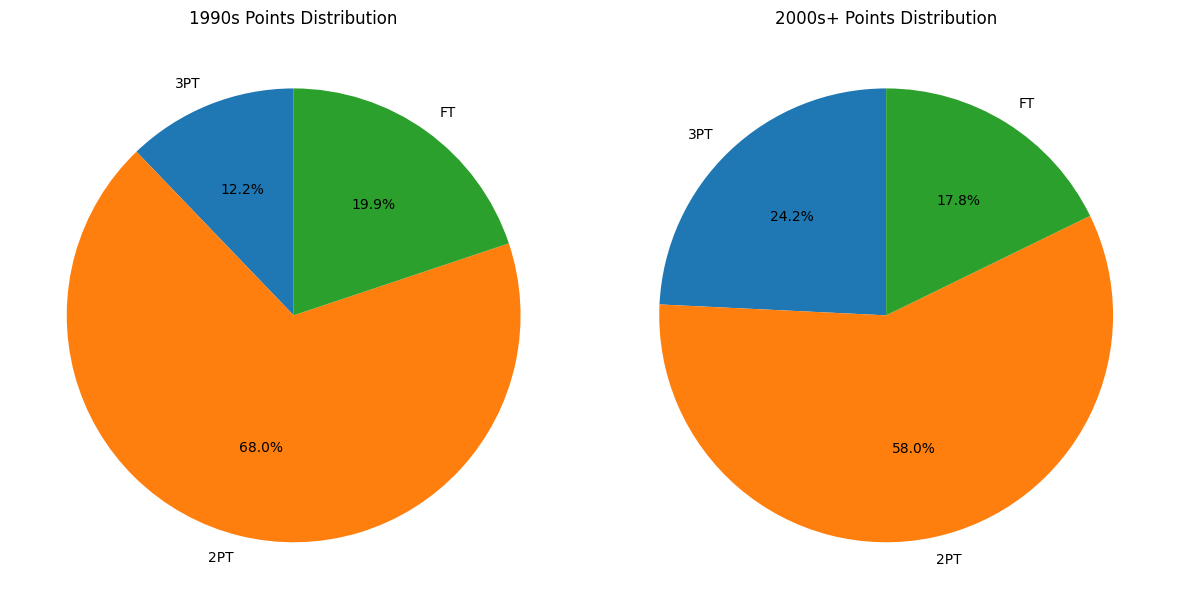

In [49]:
era_points = team_statistics_filtered.groupby('era_group').agg({
    'fieldGoalsMade': 'sum',
    'threePointersMade': 'sum',
    'freeThrowsMade': 'sum'
}).reset_index()

# Calculate 2-pointers made
era_points['twoPointersMade'] = era_points['fieldGoalsMade'] - era_points['threePointersMade']

# Calculate scoring breakdown
era_points['points_3pt'] = era_points['threePointersMade'] * 3
era_points['points_2pt'] = era_points['twoPointersMade'] * 2
era_points['points_ft']  = era_points['freeThrowsMade'] * 1

eras = era_points['era_group']
fig, axes = plt.subplots(1, len(eras), figsize=(12,6))

for i, era in enumerate(eras):
    sizes = [
        era_points.loc[i, 'points_3pt'],
        era_points.loc[i, 'points_2pt'],
        era_points.loc[i, 'points_ft']
    ]
    labels = ['3PT', '2PT', 'FT']
    axes[i].pie(
        sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=['#1f77b4','#ff7f0e','#2ca02c']
    )
    axes[i].set_title(f'{era} Points Distribution')

plt.tight_layout()
plt.show()

## Shot Distribution: 1990 - 2025

### 3PA% (Share of shots from 3)
- 1990s: \(14.4\%\)  
- 2000s+: \(27.5\%\)  
- **Conclusion:** Teams more than doubled their reliance on the 3-point shot.  

### 3P% (Accuracy from 3)
- 1990s: \(33.6\%\)  
- 2000s+: \(35.3\%\)  
- **Conclusion:** Accuracy improved slightly, but the main change comes from increased volume.  

### Midrange% (Share of midrange shots)
- 1990s: \(85.6\%\)  
- 2000s+: \(72.5\%\)  
- **Conclusion:** Clear decline in midrange usage, replaced by threes and shots closer to the rim.  

### FTA/FGA (Free throw rate)
- 1990s: \(0.33\)  
- 2000s+: \(0.292\)  
- **Conclusion:** Fewer free throws per attempt, reflecting a less physical and more perimeter-oriented game.  

---

## Overall
The 2000s+ era marked the **start of the modern perimeter game**:  
- Three-point attempts increased substantially.  
- Midrange attempts declined.  
- Efficiency gains came from smarter shot selection rather than big jumps in accuracy.  


### 3 point evolution

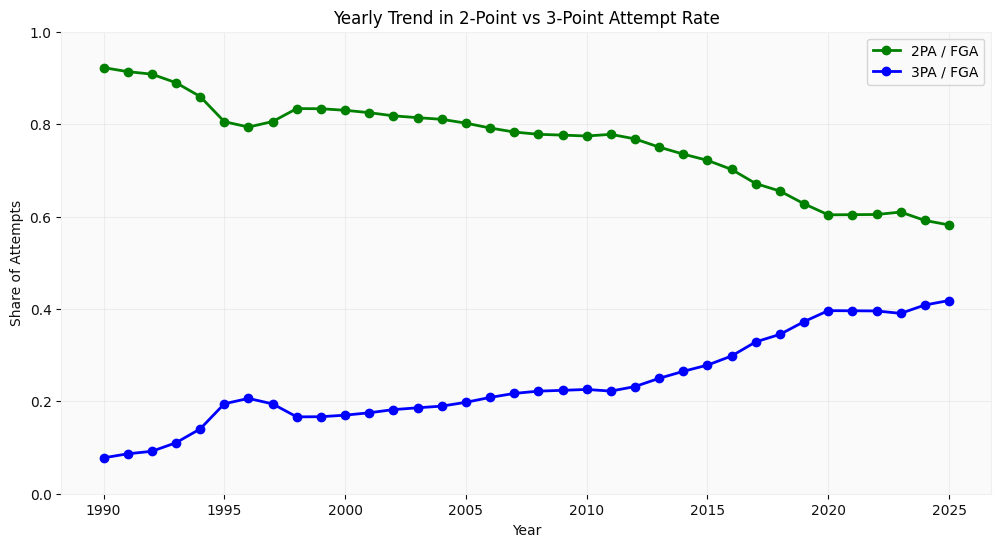

In [50]:
# Compute yearly 2PA and 3PA rates
yearly_rates = team_statistics_filtered.copy()
yearly_rates['twoPointersAttempted'] = yearly_rates['fieldGoalsAttempted'] - yearly_rates['threePointersAttempted']

yearly_rates = yearly_rates.groupby('year').agg(
    total_2PA=('twoPointersAttempted', 'sum'),
    total_3PA=('threePointersAttempted', 'sum'),
    total_FGA=('fieldGoalsAttempted', 'sum')
).reset_index()

# Rates
yearly_rates['twoPA_rate'] = yearly_rates['total_2PA'] / yearly_rates['total_FGA']
yearly_rates['threePA_rate'] = yearly_rates['total_3PA'] / yearly_rates['total_FGA']

# Plot both
plt.figure(figsize=(12,6))
plt.plot(yearly_rates['year'], yearly_rates['twoPA_rate'], marker='o', linewidth=2, color='green', label='2PA / FGA')
plt.plot(yearly_rates['year'], yearly_rates['threePA_rate'], marker='o', linewidth=2, color='blue', label='3PA / FGA')

plt.title("Yearly Trend in 2-Point vs 3-Point Attempt Rate")
plt.xlabel("Year")
plt.ylabel("Share of Attempts")
plt.ylim(0, 1.0)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### 2 point evolution

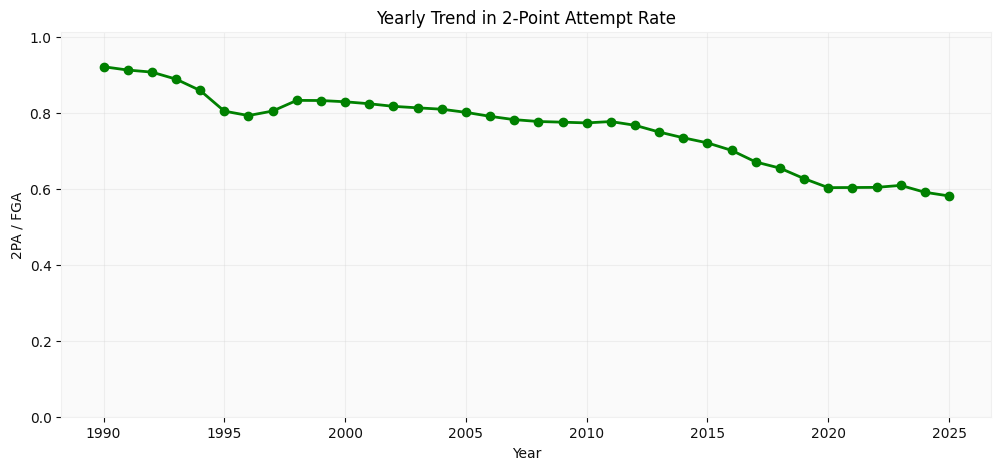

In [51]:
yearly_2pa = team_statistics_filtered.copy()
yearly_2pa['twoPointersAttempted'] = yearly_2pa['fieldGoalsAttempted'] - yearly_2pa['threePointersAttempted']

yearly_2pa = yearly_2pa.groupby('year').agg(
    total_2PA=('twoPointersAttempted', 'sum'),
    total_FGA=('fieldGoalsAttempted', 'sum')
).reset_index()

# Compute rate
yearly_2pa['twoPA_rate'] = yearly_2pa['total_2PA'] / yearly_2pa['total_FGA']

plt.figure(figsize=(12,5))
plt.plot(yearly_2pa['year'], yearly_2pa['twoPA_rate'], marker='o', linewidth=2, color='green')
plt.title("Yearly Trend in 2-Point Attempt Rate")
plt.xlabel("Year")
plt.ylabel("2PA / FGA")
plt.ylim(0, yearly_2pa['twoPA_rate'].max() * 1.1)  
plt.grid(alpha=0.3)
plt.show()


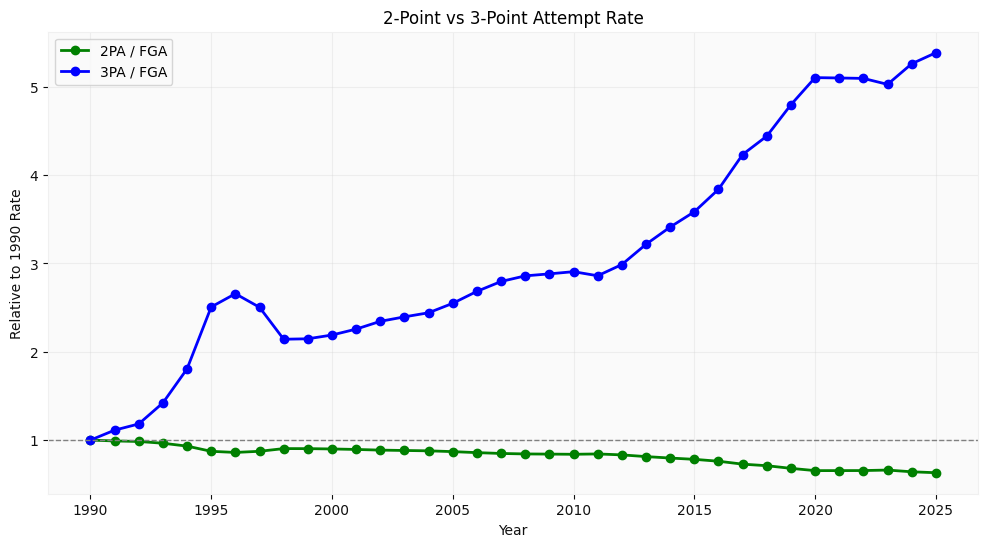

In [52]:
# Normalize both rates to 1990 as base
start_year = yearly_rates['year'].min()
baseline_2PA = yearly_rates.loc[yearly_rates['year'] == start_year, 'twoPA_rate'].values[0]
baseline_3PA = yearly_rates.loc[yearly_rates['year'] == start_year, 'threePA_rate'].values[0]

yearly_rates['twoPA_norm'] = yearly_rates['twoPA_rate'] / baseline_2PA
yearly_rates['threePA_norm'] = yearly_rates['threePA_rate'] / baseline_3PA

# Plot stock-style comparison
plt.figure(figsize=(12,6))
plt.plot(yearly_rates['year'], yearly_rates['twoPA_norm'], marker='o', linewidth=2, color='green', label='2PA / FGA')
plt.plot(yearly_rates['year'], yearly_rates['threePA_norm'], marker='o', linewidth=2, color='blue', label='3PA / FGA')

plt.title("2-Point vs 3-Point Attempt Rate")
plt.xlabel("Year")
plt.ylabel("Relative to 1990 Rate")
plt.axhline(1, color='gray', linestyle='--', linewidth=1)  
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [53]:
# Compute total FGA and separate into 2PT and 3PT per era
era_shot_dist = team_statistics_filtered.groupby('era').agg(
    total_FGA=('fieldGoalsAttempted','sum'),
    threePA=('threePointersAttempted','sum')
).reset_index()

era_shot_dist['twoPA'] = era_shot_dist['total_FGA'] - era_shot_dist['threePA']

# Convert to proportions
era_shot_dist['threePA_rate'] = era_shot_dist['threePA'] / era_shot_dist['total_FGA']
era_shot_dist['twoPA_rate']   = era_shot_dist['twoPA'] / era_shot_dist['total_FGA']

era_shot_dist


,era,total_FGA,threePA,twoPA,threePA_rate,twoPA_rate
0,1990s,1936794.0,275446.0,1661348.0,0.142217,0.857783
1,2000s,2176045.0,431093.0,1744952.0,0.198108,0.801892
2,2010s,2311787.0,656482.0,1655305.0,0.283972,0.716028
3,2020s,1314199.0,525388.0,788811.0,0.399778,0.600222


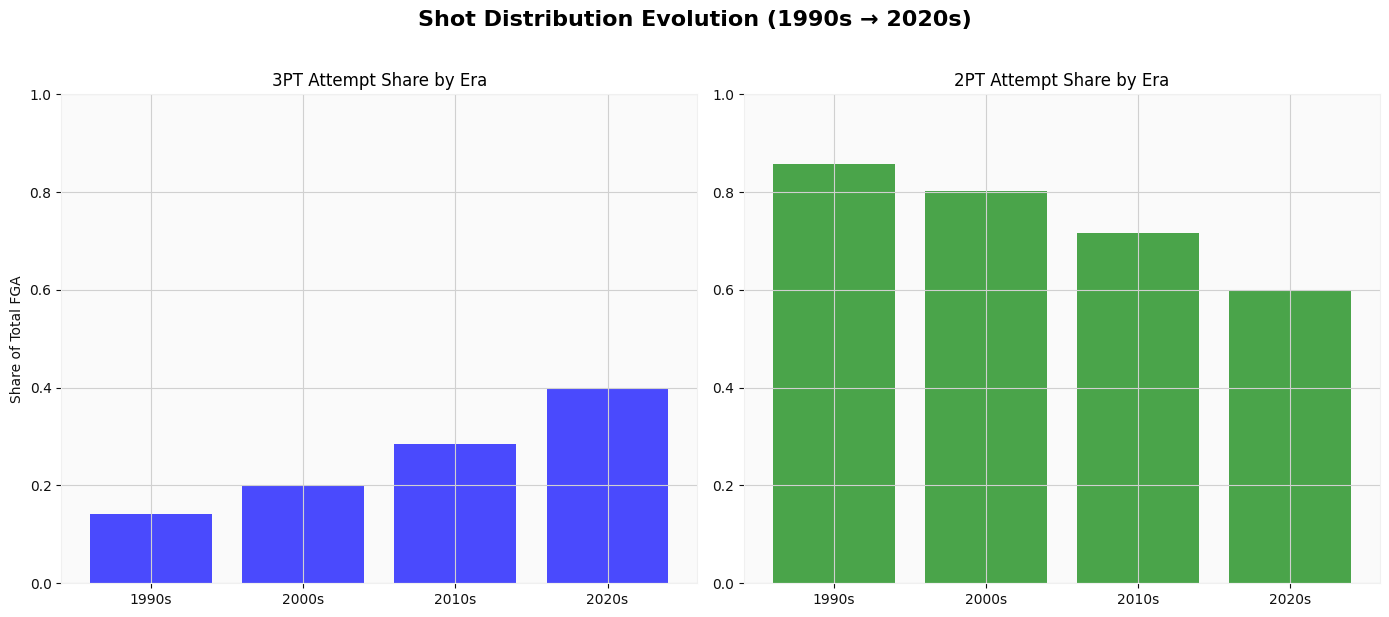

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

#  3PT share
axes[0].bar(era_shot_dist['era'], era_shot_dist['threePA_rate'], color='blue', alpha=0.7)
axes[0].set_title("3PT Attempt Share by Era")
axes[0].set_ylabel("Share of Total FGA")
axes[0].set_ylim(0,1)

# 2PT share 
axes[1].bar(era_shot_dist['era'], era_shot_dist['twoPA_rate'], color='green', alpha=0.7)
axes[1].set_title("2PT Attempt Share by Era")
axes[1].set_ylim(0,1)

plt.suptitle("Shot Distribution Evolution (1990s → 2020s)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


The `draw_court` function uses **matplotlib patches** (`Circle`, `Rectangle`, `Arc`) to draw NBA half-court geometry:

- **Hoop & Backboard** – circle at `(0,0)` and small rectangle behind it.  
- **Paint (key)** – outer and inner rectangles + free-throw arcs.  
- **Restricted area** – half-circle under the basket.  
- **Three-point line** – arc from ~22°–158° plus two corner lines.  
- **Center court arcs** – outer and inner circles at midcourt.  
- **Optional outer boundary** – full rectangle if `outer_lines=True`.  

This ensures accurate court proportions for shot charts (threes outside arc, twos inside, corners respected).


In [55]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                restricted, corner_three_a, corner_three_b, three_arc,
                center_outer_arc, center_inner_arc]

    if outer_lines:
        elements.append(Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False))

    for e in elements:
        ax.add_patch(e)

    return ax


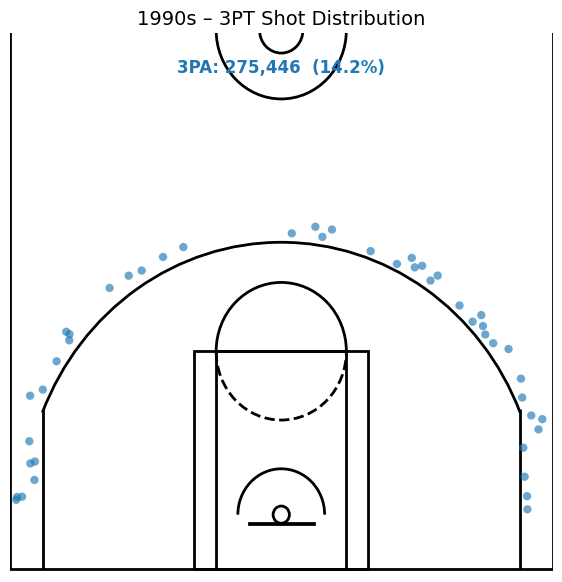

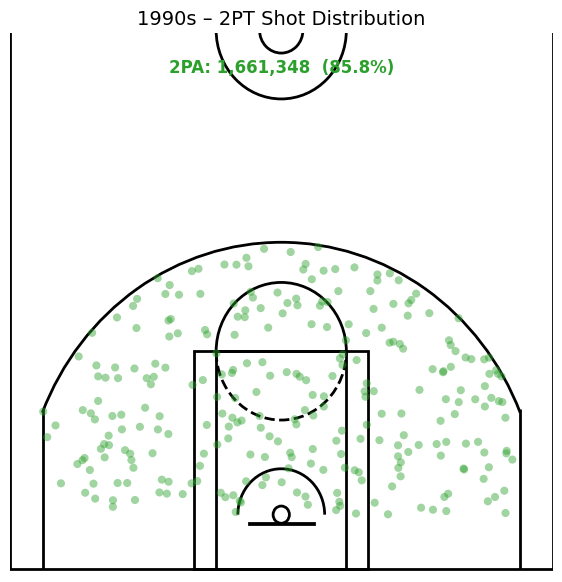

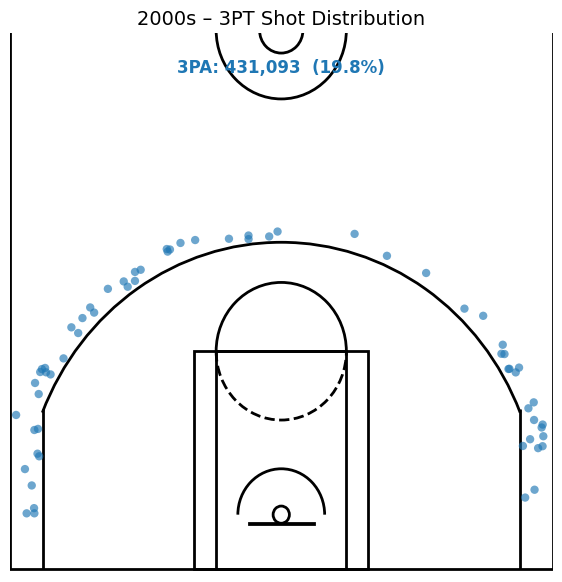

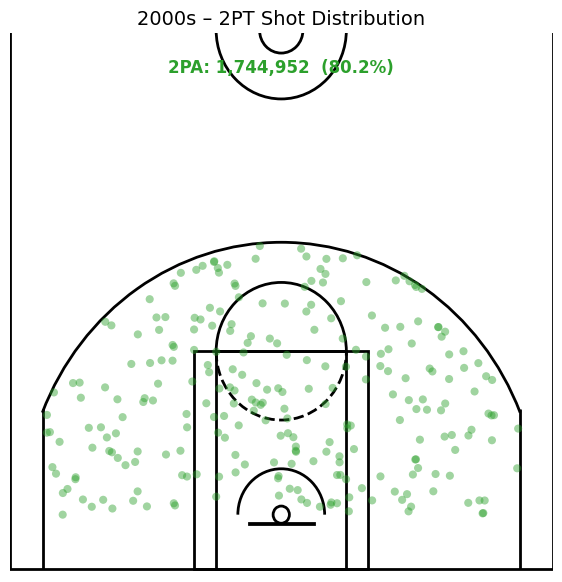

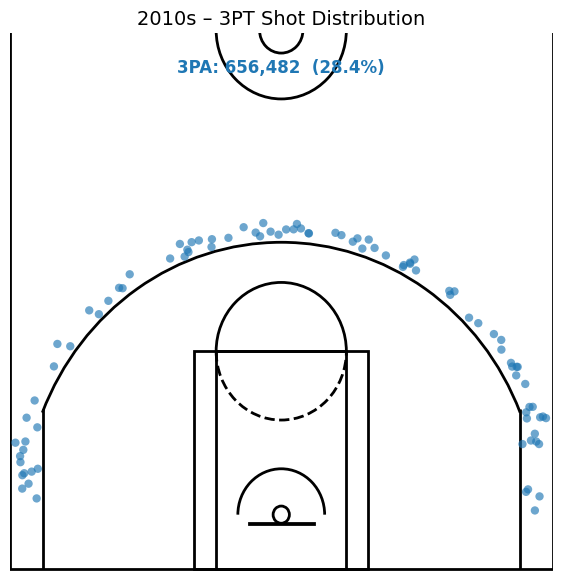

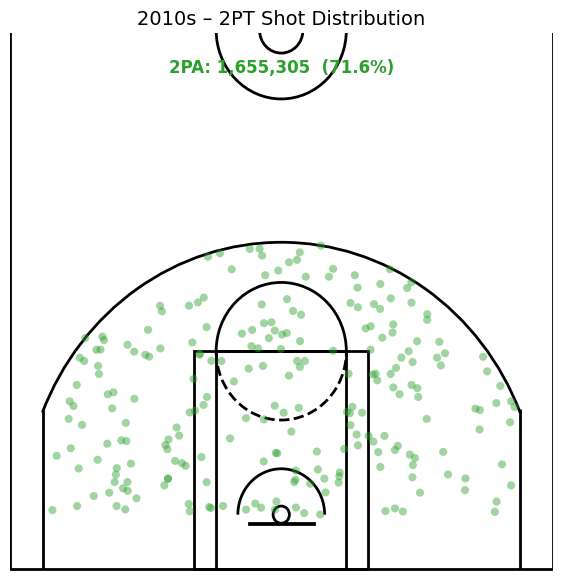

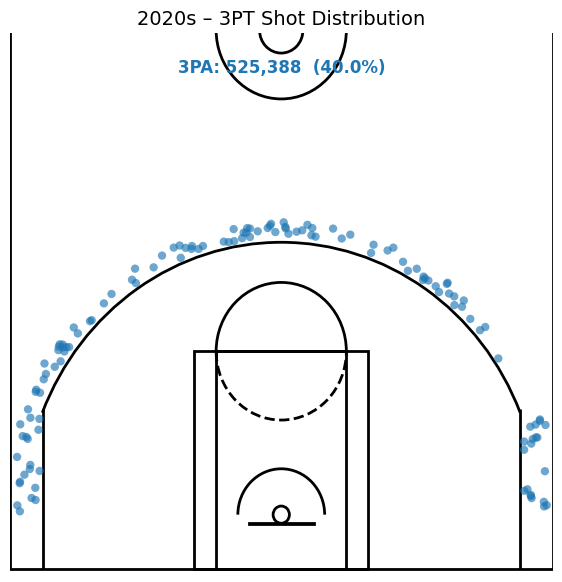

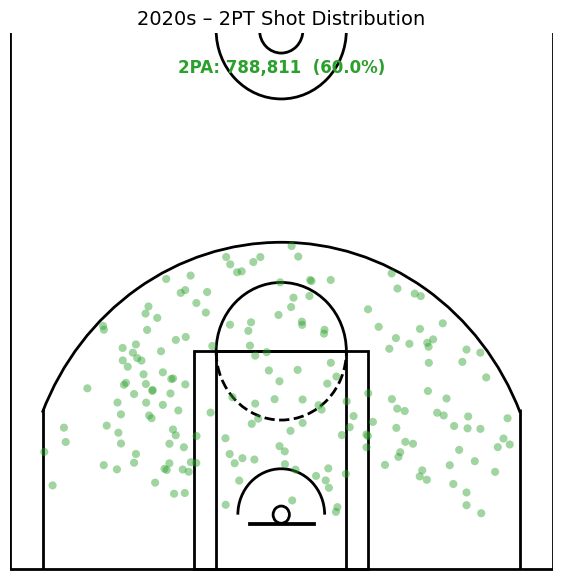

In [56]:
R_ARC = 237.5  # 3PT arc radius (matches your three_arc)
CORNER_X = 220
CORNER_Y_MAX = 92.5  # top of corner-3 lines

def sample_above_break_threes(n, r_min=242, r_max=255):
    """Points strictly outside the arc, above the corners (no corner threes)."""
    theta = np.random.uniform(np.deg2rad(22), np.deg2rad(158), n)
    r = np.random.uniform(r_min, r_max, n)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def sample_corner_threes(n):
    """Points in the two corner-3 rectangles: |x| >= 220 and 0 <= y <= 92.5."""
    n_left = n // 2
    n_right = n - n_left
    x_left = np.random.uniform(-245, -CORNER_X - 2, n_left)
    x_right = np.random.uniform(CORNER_X + 2, 245, n_right)
    y_left = np.random.uniform(0, CORNER_Y_MAX, n_left)
    y_right = np.random.uniform(0, CORNER_Y_MAX, n_right)
    x = np.concatenate([x_left, x_right])
    y = np.concatenate([y_left, y_right])
    return x, y

def sample_two_pointers(n, max_iter=100000):
    """
    Points strictly inside the arc (two-pointers), excluding the corner-3 zones:
    distance < R_ARC and NOT (|x| >= 220 and y <= 92.5). y >= 0 (frontcourt).
    """
    xs, ys = [], []
    tries = 0
    while len(xs) < n and tries < max_iter:
        x = np.random.uniform(-R_ARC, R_ARC)
        y = np.random.uniform(0, 420)
        inside_arc = (x*x + y*y) <= (R_ARC * R_ARC)
        corner_three_zone = (abs(x) >= CORNER_X) and (y <= CORNER_Y_MAX)
        if inside_arc and (not corner_three_zone):
            xs.append(x); ys.append(y)
        tries += 1
    return np.array(xs), np.array(ys)

#  Aggregate shot distribution by era (1990s, 2000s, 2010s, 2020s) 
era_shot_dist = team_statistics_filtered.groupby('era').agg(
    total_FGA=('fieldGoalsAttempted','sum'),
    threePA=('threePointersAttempted','sum')
).reset_index()

era_shot_dist['twoPA'] = era_shot_dist['total_FGA'] - era_shot_dist['threePA']
era_shot_dist['threePA_rate'] = era_shot_dist['threePA'] / era_shot_dist['total_FGA']
era_shot_dist['twoPA_rate']   = era_shot_dist['twoPA']   / era_shot_dist['total_FGA']

#  One-era-at-a-time plotting: first 3PT, then 2PT 
def plot_era_on_court(era, N_markers=300, corner_share_est=0.30):
    """
    N_markers controls the number of dots to draw (for readability).
    corner_share_est splits 3PT markers between corners and above-the-break.
    """
    row = era_shot_dist.loc[era_shot_dist['era'] == era].iloc[0]
    three_share = float(row['threePA_rate'])
    two_share   = float(row['twoPA_rate'])
    three_cnt   = int(row['threePA'])
    two_cnt     = int(row['twoPA'])

    # --- 3PT FIRST ---
    n3 = max(20, int(N_markers * three_share))
    n3_corner = int(n3 * corner_share_est)
    n3_above  = n3 - n3_corner

    x3_ab, y3_ab = sample_above_break_threes(n3_above)
    x3_co, y3_co = sample_corner_threes(n3_corner)

    plt.figure(figsize=(7, 7))
    ax = plt.gca()
    draw_court(ax, outer_lines=True)
    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 420)
    ax.axis('off')
    ax.set_title(f"{era} – 3PT Shot Distribution", fontsize=14)

    ax.scatter(x3_ab, y3_ab, c='tab:blue', alpha=0.65, s=36, edgecolors='none')
    ax.scatter(x3_co, y3_co, c='tab:blue', alpha=0.65, s=36, edgecolors='none')

    ax.text(0, 390, f"3PA: {three_cnt:,}  ({three_share:.1%})",
            ha='center', va='center', fontsize=12, color='tab:blue', weight='bold')
    plt.show()

    # --- 2PT NEXT ---
    n2 = max(20, int(N_markers * two_share))
    x2, y2 = sample_two_pointers(n2)

    plt.figure(figsize=(7, 7))
    ax = plt.gca()
    draw_court(ax, outer_lines=True)
    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 420)
    ax.axis('off')
    ax.set_title(f"{era} – 2PT Shot Distribution", fontsize=14)

    ax.scatter(x2, y2, c='tab:green', alpha=0.45, s=34, edgecolors='none')

    ax.text(0, 390, f"2PA: {two_cnt:,}  ({two_share:.1%})",
            ha='center', va='center', fontsize=12, color='tab:green', weight='bold')
    plt.show()

#  Run for each era, one by one (3PT then 2PT) 
for era in ["1990s", "2000s", "2010s", "2020s"]:
    plot_era_on_court(era, N_markers=320, corner_share_est=0.32)

### Scoring Contribution by Position per Decade

We compute the share of team points contributed by each position (Guard, Forward, Center) for every decade from the 1990s onward. 

Let:

$$
S_{\text{pos}, d} = \frac{\text{PTS}_{\text{pos}, d}}{\text{PTS}_{\text{team}, d}}
$$

Where:  
- $S_{\text{pos}, d}$ = share of points from a given position in decade $d$  
- $\text{PTS}_{\text{pos}, d}$ = total points scored by all players of that position in decade $d$  
- $\text{PTS}_{\text{team}, d}$ = total points scored by all players in that decade  

This allows us to compare which positions contributed most to scoring across decades.


In [57]:
print(players_data.columns)


Index(['personId', 'firstName', 'lastName', 'birthdate', 'lastAttended',
       'country', 'height', 'bodyWeight', 'guard', 'forward', 'center',
       'draftYear', 'draftRound', 'draftNumber'],
      dtype='object')


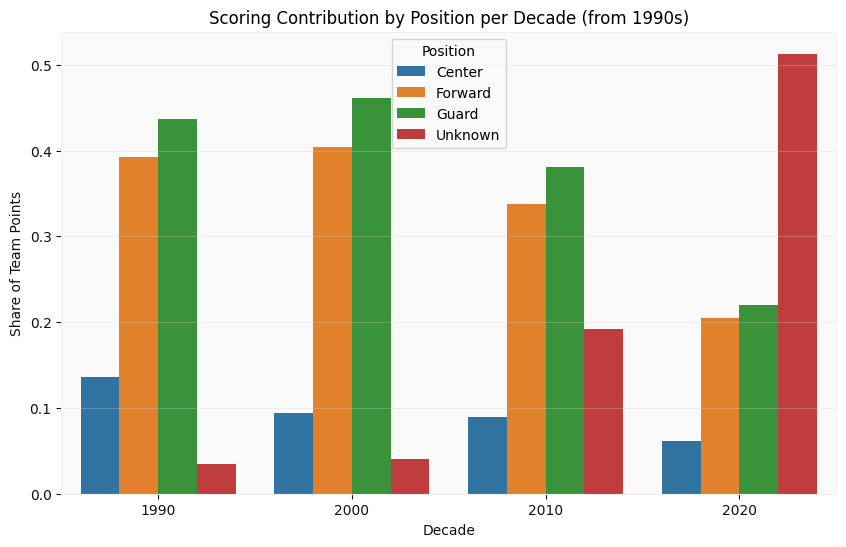

In [58]:
def to_bool(val):
    if pd.isna(val):
        return False
    val_str = str(val).strip().lower()
    return val_str in ['true', '1']

for col in ['guard', 'forward', 'center']:
    if col in players_data.columns:
        players_data[col] = players_data[col].apply(to_bool)
    else:
        players_data[col] = False

def assign_position(row):
    if row['guard']:
        return 'Guard'
    elif row['forward']:
        return 'Forward'
    elif row['center']:
        return 'Center'
    return 'Unknown'

players_data['position'] = players_data.apply(assign_position, axis=1)

#  Merge stats + positions
stats = players_statistics.merge(
    players_data[['personId','position']], 
    on='personId', how='left'
)

stats['points'] = pd.to_numeric(stats['points'], errors='coerce')


stats['gameDate'] = pd.to_datetime(stats['gameDate'], errors='coerce')
stats['year'] = stats['gameDate'].dt.year
stats = stats[stats['year'] >= 1990]  # filter from 1990 onwards
stats['decade'] = (stats['year'] // 10) * 10

decade_points = stats.groupby(['decade','position'])['points'].sum().reset_index()

# Total points per decade
total_points_decade = stats.groupby('decade')['points'].sum().reset_index().rename(columns={'points':'total_points'})

# Merge and calculate shares
decade_points = decade_points.merge(total_points_decade, on='decade')
decade_points['share'] = decade_points['points'] / decade_points['total_points']

plt.figure(figsize=(10,6))
sns.barplot(data=decade_points, x='decade', y='share', hue='position')
plt.ylabel("Share of Team Points")
plt.xlabel("Decade")
plt.title("Scoring Contribution by Position per Decade (from 1990s)")
plt.legend(title='Position')
plt.grid(alpha=0.3, axis='y')
plt.show()

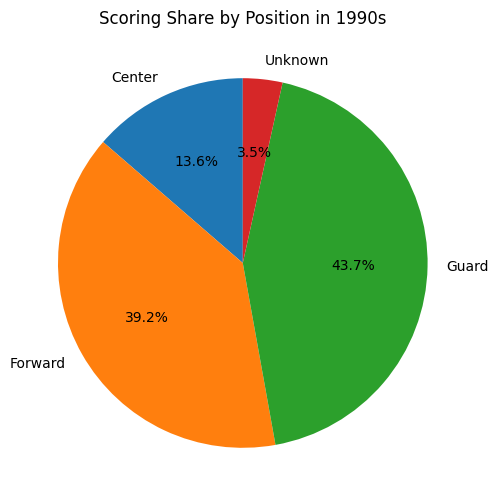

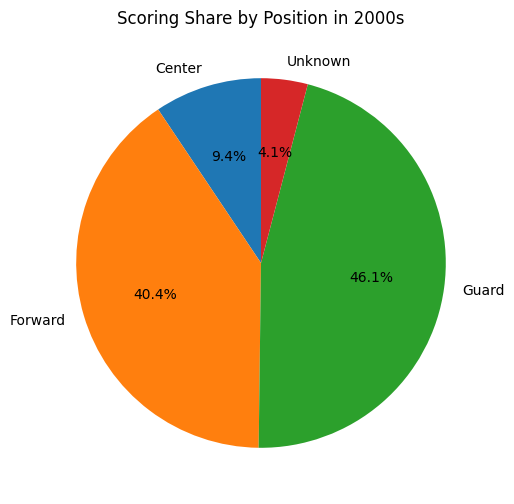

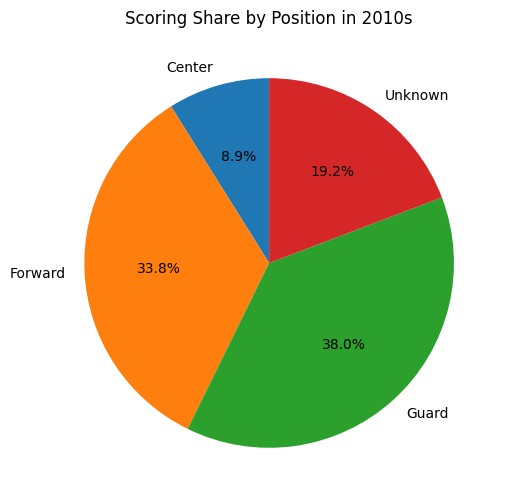

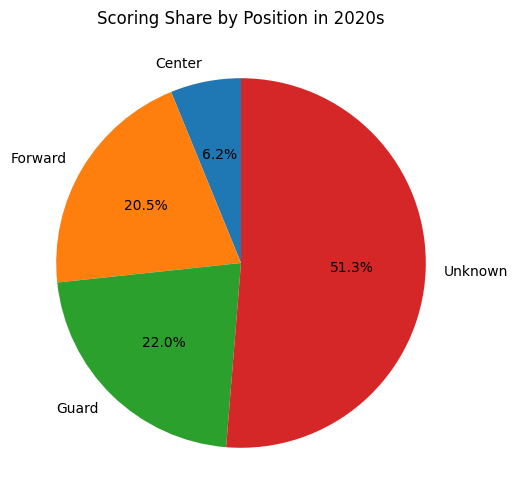

In [59]:
stats = players_statistics.merge(
    players_data[['personId','position']], 
    on='personId', how='left'
)
stats['points'] = pd.to_numeric(stats['points'], errors='coerce')
stats['gameDate'] = pd.to_datetime(stats['gameDate'])
stats['year'] = stats['gameDate'].dt.year
stats = stats[stats['year'] >= 1990]  # Filter from 1990 onwards
stats['decade'] = (stats['year'] // 10) * 10

decade_points = stats.groupby(['decade','position'])['points'].sum().reset_index()
total_points_decade = stats.groupby('decade')['points'].sum().reset_index().rename(columns={'points':'total_points'})
decade_points = decade_points.merge(total_points_decade, on='decade')
decade_points['share'] = decade_points['points'] / decade_points['total_points']

for decade in decade_points['decade'].unique():
    subset = decade_points[decade_points['decade'] == decade]
    plt.figure(figsize=(6,6))
    plt.pie(subset['share'], labels=subset['position'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Scoring Share by Position in {decade}s')
    plt.show()



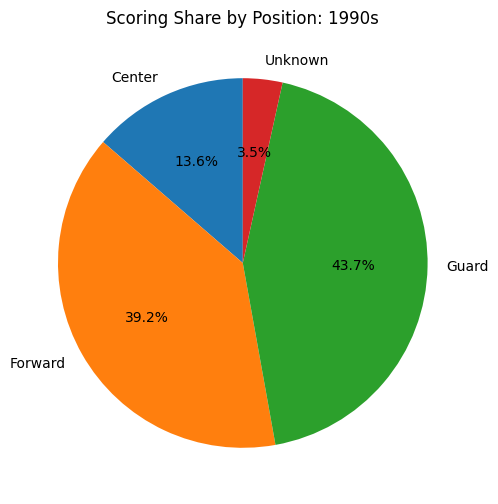

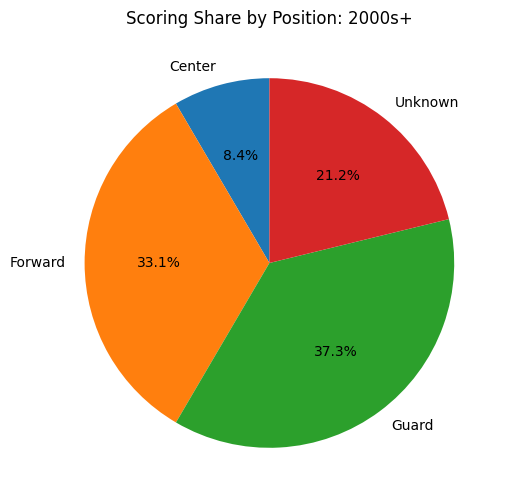

In [60]:
# Combine 1990s vs 2000s+ for comparison
stats['era'] = stats['year'].apply(lambda x: '1990s' if x < 2000 else '2000s+')
era_points = stats.groupby(['era','position'])['points'].sum().reset_index()
total_points_era = stats.groupby('era')['points'].sum().reset_index().rename(columns={'points':'total_points'})
era_points = era_points.merge(total_points_era, on='era')
era_points['share'] = era_points['points'] / era_points['total_points']

for era in era_points['era'].unique():
    subset = era_points[era_points['era'] == era]
    plt.figure(figsize=(6,6))
    plt.pie(subset['share'], labels=subset['position'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Scoring Share by Position: {era}')
    plt.show()

# 4. Playstyle & Possession Usage

### (a) Average Height & Weight by Position

$$
\text{Height}_{pos, t} = \frac{1}{N_{pos,t}} \sum_{i=1}^{N_{pos,t}} \text{Height}_{i}
$$

$$
\text{Weight}_{pos, t} = \frac{1}{N_{pos,t}} \sum_{i=1}^{N_{pos,t}} \text{Weight}_{i}
$$

Where:  
- $pos$ = player position (PG, SG, SF, PF, C)  
- $t$ = season / year / era  
- $N_{pos,t}$ = number of players at that position in the season  



### Determining Player Positions

The dataset contains boolean columns indicating whether a player is a **Guard**, **Forward**, or **Center** (`True`/`False`).  
Since there is no single `position` column, we create a new **categorical `position` column** by combining these flags:

- If `guard == True`, position = "Guard"  
- Else if `forward == True`, position = "Forward"  
- Else if `center == True`, position = "Center"  
- Else, position = "Unknown"  

This allows us to have a **single, easy-to-use position column** for analysis and visualization.


### Determining How Far Back to Include Players

To capture all players who **played in the 1990s**, we need to include players drafted **a few years before 1990**, since they could still be active.  

A reasonable approach:

- Include players drafted **up to ~10 years before 1990** (`draft_year >= 1980`).  
- This range covers typical career lengths, ensuring we capture veterans still playing in the early 1990s.  

> This prevents missing experienced players while avoiding including very early retirees who never played in the 1990s.


In [61]:
def to_bool(val):
    if pd.isna(val):
        return False  # Treat missing as False
    val_str = str(val).strip().lower()
    if val_str in ['true', '1']:
        return True
    return False  # Everything else treated as False

for col in ['guard', 'forward', 'center']:
    if col in players_data.columns:
        players_data[col] = players_data[col].apply(to_bool)
    else:
        players_data[col] = False  # create if missing

# Assign position
players_data['position'] = players_data.apply(assign_position, axis=1)

for col in ['height', 'bodyWeight']:
    if col in players_data.columns:
        players_data[col] = pd.to_numeric(players_data[col], errors='coerce')

# Remove obviously wrong weights
if 'bodyWeight' in players_data.columns:
    players_data.loc[players_data['bodyWeight'] < 50, 'bodyWeight'] = pd.NA

# Filter players drafted up to 10 years before 1990
if 'draft_year' in players_data.columns:
    players_90s_plus = players_data.loc[players_data['draftYear'] >= 1980].copy()
else:
    players_90s_plus = players_data.copy()

print(players_90s_plus[['firstName','lastName','guard','forward','center','position','draftYear']].head(20))

   firstName      lastName  guard  forward  center position draftYear
0      Byron         Scott   True    False   False    Guard    1983.0
1      Grant          Long  False    False   False  Unknown    1988.0
2        Dan       Schayes  False    False    True   Center    1981.0
3     Sedale       Threatt   True    False   False    Guard    1983.0
4      Chris          King  False     True   False  Forward    1992.0
5       Eric    Piatkowski   True     True   False    Guard    1994.0
6      Clyde       Drexler   True    False   False    Guard    1983.0
7       Greg       Anthony   True    False   False    Guard    1991.0
8        Rik         Smits  False    False    True   Center    1988.0
9     Dennis        Rodman  False     True   False  Forward    1986.0
10     Keith      Jennings   True    False   False    Guard      -1.0
11       Luc       Longley  False    False    True   Center    1991.0
12      Doug          West   True    False   False    Guard    1989.0
13       Jim     McI

In [62]:
# Convert to numeric safely
players_data['bodyWeight'] = pd.to_numeric(players_data['bodyWeight'], errors='coerce')

max_weight = 415  # Maximum plausible NBA weight
min_weight = 50   # Minimum plausible NBA weight

# 1. Values above max_weight are set to NA
players_data.loc[players_data['bodyWeight'] > max_weight, 'bodyWeight'] = pd.NA

# 2. Likely mistyped values (e.g., 1570) corrected by dividing by 10 if in a reasonable range
players_data.loc[(players_data['bodyWeight'] > 500) & (players_data['bodyWeight'] <= 5000),
                 'bodyWeight'] = players_data['bodyWeight'] // 10

# 3. Values below min_weight set to NA
players_data.loc[players_data['bodyWeight'] < min_weight, 'bodyWeight'] = pd.NA

# Preview cleaned weights
print(players_data[['firstName', 'lastName', 'bodyWeight']].sort_values(
    'bodyWeight', ascending=False).head(20))


      firstName    lastName  bodyWeight
232        Sean       Rooks       399.0
231      Reggie      Miller       397.0
223        Tony       Smith       380.0
4915        Sim     Bhullar       360.0
212      Chucky       Brown       359.0
199         Joe        Wolf       341.0
356      Thomas    Hamilton       330.0
193        Rick      Mahorn       328.0
236   Shaquille      O'Neal       325.0
515      Priest  Lauderdale       325.0
483      Oliver      Miller       315.0
186        Vern     Fleming       313.0
5548      Tacko        Fall       311.0
1017        Yao        Ming       310.0
4285     Nikola     Pekovic       307.0
937       Garth      Joseph       306.0
183       Steve      Colter       306.0
1128      James        Lang       305.0
4418     Garret       Siler       305.0
27     Gheorghe     Muresan       303.0


### Converting Body Weight to Metric Units

To make the `bodyWeight` data more intuitive for European audiences:

- Convert from **pounds (lbs)** to **kilograms (kg)**:  

$$
\text{bodyWeight (kg)} = \text{bodyWeight (lbs)} \times 0.453592
$$

- Apply this after cleaning anomalies to ensure only plausible weights are converted.  
- This gives a consistent metric representation suitable for reports or visualization.

In [63]:
# Ensure numeric conversion
players_data['height_in'] = pd.to_numeric(players_data['height'], errors='coerce')   # already inches
players_data['height_cm'] = players_data['height_in'] * 2.54                         # convert to cm

players_data['bodyWeight_lbs'] = pd.to_numeric(players_data['bodyWeight'], errors='coerce')  # lbs
players_data['bodyWeight_kg'] = (players_data['bodyWeight_lbs'] * 0.453592).round(1)         # convert to kg

# Convert inches to feet'inches format
def inches_to_feet_inches(inches):
    if pd.isna(inches):
        return None
    feet = int(inches // 12)
    inch = int(round(inches % 12))
    return f"{feet}'{inch}"

players_data['height_feet_inches'] = players_data['height_in'].apply(inches_to_feet_inches)

players_data[['firstName','lastName','height_in','height_cm',
                    'height_feet_inches','bodyWeight_lbs','bodyWeight_kg']].head(20)


,firstName,lastName,height_in,height_cm,height_feet_inches,bodyWeight_lbs,bodyWeight_kg
0,Byron,Scott,76.0,193.04,6'4,205.0,93.0
1,Grant,Long,81.0,205.74,6'9,NaN,NaN
2,Dan,Schayes,83.0,210.82,6'11,260.0,117.9
3,Sedale,Threatt,74.0,187.96,6'2,185.0,83.9
4,Chris,King,80.0,203.20,6'8,215.0,97.5
5,Eric,Piatkowski,79.0,200.66,6'7,215.0,97.5
6,Clyde,Drexler,79.0,200.66,6'7,222.0,100.7
7,Greg,Anthony,73.0,185.42,6'1,180.0,81.6
8,Rik,Smits,88.0,223.52,7'4,265.0,120.2
9,Dennis,Rodman,79.0,200.66,6'7,210.0,95.3


In [64]:
# Average height and weight by position
avg_size_by_position = players_data.groupby('position').agg(
    avg_height_cm=('height_cm', 'mean'),
    avg_weight_kg=('bodyWeight_kg', 'mean'),
    count=('personId', 'count')
).reset_index()


print(avg_size_by_position)


  position  avg_height_cm  avg_weight_kg  count
0   Center     210.084304     109.742617    675
1  Forward     201.872499      99.892635   1919
2    Guard     190.908937      86.904057   1983
3  Unknown     197.057818      97.363636   1956


### Evolution of Height/Weight Ratio by Position (1990s → Now), where we take players drafted after 1985

We want to understand how the **height-to-weight ratio** of basketball players has evolved over time, broken down by player position (Guard, Forward, Center).

The **height-to-weight ratio** is defined as:

$$
R = \frac{\text{Height (cm)}}{\text{Weight (kg)}}
$$

Where:

- Height (cm) is the player's height converted from inches to centimeters.  
- Weight (kg) is the player's weight converted from pounds to kilograms.  

For each player, we compute \(R\). Then, we group players by **position** and **year** (in 3-year bins from 1990 onwards) to analyze trends:

$$
\text{Average ratio per position per year} = 
\frac{1}{N} \sum_{i=1}^{N} R_i
$$

This lets us see how the body composition of Guards, Forwards, and Centers has changed over the years.


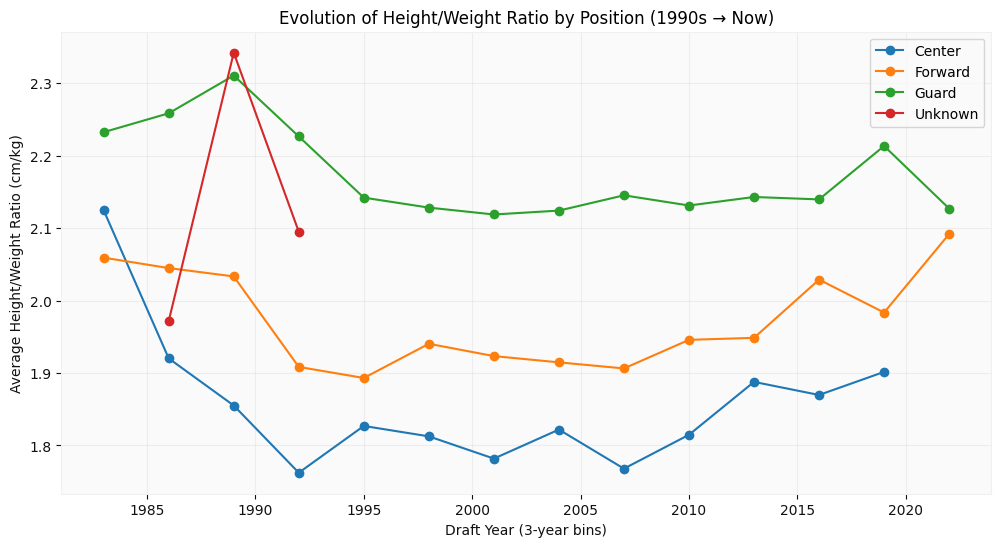

In [65]:
players_data = players_data.copy()

players_data['draftYear'] = pd.to_numeric(players_data['draftYear'], errors='coerce')

players_filtered = players_data[players_data['draftYear'] >= 1985].copy()

# Round draftYear down to nearest 3-year bin
players_filtered['year_bin'] = (players_filtered['draftYear'].astype(int) // 3) * 3

# Compute height/weight ratio
players_filtered['height_weight_ratio'] = players_filtered['height_cm'] / players_filtered['bodyWeight_kg']

# Group by year_bin and position
ratio_by_year = players_filtered.groupby(['year_bin', 'position']).agg(
    avg_ratio=('height_weight_ratio', 'mean'),
    count=('personId', 'count')
).reset_index()

plt.figure(figsize=(12,6))
for pos in ratio_by_year['position'].unique():
    subset = ratio_by_year[ratio_by_year['position'] == pos]
    plt.plot(subset['year_bin'], subset['avg_ratio'], marker='o', label=pos)

plt.title("Evolution of Height/Weight Ratio by Position (1990s → Now)")
plt.xlabel("Draft Year (3-year bins)")
plt.ylabel("Average Height/Weight Ratio (cm/kg)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### (b) Big Men Usage (Centers)

**Post-Scoring Usage:**

$$
U_{\text{post},t} = \frac{\text{2PA}_{\text{paint},t}}{\text{FGA}_{C,t}}
$$

**Stretch-5 Usage:**

$$
U_{\text{stretch},t} = \frac{\text{3PA}_{C,t}}{\text{FGA}_{C,t}}
$$

**Where:**  
- $FGA_{C,t}$ = total field goal attempts by centers in year $t$  
- $2PA_{\text{paint},t}$ = number of 2-point shots by centers taken in the paint in year $t$  
- $3PA_{C,t}$ = number of 3-point attempts by centers in year $t$  


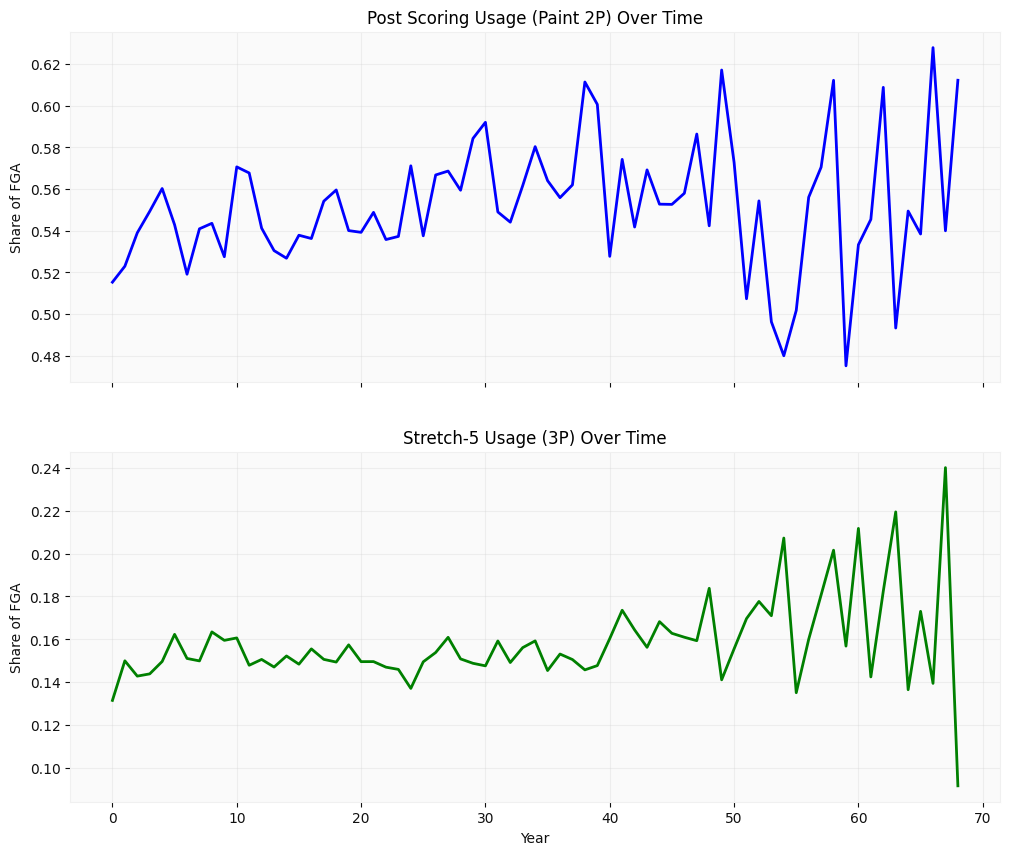

In [66]:
players_data['position'] = players_data.apply(assign_position, axis=1)

centers = players_data[players_data['position'] == 'Center']

# Count centers per team per year (or draftYear as proxy)
center_counts = centers.groupby('draftYear').size().reset_index(name='num_centers')

team_stats = team_statistics_filtered.copy()

# Merge center counts into team stats by year
team_stats = team_stats.merge(center_counts, left_on='seasonWins', right_on='draftYear', how='left') 
team_stats['num_centers'] = team_stats['num_centers'].fillna(1)  # avoid division by zero

team_stats['U_post'] = (team_stats['pointsInThePaint'] / team_stats['num_centers']) / team_stats['fieldGoalsAttempted']
team_stats['U_stretch'] = (team_stats['threePointersMade'] / team_stats['num_centers']) / team_stats['fieldGoalsAttempted']


usage_over_time = team_stats.groupby('seasonWins')[['U_post','U_stretch']].mean().reset_index()  

fig, ax = plt.subplots(2, 1, figsize=(12,10), sharex=True)

# Post scoring usage
ax[0].plot(usage_over_time['seasonWins'], usage_over_time['U_post'], color='blue', linewidth=2)
ax[0].set_title("Post Scoring Usage (Paint 2P) Over Time")
ax[0].set_ylabel("Share of FGA")
ax[0].grid(alpha=0.3)

# Stretch-5 usage
ax[1].plot(usage_over_time['seasonWins'], usage_over_time['U_stretch'], color='green', linewidth=2)
ax[1].set_title("Stretch-5 Usage (3P) Over Time")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Share of FGA")
ax[1].grid(alpha=0.3)

plt.show()



The nearly identical curves for post scoring (2P proxy) and stretch-5 (3P) usage indicate that the current proxy method does **not differentiate well between the two shot types**. This can happen because:

- The number of centers per year is relatively constant.
- 3-point attempts by centers are very low, especially in early decades.
- Aggregating total 2P/3P by FGA over all teams smooths out differences.

**Conclusion:** The proxy is too rough to show meaningful differences in shot distribution for centers over time. Using actual positional shot data would give a clearer picture.


### (c) Guard Scoring Responsibility

**Scoring Share of PGs:**

$$
S_{PG,t} = \frac{\text{PTS}_{PG,t}}{\text{PTS}_{\text{team},t}}
$$

**Scoring Share of SGs:**

$$
S_{SG,t} = \frac{\text{PTS}_{SG,t}}{\text{PTS}_{\text{team},t}}
$$

**Where:**  
- $PTS_{PG,t}$ = points scored by point guards in year $t$  
- $PTS_{SG,t}$ = points scored by shooting guards in year $t$  
- $PTS_{\text{team},t}$ = total team points in year $t$  


The dataset does not explicitly label Point Guards (PG) or Shooting Guards (SG), so we infer them using boolean flags:

- **Point Guard (PG):** Players with `guard = True` and `forward = False`. These are pure guards.
- **Shooting Guard (SG):** Players with `guard = True` and `forward = True`. These are guard/forward combo players.

This approach approximates scoring responsibilities for guards when exact positions are not available.


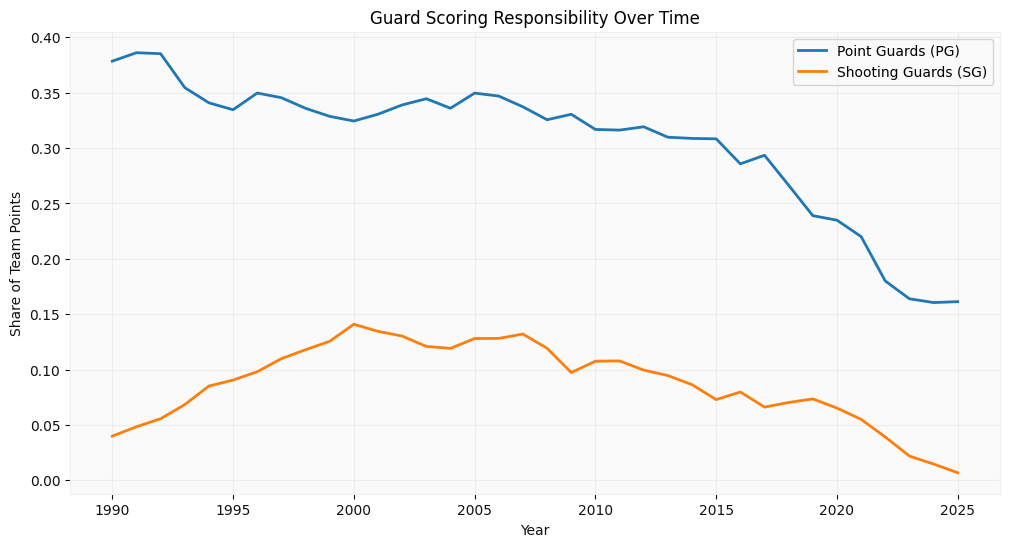

In [67]:
players_statistics['year'] = pd.to_datetime(players_statistics['gameDate']).dt.year

players_statistics['points'] = pd.to_numeric(players_statistics['points'], errors='coerce')

stats_with_pos = players_statistics.merge(
    players_data[['personId', 'guard', 'forward', 'center']], on='personId', how='left'
)

# Distinguish PG vs SG
# Convert columns to boolean (True/False)
for col in ['guard', 'forward', 'center']:
    if col in stats_with_pos.columns:
        stats_with_pos[col] = stats_with_pos[col].fillna(False).astype(bool)

# Now define PG and SG
pg_stats = stats_with_pos[stats_with_pos['guard'] & (~stats_with_pos['forward'])]
sg_stats = stats_with_pos[stats_with_pos['guard'] & stats_with_pos['forward']]

pg_points = pg_stats.groupby('year')['points'].sum().reset_index(name='PTS_PG')
sg_points = sg_stats.groupby('year')['points'].sum().reset_index(name='PTS_SG')

players_statistics['points'] = pd.to_numeric(players_statistics['points'], errors='coerce')
team_points = players_statistics.groupby('year')['points'].sum().reset_index(name='PTS_team')

# Merge all
guard_scoring = pg_points.merge(sg_points, on='year', how='outer')
guard_scoring = guard_scoring.merge(team_points, on='year', how='outer')

for col in ['PTS_PG', 'PTS_SG', 'PTS_team']:
    guard_scoring[col] = pd.to_numeric(guard_scoring[col], errors='coerce')

# Compute scoring shares
guard_scoring['S_PG'] = guard_scoring['PTS_PG'] / guard_scoring['PTS_team']
guard_scoring['S_SG'] = guard_scoring['PTS_SG'] / guard_scoring['PTS_team']

guard_scoring = guard_scoring[guard_scoring['year'] >= 1990]

plt.figure(figsize=(12,6))
plt.plot(guard_scoring['year'], guard_scoring['S_PG'], label='Point Guards (PG)', linewidth=2)
plt.plot(guard_scoring['year'], guard_scoring['S_SG'], label='Shooting Guards (SG)', linewidth=2)
plt.title("Guard Scoring Responsibility Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Team Points")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_19908\3112903534.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_avg = guard_scoring.groupby('period')[['S_PG','S_SG']].mean().reset_index()


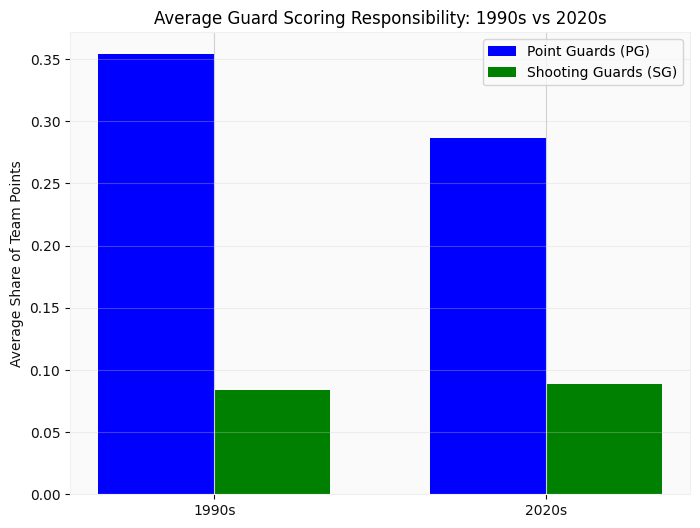

In [68]:
guard_scoring['period'] = pd.cut(
    guard_scoring['year'],
    bins=[1989, 1999, 2025], 
    labels=['1990s', '2020s']
)

# Compute average scoring share by period
period_avg = guard_scoring.groupby('period')[['S_PG','S_SG']].mean().reset_index()

fig, ax = plt.subplots(figsize=(8,6))

x = np.arange(len(period_avg['period']))  # positions
width = 0.35  # bar width

ax.bar(x - width/2, period_avg['S_PG'], width, label='Point Guards (PG)', color='blue')
ax.bar(x + width/2, period_avg['S_SG'], width, label='Shooting Guards (SG)', color='green')

ax.set_xticks(x)
ax.set_xticklabels(period_avg['period'])
ax.set_ylabel("Average Share of Team Points")
ax.set_title("Average Guard Scoring Responsibility: 1990s vs 2020s")
ax.legend()
ax.grid(alpha=0.3, axis='y')

plt.show()


We calculate the share of team points contributed by each position (Guard, Forward, Center) for each decade from the 1990s onward:

- **Guards (G):** S_G,d = PTS_G,d / PTS_team,d  
- **Forwards (F):** S_F,d = PTS_F,d / PTS_team,d  
- **Centers (C):** S_C,d = PTS_C,d / PTS_team,d  

Where:  
- $S_pos,d$ = share of points from a given position in decade d 
- $PTS_pos,d$ = total points scored by all players of that position in decade d  
- $PTS_team,d$ = total points scored by all players in that decade  

This helps visualize which positions were most responsible for scoring in each decade.


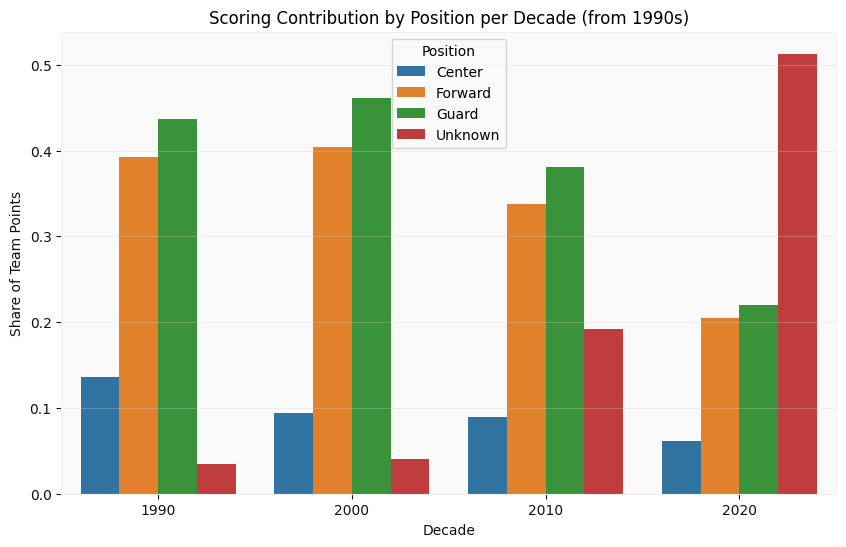

In [69]:
stats = players_statistics.merge(
    players_data[['personId','position']], 
    left_on='personId', right_on='personId', how='left'
)

stats['points'] = pd.to_numeric(stats['points'], errors='coerce')

stats['gameDate'] = pd.to_datetime(stats['gameDate'])
stats['year'] = stats['gameDate'].dt.year
stats = stats[stats['year'] >= 1990]  

# Assign decade
stats['decade'] = (stats['year'] // 10) * 10

decade_points = stats.groupby(['decade','position'])['points'].sum().reset_index()

# Total points per decade
total_points_decade = stats.groupby('decade')['points'].sum().reset_index().rename(columns={'points':'total_points'})

# Merge and compute share
decade_points = decade_points.merge(total_points_decade, on='decade')
decade_points['share'] = decade_points['points'] / decade_points['total_points']

plt.figure(figsize=(10,6))
sns.barplot(data=decade_points, x='decade', y='share', hue='position')
plt.ylabel("Share of Team Points")
plt.xlabel("Decade")
plt.title("Scoring Contribution by Position per Decade (from 1990s)")
plt.legend(title='Position')
plt.grid(alpha=0.3, axis='y')
plt.show()

## Scoring Contribution by Position per Decade (in %)

We compute the share of team points contributed by each position (Guard, Forward, Center) for every decade from the 1990s onward.  

Formula:

$$
S_pos,d = (PTS_pos,d / PTS_team,d) × 100
$$

Where:  
- $S_pos,d$ = **percentage** of points contributed by a given position in decade d  
- $PTS_pos,d$ = total points scored by all players of that position in decade d  
- $PTS_team,d$ = total points scored by all players in that decade  

This provides a clear view of which positions dominate scoring across decades and allows easy comparison of trends in Guard, Forward, and Center contributions over time.


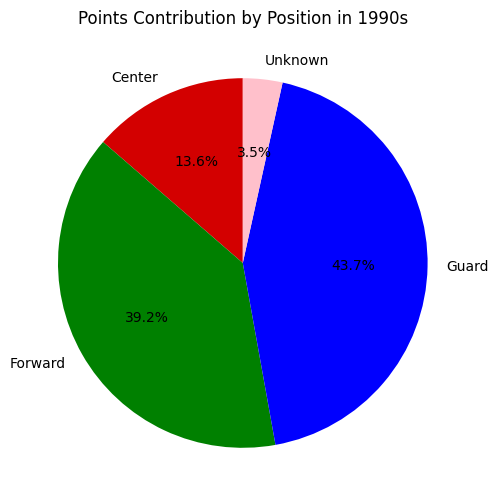

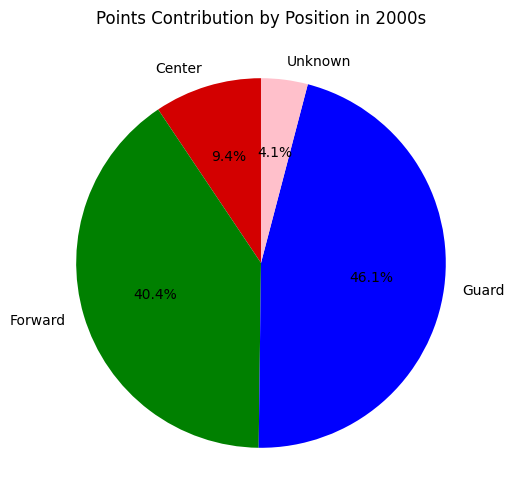

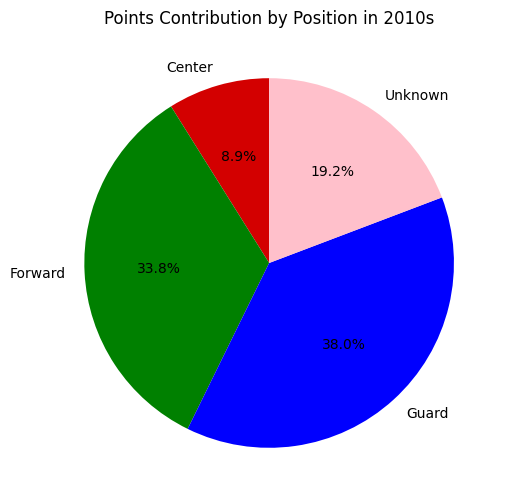

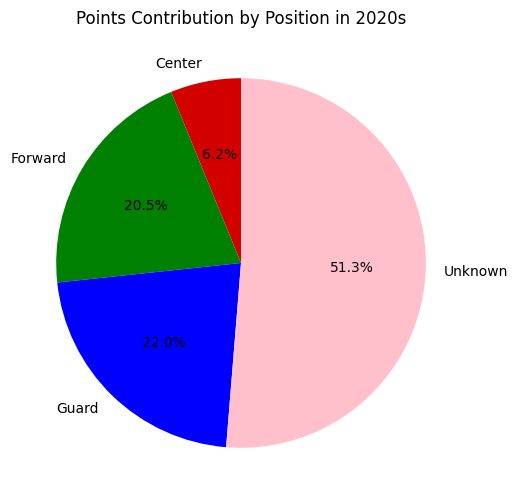

In [70]:
player_stats = players_statistics.merge(players_data[['personId','position']], left_on='personId', right_on='personId', how='left')

# Extract decade from gameDate
player_stats['gameDate'] = pd.to_datetime(player_stats['gameDate'])
player_stats['decade'] = (player_stats['gameDate'].dt.year // 10) * 10

player_stats = player_stats[player_stats['gameDate'].dt.year >= 1990]

points_by_position = player_stats.groupby(['decade', 'position'])['points'].sum().reset_index()

points_pivot = points_by_position.pivot(index='decade', columns='position', values='points').fillna(0)

# Plot pie chart for each decade
for decade in points_pivot.index:
    plt.figure(figsize=(6,6))
    plt.pie(points_pivot.loc[decade], 
            labels=points_pivot.columns, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['#D30000','#008000','#0000FF', '#FFC0CB'])
    plt.title(f'Points Contribution by Position in {decade}s')
    plt.show()


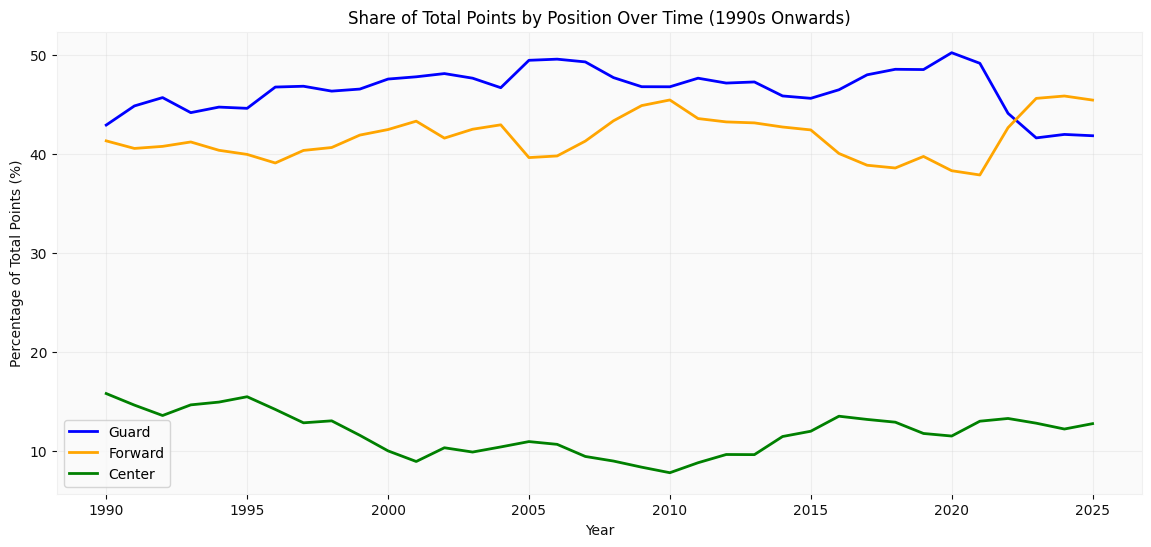

In [71]:
player_stats = players_statistics.merge(
    players_data[['personId','position']], 
    on='personId', how='left'
)

player_stats['gameDate'] = pd.to_datetime(player_stats['gameDate'])
player_stats['year'] = player_stats['gameDate'].dt.year

player_stats = player_stats[player_stats['year'] >= 1990]

# Drop unknown positions
player_stats = player_stats[player_stats['position'] != 'Unknown']

points_by_year = player_stats.groupby(['year', 'position'])['points'].sum().reset_index()

points_pivot = points_by_year.pivot(index='year', columns='position', values='points').fillna(0)

# Calculate total points per year
points_pivot['total'] = points_pivot.sum(axis=1)

# Convert to percentage contribution
for pos in ['Guard', 'Forward', 'Center']:
    points_pivot[pos+'_pct'] = points_pivot[pos] / points_pivot['total'] * 100

plt.figure(figsize=(14,6))
plt.plot(points_pivot.index, points_pivot['Guard_pct'], label='Guard', color='blue', linewidth=2)
plt.plot(points_pivot.index, points_pivot['Forward_pct'], label='Forward', color='orange', linewidth=2)
plt.plot(points_pivot.index, points_pivot['Center_pct'], label='Center', color='green', linewidth=2)
plt.title('Share of Total Points by Position Over Time (1990s Onwards)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Points (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

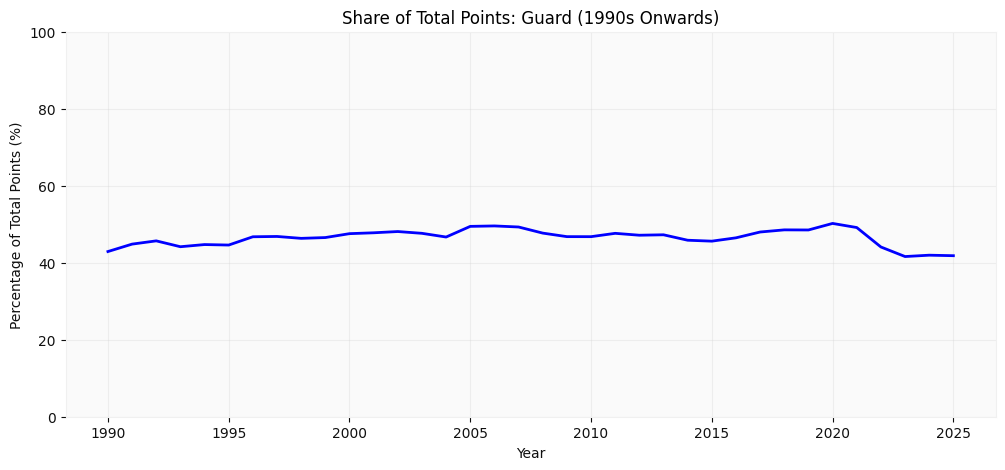

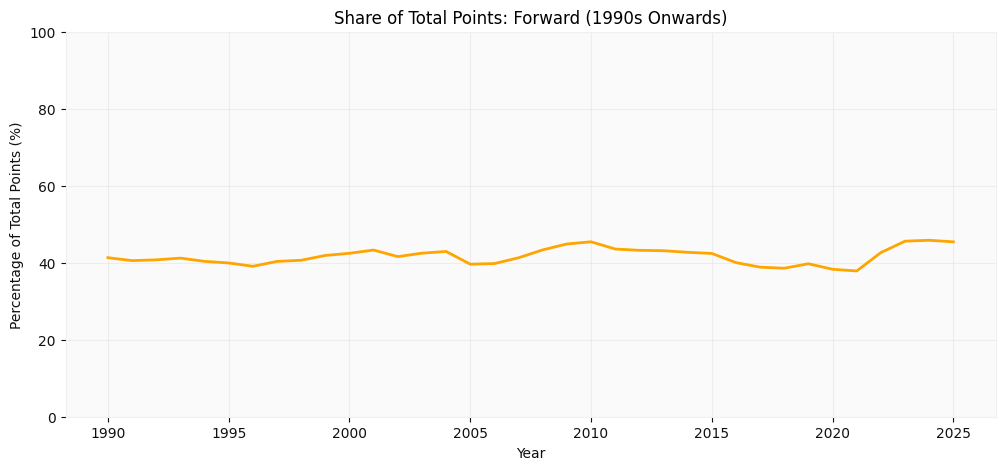

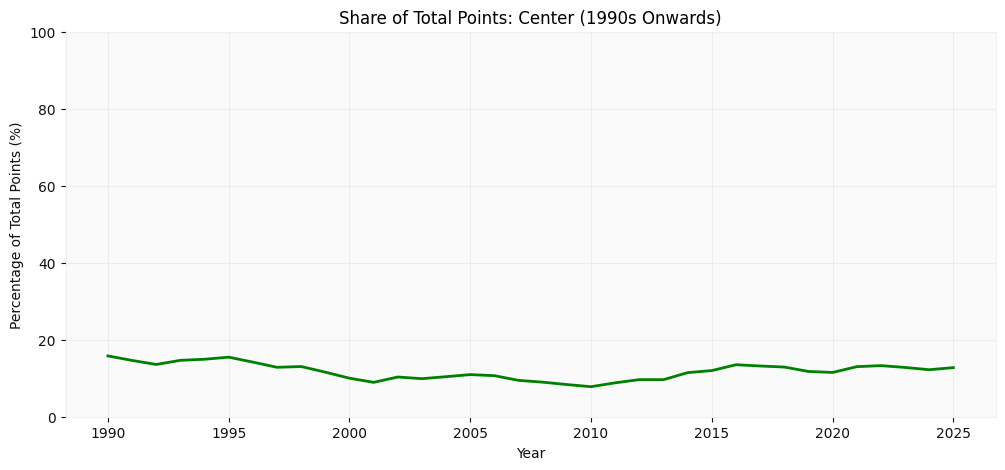

In [72]:
# Merge player stats with positions
player_stats = players_statistics.merge(
    players_data[['personId','position']], 
    on='personId', how='left'
)

player_stats['gameDate'] = pd.to_datetime(player_stats['gameDate'])
player_stats['year'] = player_stats['gameDate'].dt.year

player_stats = player_stats[(player_stats['year'] >= 1990) & (player_stats['position'] != 'Unknown')]

points_by_year = player_stats.groupby(['year', 'position'])['points'].sum().reset_index()

# Pivot to get positions as columns
points_pivot = points_by_year.pivot(index='year', columns='position', values='points').fillna(0)

# Calculate total points per year
points_pivot['total'] = points_pivot.sum(axis=1)

# Convert to percentage contribution
for pos in ['Guard', 'Forward', 'Center']:
    points_pivot[pos+'_pct'] = points_pivot[pos] / points_pivot['total'] * 100

# Plot individual line charts
positions = ['Guard', 'Forward', 'Center']
colors = ['blue', 'orange', 'green']

for i, pos in enumerate(positions):
    plt.figure(figsize=(12,5))
    plt.plot(points_pivot.index, points_pivot[pos+'_pct'], color=colors[i], linewidth=2)
    plt.title(f'Share of Total Points: {pos} (1990s Onwards)')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Total Points (%)')
    plt.ylim(0, 100)
    plt.grid(alpha=0.3)
    plt.show()


# 6. Defense & Physicality

This section examines the evolution of defense and physical play in the NBA from the 1990s onward. We analyze fouls, blocks, and steals per game while considering major rule changes—such as the hand-check ban in 2004, the defensive three-second rule in 2001, and the emphasis on freedom of movement—that reshaped defensive strategies and player behavior. The analysis highlights how the game transitioned from a highly physical, post-focused style to a more perimeter-oriented, spacing-friendly approach.


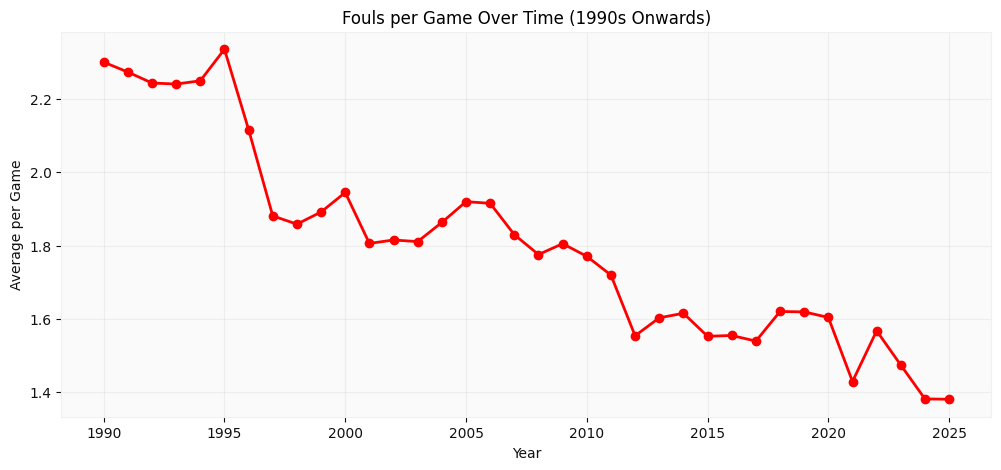

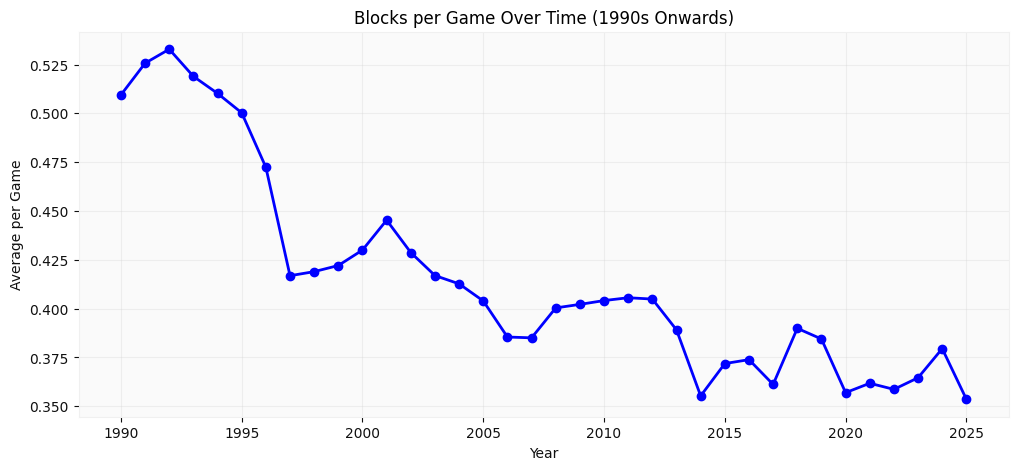

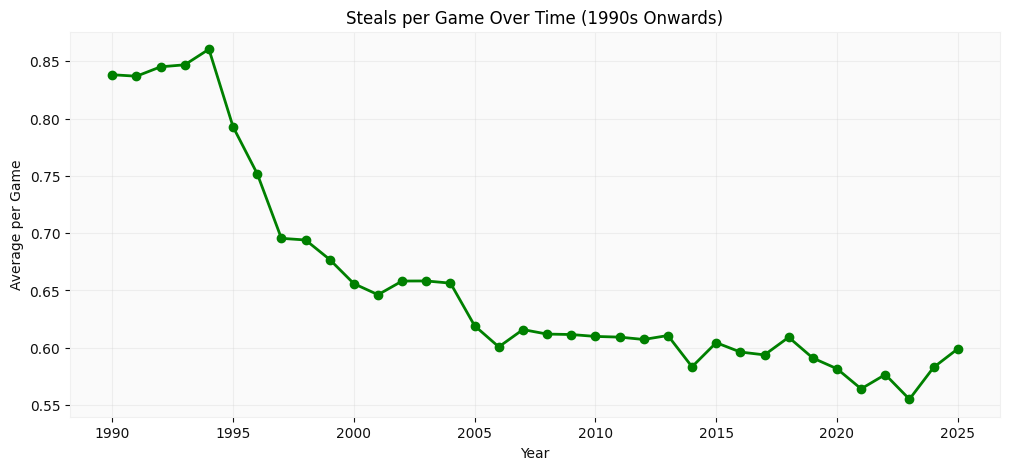

In [73]:
player_defense_stats = players_statistics.copy()

player_defense_stats['gameDate'] = pd.to_datetime(player_defense_stats['gameDate'])
player_defense_stats['year'] = player_defense_stats['gameDate'].dt.year

# Filter from 1990 onwards
defense_stats = player_defense_stats[player_defense_stats['year'] >= 1990].copy()

numeric_cols = ['foulsPersonal', 'blocks', 'steals']
defense_stats[numeric_cols] = defense_stats[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Aggregate average per game per year
defense_over_time = defense_stats.groupby('year')[numeric_cols].mean().reset_index()

# Plot 3 separate diagrams
metrics = {
    'foulsPersonal': ('Fouls per Game', 'red'),
    'blocks': ('Blocks per Game', 'blue'),
    'steals': ('Steals per Game', 'green')
}

for col, (label, color) in metrics.items():
    plt.figure(figsize=(12,5))
    plt.plot(defense_over_time['year'], defense_over_time[col], color=color, linewidth=2, marker='o')
    plt.title(f'{label} Over Time (1990s Onwards)')
    plt.xlabel('Year')
    plt.ylabel('Average per Game')
    plt.grid(alpha=0.3)
    plt.show()


## Defensive Trends in the NBA (1990s–2020s)

### Fouls per Game
$$
\text{Drop from ~2.3 (1990s) to ~1.4 (2025).}
$$  
→ Stricter officiating and rule changes reduced physicality.  

### Blocks per Game
$$
\text{Decline from ~0.53 (1990s) to ~0.36–0.40 (2020s).}
$$  
→ Fewer rim-protection chances due to spacing, 3PT focus, and defensive 3-sec rule.  

### Steals per Game
$$
\text{Fall from ~0.85 (1990s) to ~0.58 (2025).}
$$  
→ Less aggressive perimeter defense; ball movement & spacing reduced passing-lane risks.  

---

### Overall
$$
\text{NBA shifted from physical, defense-heavy (1990s) to skill, spacing, and offense-driven (2020s).}
$$


In [74]:
defense_df = players_statistics.copy()

numeric_cols = ['foulsPersonal', 'blocks', 'steals']
defense_df[numeric_cols] = defense_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

defense_df['year'] = pd.to_datetime(defense_df['gameDate']).dt.year

# Filter from 1990 onwards
defense_df = defense_df[defense_df['year'] >= 1990].copy()

rule_year = 2001
defense_df['period'] = defense_df['year'].apply(lambda x: 'Before Rule' if x < rule_year else 'After Rule')

# Aggregate averages per period
period_stats = defense_df.groupby('period')[numeric_cols].mean().reset_index()

period_stats


,period,foulsPersonal,blocks,steals
0,After Rule,1.655812,0.387176,0.604711
1,Before Rule,2.111932,0.475201,0.766928


## Analysis of Results: Defensive 3-Second Rule Impact

### Fouls per Game
$$
2.11 \;\;\; \rightarrow \;\;\; 1.66
$$  
→ Fouls declined because defenses could no longer **clog the paint with physical play**.  
→ The NBA emphasized **freedom of movement** and penalized excessive contact.  

### Blocks per Game
$$
0.48 \;\;\; \rightarrow \;\;\; 0.39
$$  
→ Rim protection opportunities fell since defenders could not **camp in the lane**.  
→ Offenses increasingly used **spacing and perimeter shooting**, reducing block chances.  

### Steals per Game
$$
0.77 \;\;\; \rightarrow \;\;\; 0.60
$$  
→ Aggressive hand-checking and reach-ins were restricted.  
→ Offenses relied more on **ball movement and 3-point spacing**, leaving fewer risky passes to intercept.  

---

### Overall
$$
\text{The Defensive 3-Second Rule (2001) shifted the NBA from physical, paint-heavy defense}
$$  
$$
\text{toward perimeter-oriented, pace-and-space basketball — lowering fouls, blocks, and steals.}
$$


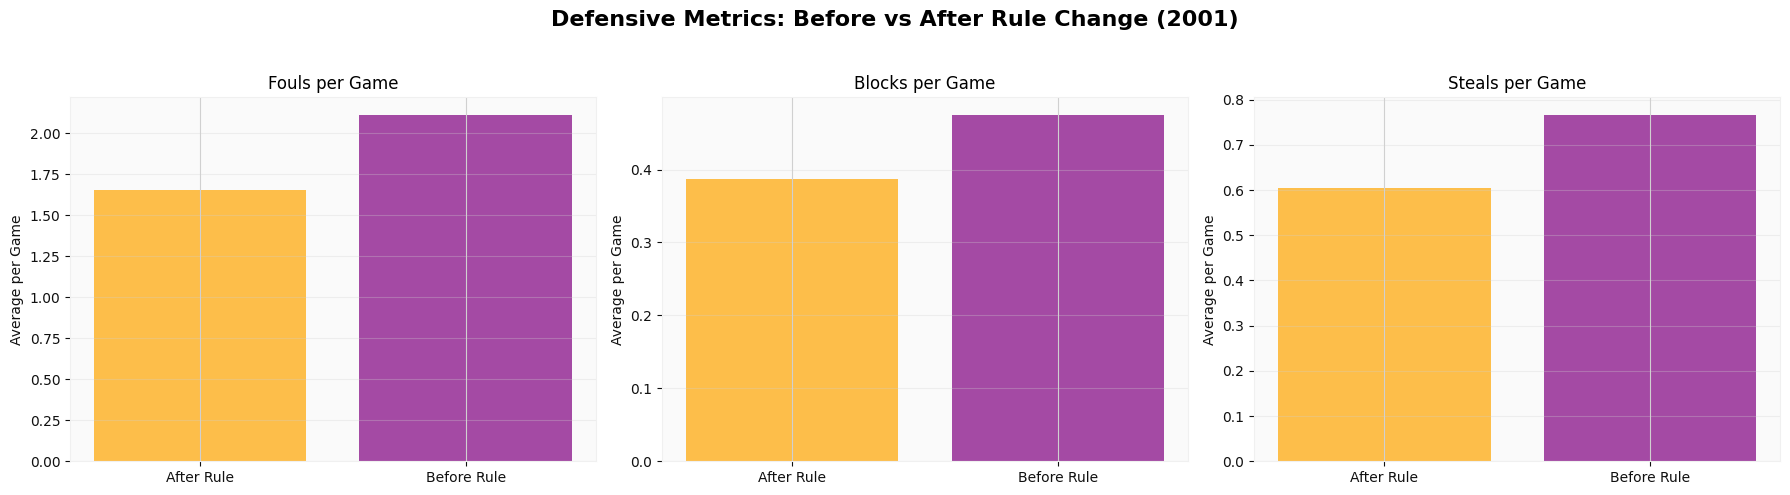

In [75]:
metrics = {
    'foulsPersonal': 'Fouls per Game',
    'blocks': 'Blocks per Game',
    'steals': 'Steals per Game'
}

fig, axes = plt.subplots(1, 3, figsize=(18,5))

colors = ['orange', 'purple']
for i, (col, label) in enumerate(metrics.items()):
    axes[i].bar(period_stats['period'], period_stats[col], color=colors, alpha=0.7)
    axes[i].set_title(label)
    axes[i].set_ylabel('Average per Game')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle(f'Defensive Metrics: Before vs After Rule Change ({rule_year})', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


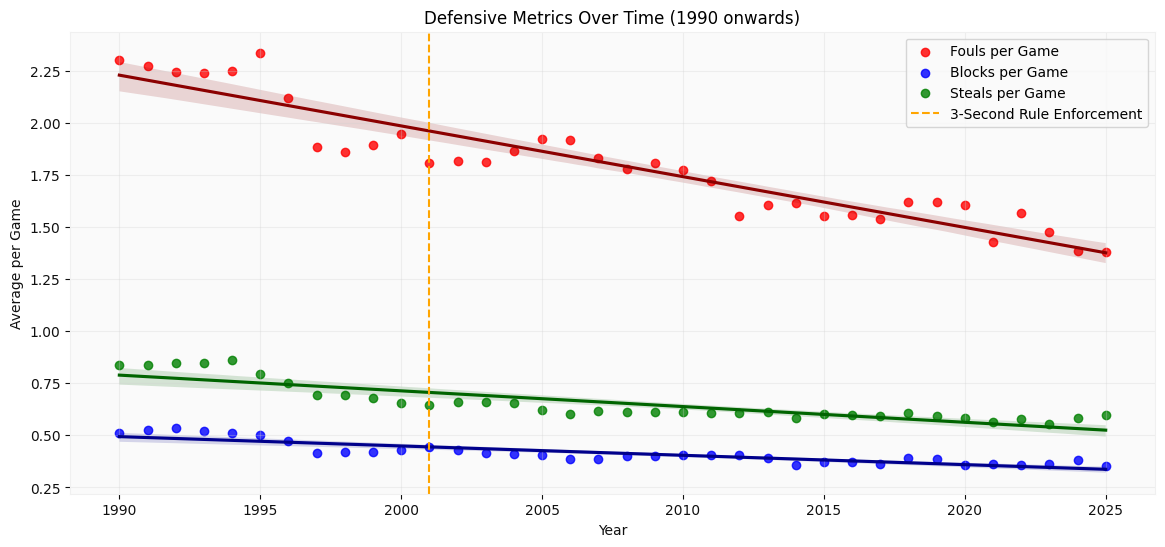

,Before_2001,After_2001
year,1995.000000,2013.000000
foulsPersonal,2.121521,1.661378
blocks,0.477971,0.387821
steals,0.772276,0.606061


In [76]:
plt.figure(figsize=(14,6))
sns.regplot(x='year', y='foulsPersonal', data=defense_over_time, scatter=True, label='Fouls per Game', color='red', line_kws={"color":"darkred"})
sns.regplot(x='year', y='blocks', data=defense_over_time, scatter=True, label='Blocks per Game', color='blue', line_kws={"color":"darkblue"})
sns.regplot(x='year', y='steals', data=defense_over_time, scatter=True, label='Steals per Game', color='green', line_kws={"color":"darkgreen"})
plt.axvline(x=2001, color='orange', linestyle='--', label='3-Second Rule Enforcement')
plt.title('Defensive Metrics Over Time (1990 onwards)')
plt.xlabel('Year')
plt.ylabel('Average per Game')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Before/After comparison
before = defense_over_time[defense_over_time['year'] < 2001].mean()
after = defense_over_time[defense_over_time['year'] >= 2001].mean()

comparison = pd.DataFrame({'Before_2001': before, 'After_2001': after})
comparison

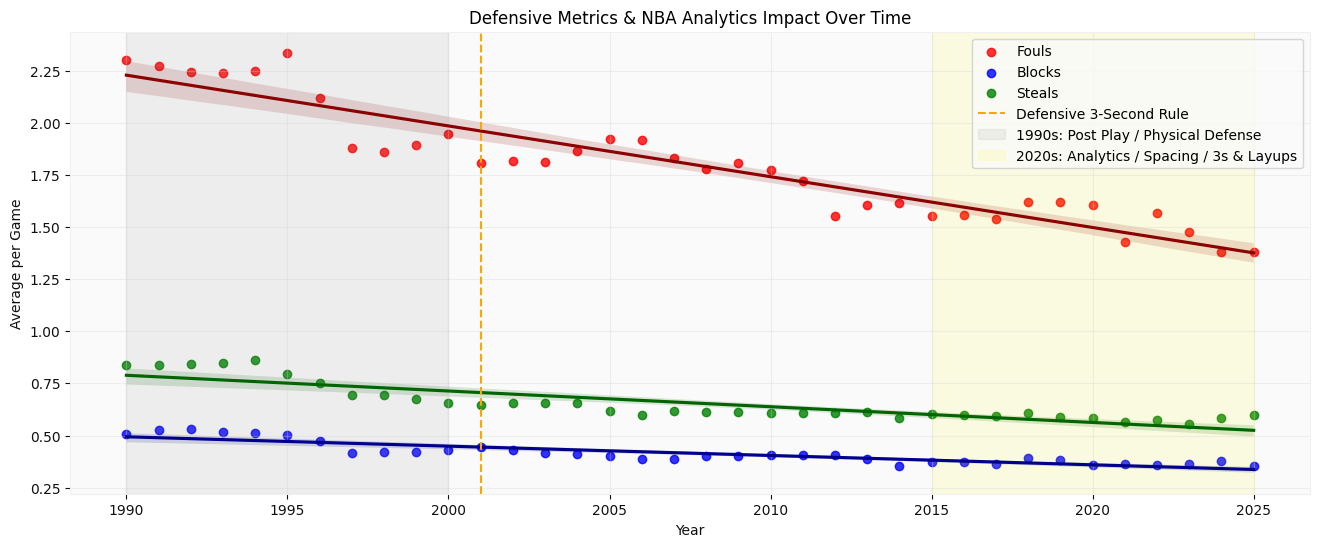

In [77]:
plt.figure(figsize=(16,6))
sns.regplot(x='year', y='foulsPersonal', data=defense_over_time, scatter=True, label='Fouls', color='red', line_kws={"color":"darkred"})
sns.regplot(x='year', y='blocks', data=defense_over_time, scatter=True, label='Blocks', color='blue', line_kws={"color":"darkblue"})
sns.regplot(x='year', y='steals', data=defense_over_time, scatter=True, label='Steals', color='green', line_kws={"color":"darkgreen"})

# Highlight rule enforcement and analytics era
plt.axvline(x=2001, color='orange', linestyle='--', label='Defensive 3-Second Rule')
plt.axvspan(1990, 2000, color='gray', alpha=0.1, label='1990s: Post Play / Physical Defense')
plt.axvspan(2015, 2025, color='yellow', alpha=0.1, label='2020s: Analytics / Spacing / 3s & Layups')

plt.title('Defensive Metrics & NBA Analytics Impact Over Time')
plt.xlabel('Year')
plt.ylabel('Average per Game')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### We want to understand the relationship between **offensive rebounds** and **second chance points**.  
The key questions are:  

- Do more offensive rebounds actually lead to more second chance points?  
- How efficient are teams at converting offensive rebounds into points?  

To answer this, we:  
1. Compute the correlation between `reboundsOffensive` and `pointsSecondChance`.  
2. Define an efficiency metric:  
   $$
   \text{Second Chance Efficiency} =
   \frac{\text{PointsSecondChance}}{\text{ReboundsOffensive}}
   $$  
3. Visualize the relationship with a scatter plot and regression line.  


Correlation: 0.663
count    2750.000000
mean        1.320112
std         0.469143
min         0.000000
25%         1.000000
50%         1.266667
75%         1.571429
max         4.500000
Name: secondChanceEfficiency, dtype: float64


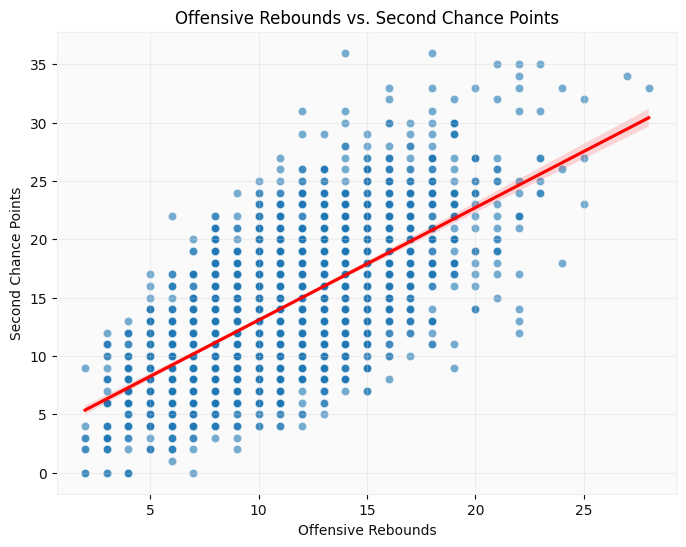

In [78]:
teams_df = team_statistics_filtered.copy()

# Ensure numeric
teams_df['pointsSecondChance'] = pd.to_numeric(
    teams_df['pointsSecondChance'], errors='coerce'
)
teams_df['reboundsOffensive'] = pd.to_numeric(
    teams_df['reboundsOffensive'], errors='coerce'
)

# Drop missing values
teams_df = teams_df.dropna(subset=['pointsSecondChance', 'reboundsOffensive'])

# --- 1. Correlation ---
correlation = teams_df['pointsSecondChance'].corr(teams_df['reboundsOffensive'])
print(f"Correlation: {correlation:.3f}")

# --- 2. Efficiency metric ---
teams_df['secondChanceEfficiency'] = (
    teams_df['pointsSecondChance'] / teams_df['reboundsOffensive']
)
print(teams_df['secondChanceEfficiency'].describe())

# --- 3. Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=teams_df,
    x='reboundsOffensive',
    y='pointsSecondChance',
    alpha=0.6
)
sns.regplot(
    data=teams_df,
    x='reboundsOffensive',
    y='pointsSecondChance',
    scatter=False,
    color='red'
)

plt.title("Offensive Rebounds vs. Second Chance Points")
plt.xlabel("Offensive Rebounds")
plt.ylabel("Second Chance Points")
plt.grid(alpha=0.3)
plt.show()

### We want to measure how **defensive fouling** impacts opponents’ scoring opportunities.  
Both datasets provide relevant information:  

- `player_statistics.foulsPersonal` → individual fouls.  
- `team_statistics.foulsPersonal` → total team fouls in a game.  
- `team_statistics.freeThrowsAttempted` & `freeThrowsMade` → points given up due to fouls.  

### Defensive Metrics to Derive

1. **Opponent Free Throw Rate**  
   $$
   \text{Free Throw Rate} =
   \frac{\text{FreeThrowsAttempted}}{\text{TeamFouls}}
   $$
   → How often a foul leads to a free throw.  

2. **Opponent Free Throw Efficiency**  
   $$
   \text{FT\%} =
   \frac{\text{FreeThrowsMade}}{\text{FreeThrowsAttempted}}
   $$
   → How efficiently opponents convert foul shots.  

3. **Points Allowed per Foul**  
   $$
   \text{Points/Foul} =
   \frac{\text{FreeThrowsMade}}{\text{TeamFouls}}
   $$
   → Direct measure of how costly fouls are defensively.  

4. **Player Contribution to Team Fouls**  
   $$
   \text{Player Share} =
   \frac{\text{PlayerFouls}}{\text{TeamFouls}}
   $$
   → Identifies which players put the team at risk defensively.  

---

These metrics allow us to evaluate:  
- **Team discipline** (fouling frequency).  
- **Defensive efficiency** (how many points fouls give up).  
- **Individual responsibility** for foul trouble. 

In [79]:
# --- 1. Work with team-level data ---
team_stats_copy = team_statistics_filtered.copy()

# Ensure numeric
team_stats_copy['foulsPersonal'] = pd.to_numeric(team_stats_copy['foulsPersonal'], errors='coerce')
team_stats_copy['freeThrowsAttempted'] = pd.to_numeric(team_stats_copy['freeThrowsAttempted'], errors='coerce')
team_stats_copy['freeThrowsMade'] = pd.to_numeric(team_stats_copy['freeThrowsMade'], errors='coerce')

# Ensure correct types for merging
team_stats_copy['gameId'] = team_stats_copy['gameId'].astype(int)
team_stats_copy['teamName'] = team_stats_copy['teamName'].astype(str)

# Defensive efficiency metrics (avoid division by zero)
team_stats_copy['freeThrowRate'] = team_stats_copy.apply(
    lambda row: row['freeThrowsAttempted'] / row['foulsPersonal'] if row['foulsPersonal'] else np.nan,
    axis=1
)
team_stats_copy['freeThrowPct'] = team_stats_copy.apply(
    lambda row: row['freeThrowsMade'] / row['freeThrowsAttempted'] if row['freeThrowsAttempted'] else np.nan,
    axis=1
)
team_stats_copy['pointsPerFoul'] = team_stats_copy.apply(
    lambda row: row['freeThrowsMade'] / row['foulsPersonal'] if row['foulsPersonal'] else np.nan,
    axis=1
)

# --- 2. Work with player-level data ---
player_stats_copy = players_statistics.copy()

# Ensure numeric
player_stats_copy['foulsPersonal'] = pd.to_numeric(player_stats_copy['foulsPersonal'], errors='coerce')
player_stats_copy['gameId'] = player_stats_copy['gameId'].astype(int)
player_stats_copy['playerteamName'] = player_stats_copy['playerteamName'].astype(str)

# Aggregate player fouls by game & team (optional validation)
player_fouls_sum = (
    player_stats_copy.groupby(['gameId', 'playerteamName'])['foulsPersonal']
    .sum()
    .reset_index()
    .rename(columns={'foulsPersonal': 'playerFoulsTotal'})
)

# --- 3. Merge player & team to compute player share of fouls ---
player_team_merged = pd.merge(
    player_stats_copy,
    team_stats_copy[['gameId', 'teamName', 'foulsPersonal']],  # team total fouls
    left_on=['gameId', 'playerteamName'],
    right_on=['gameId', 'teamName'],
    suffixes=('', '_team')
)

# Player share of team fouls (avoid division by zero)
player_team_merged['playerFoulShare'] = player_team_merged.apply(
    lambda row: row['foulsPersonal'] / row['foulsPersonal_team'] if row['foulsPersonal_team'] else np.nan,
    axis=1
)

# --- 4. Final check ---
team_stats_copy[['gameId', 'teamName', 'freeThrowRate', 'freeThrowPct', 'pointsPerFoul']].head()



,gameId,teamName,freeThrowRate,freeThrowPct,pointsPerFoul
gameDate,,,,,
2025-06-22 20:00:00,42400407,Pacers,1.208333,0.758621,0.916667
2025-06-22 20:00:00,42400407,Thunder,1.347826,0.709677,0.956522
2025-06-19 20:30:00,42400406,Pacers,1.470588,0.680000,1.000000
2025-06-19 20:30:00,42400406,Thunder,1.300000,0.807692,1.050000
2025-06-16 20:30:00,42400405,Pacers,1.200000,0.800000,0.960000


In [80]:
player_team_merged[['gameId', 'playerteamName', 'personId', 'foulsPersonal', 'foulsPersonal_team', 'playerFoulShare']].head()

,gameId,playerteamName,personId,foulsPersonal,foulsPersonal_team,playerFoulShare
0,42400407,Pacers,201949,0.0,24.0,0.000000
1,42400407,Pacers,204456,2.0,24.0,0.083333
2,42400407,Pacers,1626167,3.0,24.0,0.125000
3,42400407,Pacers,1627783,2.0,24.0,0.083333
4,42400407,Pacers,1628396,2.0,24.0,0.083333


# Conclusion

The evolution of the NBA from the **1990s to the modern era** reflects not only a shift in playing style but also in the underlying philosophy of the game.  

- **1990s NBA** emphasized physicality, defense, and isolation-heavy offense with dominant post play.  
- **Modern NBA** prioritizes pace, spacing, and efficiency — fueled by analytics and rule changes that encourage three-point shooting and versatile, positionless basketball.  

This transformation is the result of:
- Strategic innovations (e.g., "Moreyball" and pace-and-space systems).  
- Rule adjustments that limited hand-checking and defensive physicality.  
- Changes in player archetypes, where big men now stretch the floor instead of dominating the paint exclusively.  

In summary, the NBA has **transitioned from rugged, iso-heavy basketball to a fast-paced, perimeter-oriented game**. This progression highlights the league’s adaptability to cultural, strategic, and analytical forces — ensuring basketball remains a constantly evolving global sport.  


---

© 2025 **Dimitar Dimov**. All Rights Reserved.  


# #Bonus: Building a Decade Classification Model

To complement our analysis, we developed a **machine learning model** that predicts whether a player belongs to the **1990s NBA** or the **modern era (2000s–2020s)** based on their statistical profile.  

### Methodology
1. **Data Preparation**  
   - We use player-level statistics from the dataset.  
   - Each player is assigned a label depending on the season:  
     - **1990s** → 1990–1999 seasons  
     - **Modern Era** → 2000 and later  

2. **Feature Selection**  
   - Offensive stats (points, assists, FG%, 3PT attempts, free throws).  
   - Defensive stats (rebounds, blocks, steals, fouls).  
   - Efficiency and pace-related metrics.  
   These features capture the stylistic differences between eras.  

3. **Model Choice**  
   - We use a **Random Forest Classifier**, which is well-suited for tabular sports data.  
   - Random Forest handles non-linear relationships and prevents overfitting through ensemble learning.  

4. **Training & Evaluation**  
   - Data is split into **training (80%)** and **test (20%)** sets.  
   - The model is evaluated using **accuracy** and **classification report** (precision, recall, F1-score).  

### Goal
The model allows us to input a set of player statistics and predict whether the player’s profile is more characteristic of the **1990s NBA** or the **modern era**.  
This bridges our qualitative analysis with a **data-driven classification tool**.


In [96]:
use_cols = [
    "gameDate", "points", "assists", "reboundsTotal", "steals", "blocks",
    "threePointersMade", "turnovers"
]

chunks = pd.read_csv("data/PlayerStatistics.csv", usecols=use_cols, chunksize=50000, low_memory=False)

# Combine all chunks into a single DataFrame
players_list = []
for chunk in chunks:
    players_list.append(chunk)
players = pd.concat(players_list, ignore_index=True)

# Extract Year / Decade
players["Year"] = pd.to_datetime(players["gameDate"], errors="coerce").dt.year

def get_decade(year):
    if pd.isna(year): 
        return np.nan
    if 1990 <= year <= 1999: 
        return "1990s"
    elif 2000 <= year <= 2009: 
        return "2000s"
    elif 2010 <= year <= 2019: 
        return "2010s"
    elif 2020 <= year <= 2029: 
        return "2020s"
    else: 
        return np.nan

players["Decade"] = players["Year"].apply(get_decade)
players = players.dropna(subset=["Decade"])

# Balance dataset: sample max 20k per decade
balanced = players.groupby("Decade").apply(
    lambda x: x.sample(n=min(len(x), 20000), random_state=42)
)
balanced = balanced.reset_index(drop=True)

#Features / Target
X = balanced.drop(columns=["gameDate", "Year", "Decade"])
X = X.fillna(0)
y = balanced["Decade"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Prediction Function
def predict_decade(player_stats: dict):
    input_df = pd.DataFrame([player_stats])
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    return model.predict(input_df)[0]

# Example players for each decade
example_players = {
    "1990s": {
        "points": 20, "assists": 5, "reboundsTotal": 7, "threePointersMade": 1,
        "steals": 1, "blocks": 1, "turnovers": 2
    },
    "2000s": {
        "points": 22, "assists": 6, "reboundsTotal": 6, "threePointersMade": 2,
        "steals": 1, "blocks": 1, "turnovers": 3
    },
    "2010s": {
        "points": 25, "assists": 7, "reboundsTotal": 5, "threePointersMade": 3,
        "steals": 2, "blocks": 1, "turnovers": 3
    },
    "2020s": {
        "points": 27, "assists": 8, "reboundsTotal": 6, "threePointersMade": 4,
        "steals": 2, "blocks": 1, "turnovers": 3
    }
}

# Predict for all decades
for decade, stats in example_players.items():
    predicted = predict_decade(stats)
    print(f"Actual Decade: {decade} | Predicted Decade: {predicted}")

Accuracy: 0.31075
              precision    recall  f1-score   support

       1990s       0.34      0.38      0.36      4000
       2000s       0.27      0.20      0.23      4000
       2010s       0.27      0.18      0.22      4000
       2020s       0.33      0.49      0.39      4000

    accuracy                           0.31     16000
   macro avg       0.30      0.31      0.30     16000
weighted avg       0.30      0.31      0.30     16000

Actual Decade: 1990s | Predicted Decade: 2000s
Actual Decade: 2000s | Predicted Decade: 1990s
Actual Decade: 2010s | Predicted Decade: 2020s
Actual Decade: 2020s | Predicted Decade: 2020s
